In [248]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, stats, skew
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [2]:
raw_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
raw_data.drop(columns=['Id'], inplace=True)
test_data.drop(columns=['Id'], inplace=True)

In [4]:
test_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
raw_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
raw_data.shape

(1460, 80)

In [8]:
df = raw_data.copy()

Text(0.5, 0, 'salePrice in dollars - $')

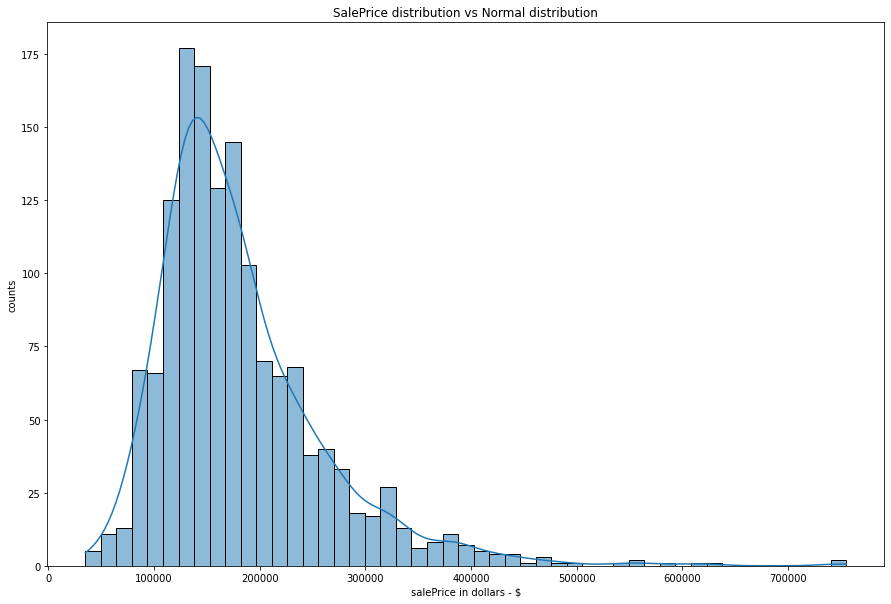

In [9]:
(mu, sigma) = norm.fit(df.SalePrice)
plt.figure(figsize=(15, 10))
sns.histplot(data=df.SalePrice, kde=True)
plt.title('SalePrice distribution vs Normal distribution')
plt.ylabel('counts')
plt.xlabel('salePrice in dollars - $')

<AxesSubplot:>

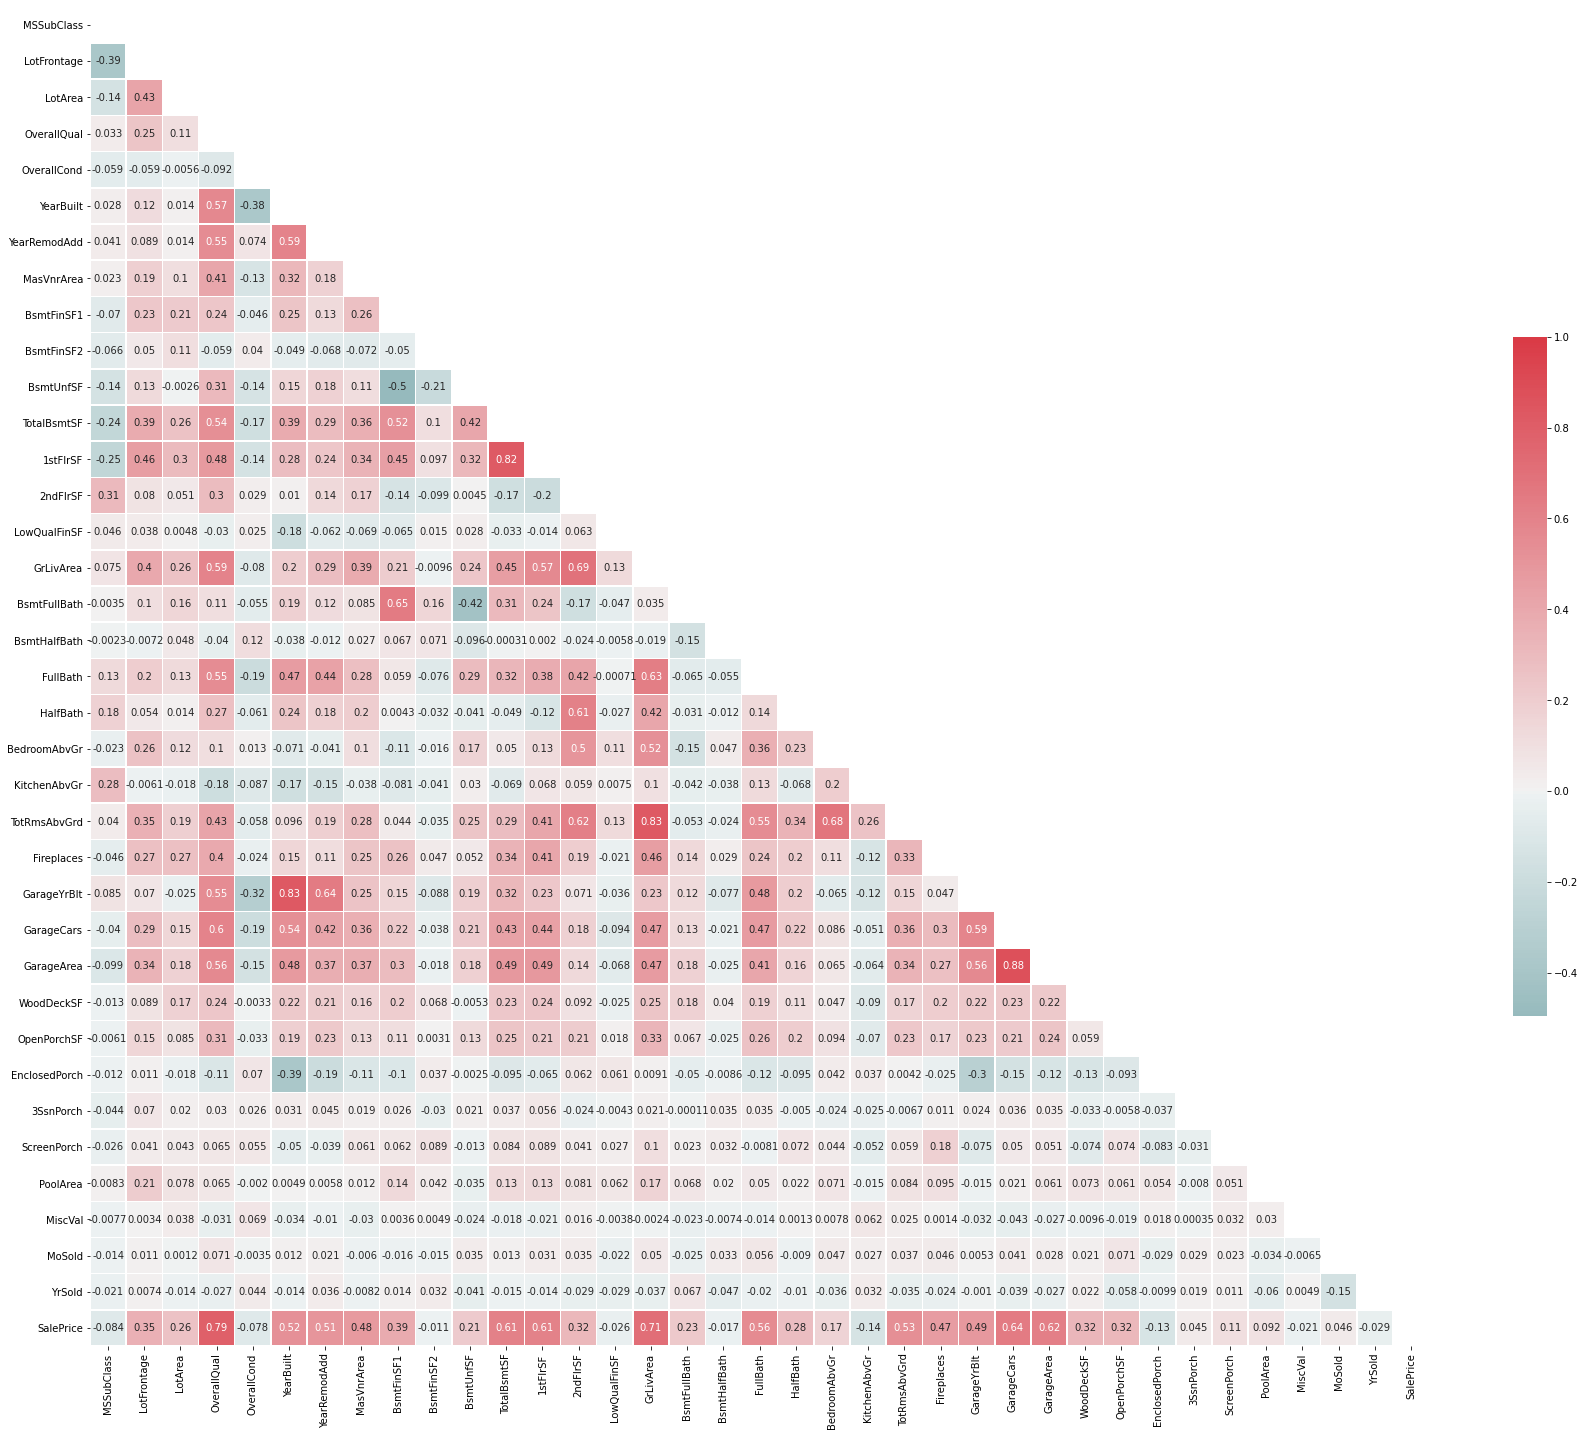

In [15]:
plt.figure(figsize=(30, 25))
corr_mat = df.corr()
mask = np.triu(corr_mat)
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr_mat, mask=mask, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap)

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

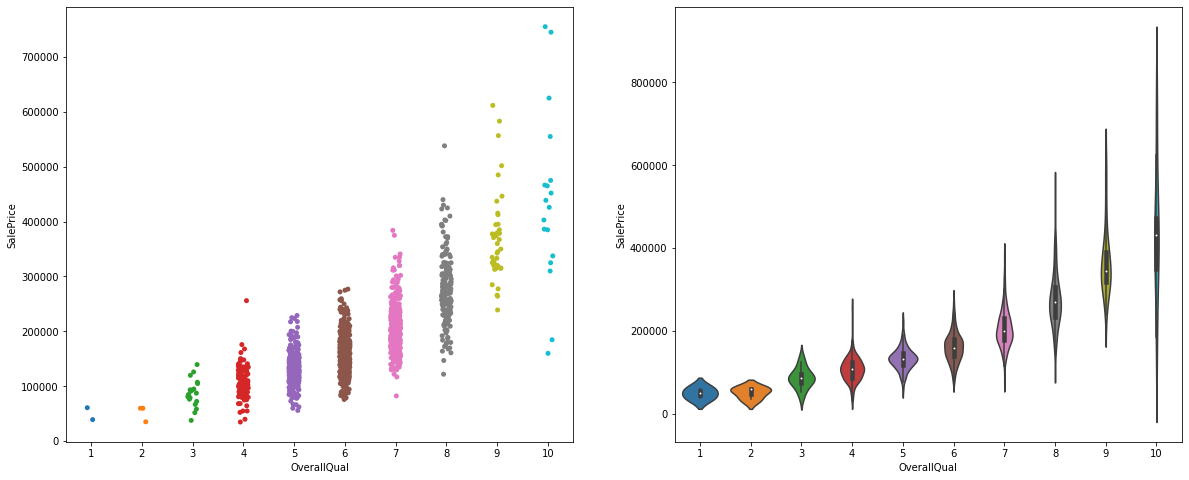

In [12]:
figure, ax = plt.subplots(1,2, figsize = (20,8))
sns.stripplot(data=df, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=df, x = 'OverallQual', y='SalePrice', ax = ax[1])
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

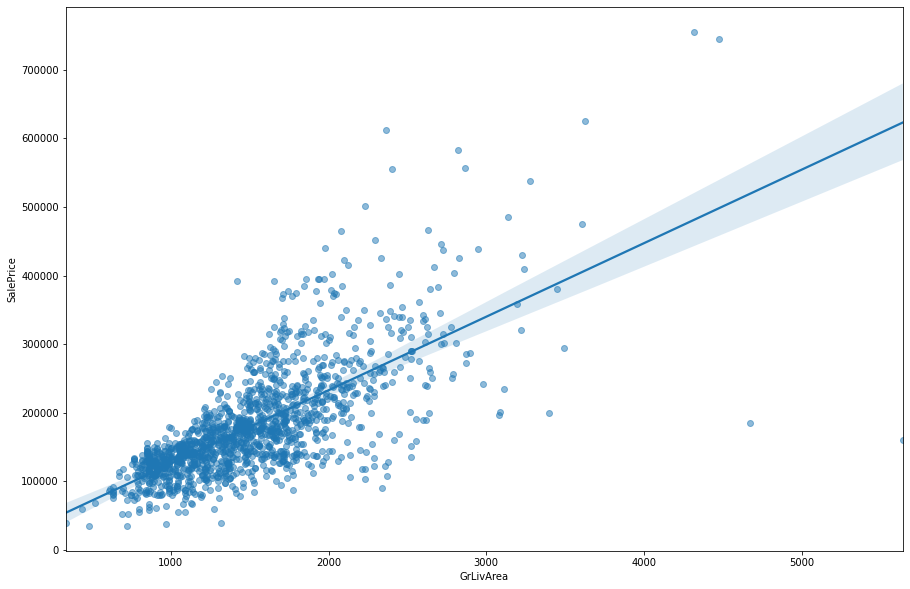

In [16]:
plt.figure(figsize=(15, 10))
sns.regplot(data=df, x='GrLivArea', y='SalePrice', scatter_kws={'alpha': .5})

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

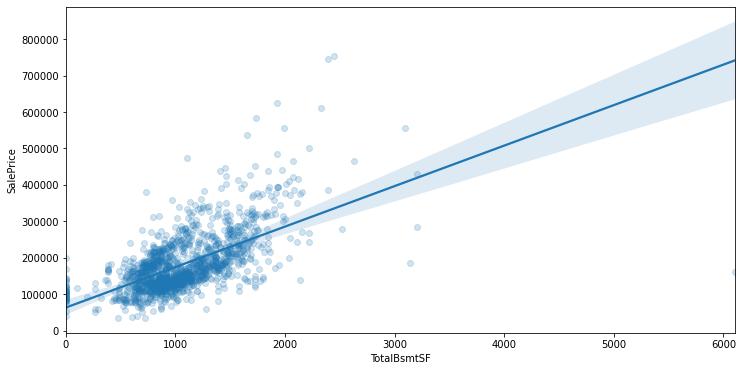

In [17]:
plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

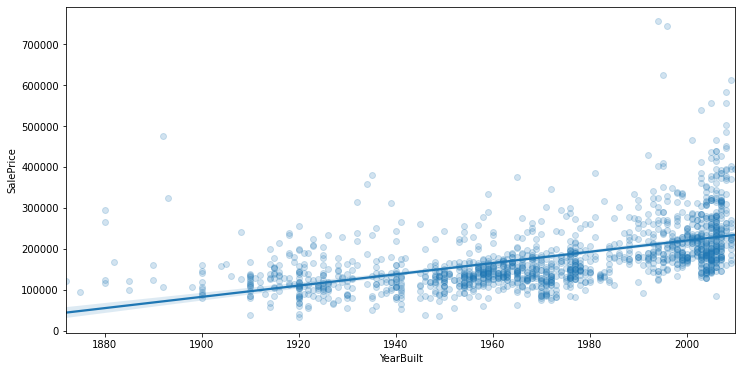

In [18]:
plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

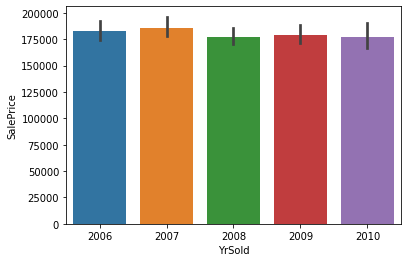

In [24]:
sns.barplot(x='YrSold', y="SalePrice", data = df)

In [28]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [55]:
test_data['SalePrice'] = 0
df = df.append(test_data)
df.reset_index(inplace=True, drop=True)

In [56]:
df.index

RangeIndex(start=0, stop=2919, step=1)

In [57]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,0


In [58]:
nan = pd.DataFrame(df.isna().sum(), columns=['NanCounts'])
nan['percentage'] = nan['NanCounts'] / df.shape[0] * 100
nan = nan[nan['NanCounts'] > 0].sort_values(by='percentage')
nan

,NanCounts,percentage
TotalBsmtSF,1,0.034258
GarageArea,1,0.034258
GarageCars,1,0.034258
KitchenQual,1,0.034258
Electrical,1,0.034258
BsmtUnfSF,1,0.034258
BsmtFinSF2,1,0.034258
BsmtFinSF1,1,0.034258
SaleType,1,0.034258
Exterior1st,1,0.034258


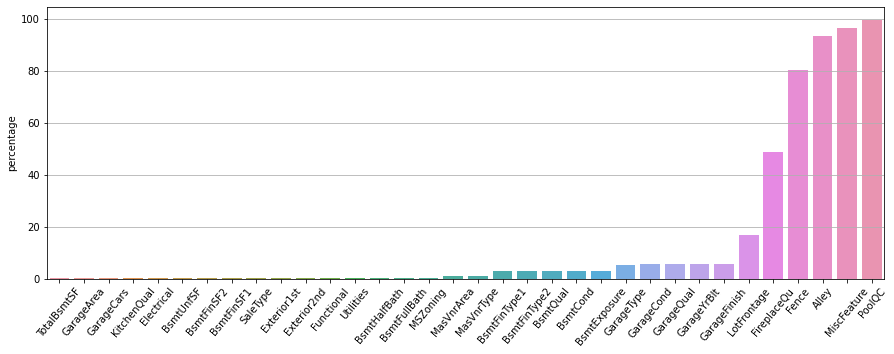

In [59]:
plt.figure(figsize=(15, 5))
sns.barplot(x=nan.index, y=nan['percentage'])
plt.xticks(rotation=50)
plt.grid(axis='y')
plt.show()

In [60]:
df['Alley'].fillna(value='No alley access', inplace=True)
df['PoolQC'].fillna(value='No Pool', inplace=True)
df['Fence'].fillna(value='No Fence', inplace=True)
df['MiscFeature'].fillna(value='None', inplace=True)
df['BsmtQual'].fillna(value='No Basement', inplace=True)
df['BsmtCond'].fillna(value='No Basement', inplace=True)
df['BsmtExposure'].fillna(value='No Basement', inplace=True)
df['BsmtFinType1'].fillna(value='No Basement', inplace=True)
df['BsmtFinType2'].fillna(value='No Basement', inplace=True)
df['FireplaceQu'].fillna(value='No Fireplace', inplace=True)
df['GarageType'].fillna(value='No Garage', inplace=True)
df['GarageFinish'].fillna(value='No Garage', inplace=True)
df['GarageQual'].fillna(value='No Garage', inplace=True)
df['GarageCond'].fillna(value='No Garage', inplace=True)

In [61]:
nan = pd.DataFrame(df.isna().sum(), columns=['NanCounts'])
nan['percentage'] = nan['NanCounts'] / 1460 * 100
nan = nan[nan['NanCounts'] > 0].sort_values(by='percentage')
nan

,NanCounts,percentage
BsmtUnfSF,1,0.068493
GarageCars,1,0.068493
KitchenQual,1,0.068493
Electrical,1,0.068493
TotalBsmtSF,1,0.068493
GarageArea,1,0.068493
BsmtFinSF2,1,0.068493
SaleType,1,0.068493
Exterior2nd,1,0.068493
Exterior1st,1,0.068493


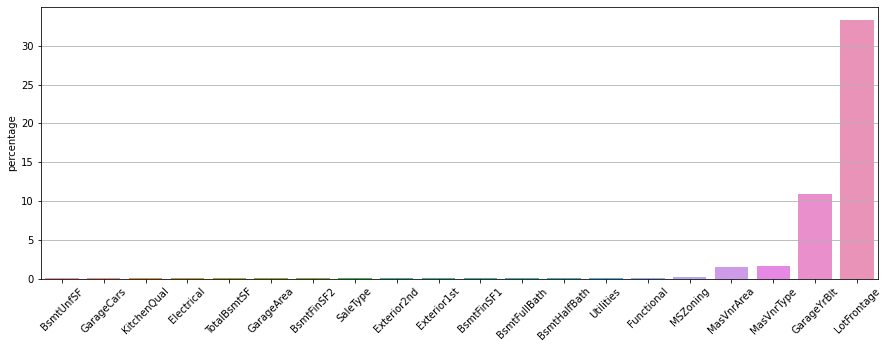

In [62]:
plt.figure(figsize=(15, 5))
sns.barplot(x=nan.index, y=nan['percentage'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [63]:
useless_cols = ['LotFrontage', 'GarageYrBlt']
df.drop(columns=useless_cols, axis=1, inplace=True)

In [64]:
nan = pd.DataFrame(df.isna().sum(), columns=['NanCounts'])
nan['percentage'] = nan['NanCounts'] / 1460 * 100
nan = nan[nan['NanCounts'] > 0].sort_values(by='percentage')
nan

,NanCounts,percentage
BsmtUnfSF,1,0.068493
GarageCars,1,0.068493
KitchenQual,1,0.068493
Electrical,1,0.068493
TotalBsmtSF,1,0.068493
GarageArea,1,0.068493
BsmtFinSF2,1,0.068493
SaleType,1,0.068493
Exterior2nd,1,0.068493
Exterior1st,1,0.068493


In [65]:
df.dropna(inplace=True)

In [66]:
df.shape

(2882, 78)

In [67]:
df.head(3)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500


In [92]:
df_numbers = df.select_dtypes(exclude='object')
df_categoricals = df.select_dtypes(include='object')

In [93]:
df_numbers.shape[1], df_categoricals.shape[1]

(35, 43)

In [94]:
df_categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2882,2882,2882,2882,2882,2882,2882,2882,2882,2882,...,2882,2882,2882,2882,2882,2882,2882,2882,2882,2882
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal
freq,2242,2871,2687,1838,2589,2881,2108,2742,443,2484,...,1698,1217,2573,2625,2611,2872,2313,2778,2505,2382


In [95]:
df_numbers.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,...,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000
mean,57.302221,10103.730396,6.089174,5.575642,1971.206107,1984.180777,102.511103,442.343511,49.795628,560.041985,...,94.190493,47.169327,22.999653,2.635670,16.239417,2.280708,51.218251,6.209924,2007.794587,90938.782790
std,42.649780,7812.027633,1.401403,1.105037,30.215365,20.854755,179.584636,455.340108,169.418562,438.993978,...,126.928071,67.147952,64.136507,25.347659,56.501028,35.891308,570.857095,2.706901,1.317966,106417.357383
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,220.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,50.000000,9429.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,57246.500000
75%,70.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,733.000000,0.000000,802.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [114]:
df_numbers = df_numbers.iloc[np.abs(stats.zscore(df_numbers) < 3).all(axis=1)]

In [119]:
df_numbers.index

Int64Index([   0,    2,    4,    6,   10,   11,   12,   13,   14,   15,
            ...
            2907, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2918],
           dtype='int64', length=2058)

In [118]:
df_categoricals.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918],
           dtype='int64', length=2882)

In [125]:
df_categoricals = df_categoricals.loc[df_numbers.index]

In [128]:
df_categoricals = pd.get_dummies(df_categoricals, drop_first=True)

In [129]:
df_categoricals.head(3)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [130]:
df_numbers.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,61,0,0,0,0,0,2,2008,208500
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,42,0,0,0,0,0,9,2008,223500
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,192,84,0,0,0,0,0,12,2008,250000


In [131]:
df = pd.concat([df_numbers, df_categoricals], axis=1)
df.reset_index(drop=True, inplace=True)

In [147]:
train_data_df = df[df['SalePrice'] > 0]
test_data_df = df[df['SalePrice'] == 0]

In [148]:
train_data_df.shape[0], test_data_df.shape[0]

(1038, 1020)

In [149]:
test_data_df.drop(columns=['SalePrice'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [150]:
train_data_df.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
2,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0


In [153]:
target_df = train_data_df['SalePrice']
train_data_df.drop(columns=['SalePrice'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


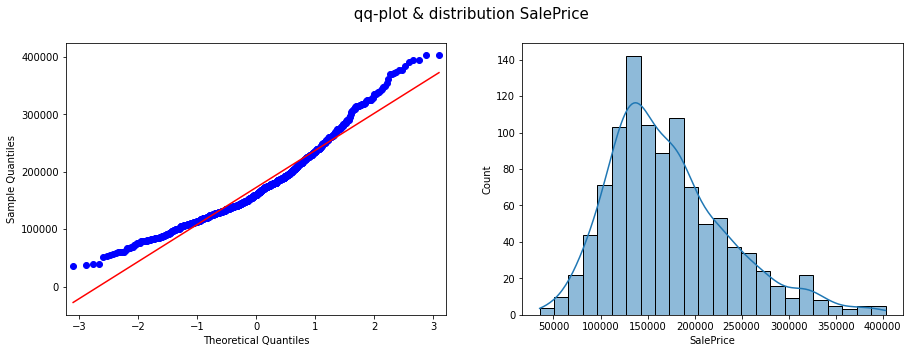

In [156]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_df, line='s', ax = ax[0])

sns.histplot(target_df, kde = True, ax = ax[1])
plt.show()

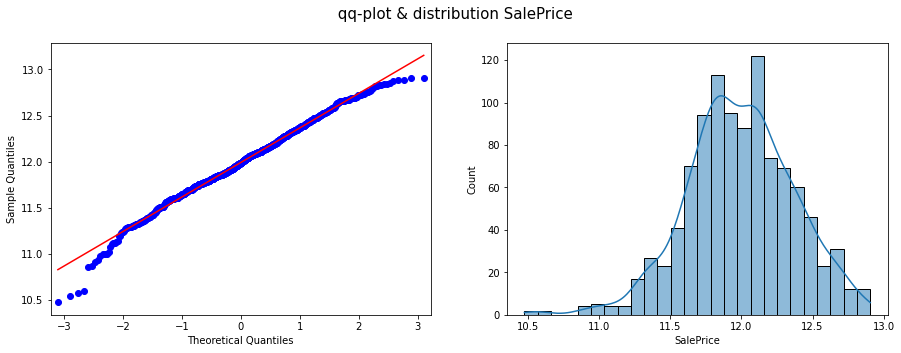

In [159]:
target_log = np.log1p(target_df)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, line='s', ax = ax[0])

sns.histplot(target_log, kde = True, ax = ax[1])
plt.show()

In [161]:
import xgboost as xgb
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [188]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train_data_df, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [163]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [164]:
cv_scores = []
cv_std = []

In [166]:
baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

In [167]:
lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

In [168]:
brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

In [169]:
l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

In [170]:
svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

In [171]:
dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

In [172]:
rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

In [173]:
xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

In [174]:
gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

In [175]:
catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

Learning rate set to 0.038559
0:	learn: 0.3669711	total: 53.7ms	remaining: 53.7s
1:	learn: 0.3580005	total: 57.1ms	remaining: 28.5s
2:	learn: 0.3502903	total: 59.8ms	remaining: 19.9s
3:	learn: 0.3410676	total: 62.6ms	remaining: 15.6s
4:	learn: 0.3327033	total: 65.6ms	remaining: 13.1s
5:	learn: 0.3249862	total: 68.9ms	remaining: 11.4s
6:	learn: 0.3170768	total: 73.3ms	remaining: 10.4s
7:	learn: 0.3100758	total: 77.2ms	remaining: 9.57s
8:	learn: 0.3024496	total: 81.5ms	remaining: 8.97s
9:	learn: 0.2958983	total: 85.1ms	remaining: 8.42s
10:	learn: 0.2894966	total: 88.7ms	remaining: 7.98s
11:	learn: 0.2825426	total: 92.3ms	remaining: 7.6s
12:	learn: 0.2762916	total: 97.3ms	remaining: 7.39s
13:	learn: 0.2701920	total: 101ms	remaining: 7.08s
14:	learn: 0.2645241	total: 104ms	remaining: 6.86s
15:	learn: 0.2588464	total: 108ms	remaining: 6.61s
16:	learn: 0.2536452	total: 111ms	remaining: 6.43s
17:	learn: 0.2486028	total: 115ms	remaining: 6.28s
18:	learn: 0.2433488	total: 119ms	remaining: 6.14s

167:	learn: 0.0923154	total: 560ms	remaining: 2.77s
168:	learn: 0.0921303	total: 563ms	remaining: 2.77s
169:	learn: 0.0920243	total: 566ms	remaining: 2.76s
170:	learn: 0.0919001	total: 569ms	remaining: 2.76s
171:	learn: 0.0915917	total: 572ms	remaining: 2.75s
172:	learn: 0.0914595	total: 575ms	remaining: 2.75s
173:	learn: 0.0912550	total: 578ms	remaining: 2.74s
174:	learn: 0.0911232	total: 580ms	remaining: 2.74s
175:	learn: 0.0909693	total: 583ms	remaining: 2.73s
176:	learn: 0.0907247	total: 586ms	remaining: 2.72s
177:	learn: 0.0906144	total: 589ms	remaining: 2.72s
178:	learn: 0.0903700	total: 592ms	remaining: 2.71s
179:	learn: 0.0902849	total: 594ms	remaining: 2.71s
180:	learn: 0.0900943	total: 597ms	remaining: 2.7s
181:	learn: 0.0899252	total: 600ms	remaining: 2.69s
182:	learn: 0.0897491	total: 602ms	remaining: 2.69s
183:	learn: 0.0894940	total: 605ms	remaining: 2.68s
184:	learn: 0.0893429	total: 609ms	remaining: 2.68s
185:	learn: 0.0891029	total: 612ms	remaining: 2.68s
186:	learn: 0

334:	learn: 0.0701536	total: 1.12s	remaining: 2.23s
335:	learn: 0.0700439	total: 1.13s	remaining: 2.23s
336:	learn: 0.0699407	total: 1.13s	remaining: 2.22s
337:	learn: 0.0699056	total: 1.13s	remaining: 2.22s
338:	learn: 0.0697600	total: 1.14s	remaining: 2.22s
339:	learn: 0.0695646	total: 1.14s	remaining: 2.21s
340:	learn: 0.0695343	total: 1.14s	remaining: 2.21s
341:	learn: 0.0694194	total: 1.15s	remaining: 2.21s
342:	learn: 0.0692095	total: 1.15s	remaining: 2.2s
343:	learn: 0.0691063	total: 1.15s	remaining: 2.2s
344:	learn: 0.0690770	total: 1.16s	remaining: 2.2s
345:	learn: 0.0690463	total: 1.16s	remaining: 2.2s
346:	learn: 0.0689491	total: 1.17s	remaining: 2.19s
347:	learn: 0.0689058	total: 1.17s	remaining: 2.19s
348:	learn: 0.0687743	total: 1.17s	remaining: 2.19s
349:	learn: 0.0687151	total: 1.18s	remaining: 2.18s
350:	learn: 0.0686153	total: 1.18s	remaining: 2.18s
351:	learn: 0.0684098	total: 1.18s	remaining: 2.18s
352:	learn: 0.0683289	total: 1.19s	remaining: 2.17s
353:	learn: 0.06

527:	learn: 0.0552180	total: 1.88s	remaining: 1.68s
528:	learn: 0.0551716	total: 1.88s	remaining: 1.68s
529:	learn: 0.0550370	total: 1.89s	remaining: 1.67s
530:	learn: 0.0549994	total: 1.89s	remaining: 1.67s
531:	learn: 0.0548979	total: 1.9s	remaining: 1.67s
532:	learn: 0.0548044	total: 1.9s	remaining: 1.67s
533:	learn: 0.0546865	total: 1.91s	remaining: 1.66s
534:	learn: 0.0546576	total: 1.91s	remaining: 1.66s
535:	learn: 0.0545610	total: 1.92s	remaining: 1.66s
536:	learn: 0.0544609	total: 1.92s	remaining: 1.66s
537:	learn: 0.0543988	total: 1.93s	remaining: 1.65s
538:	learn: 0.0543882	total: 1.93s	remaining: 1.65s
539:	learn: 0.0543387	total: 1.93s	remaining: 1.65s
540:	learn: 0.0542961	total: 1.94s	remaining: 1.64s
541:	learn: 0.0542542	total: 1.94s	remaining: 1.64s
542:	learn: 0.0541705	total: 1.95s	remaining: 1.64s
543:	learn: 0.0540873	total: 1.95s	remaining: 1.63s
544:	learn: 0.0540083	total: 1.96s	remaining: 1.63s
545:	learn: 0.0539964	total: 1.96s	remaining: 1.63s
546:	learn: 0.

687:	learn: 0.0451612	total: 2.44s	remaining: 1.1s
688:	learn: 0.0450855	total: 2.44s	remaining: 1.1s
689:	learn: 0.0450616	total: 2.44s	remaining: 1.1s
690:	learn: 0.0450011	total: 2.45s	remaining: 1.09s
691:	learn: 0.0449884	total: 2.45s	remaining: 1.09s
692:	learn: 0.0449160	total: 2.45s	remaining: 1.09s
693:	learn: 0.0448320	total: 2.46s	remaining: 1.08s
694:	learn: 0.0447446	total: 2.46s	remaining: 1.08s
695:	learn: 0.0447223	total: 2.46s	remaining: 1.07s
696:	learn: 0.0446988	total: 2.46s	remaining: 1.07s
697:	learn: 0.0446161	total: 2.47s	remaining: 1.07s
698:	learn: 0.0445750	total: 2.47s	remaining: 1.06s
699:	learn: 0.0445141	total: 2.47s	remaining: 1.06s
700:	learn: 0.0444587	total: 2.48s	remaining: 1.05s
701:	learn: 0.0443715	total: 2.48s	remaining: 1.05s
702:	learn: 0.0442852	total: 2.48s	remaining: 1.05s
703:	learn: 0.0442341	total: 2.48s	remaining: 1.04s
704:	learn: 0.0441901	total: 2.49s	remaining: 1.04s
705:	learn: 0.0441229	total: 2.49s	remaining: 1.04s
706:	learn: 0.0

846:	learn: 0.0374505	total: 3s	remaining: 542ms
847:	learn: 0.0374150	total: 3s	remaining: 538ms
848:	learn: 0.0373848	total: 3s	remaining: 535ms
849:	learn: 0.0373545	total: 3.01s	remaining: 531ms
850:	learn: 0.0373475	total: 3.01s	remaining: 528ms
851:	learn: 0.0373349	total: 3.02s	remaining: 524ms
852:	learn: 0.0372981	total: 3.02s	remaining: 520ms
853:	learn: 0.0372732	total: 3.02s	remaining: 517ms
854:	learn: 0.0372664	total: 3.03s	remaining: 513ms
855:	learn: 0.0372029	total: 3.03s	remaining: 510ms
856:	learn: 0.0371539	total: 3.03s	remaining: 506ms
857:	learn: 0.0371286	total: 3.04s	remaining: 503ms
858:	learn: 0.0370735	total: 3.04s	remaining: 499ms
859:	learn: 0.0370517	total: 3.04s	remaining: 496ms
860:	learn: 0.0369973	total: 3.05s	remaining: 492ms
861:	learn: 0.0369542	total: 3.05s	remaining: 488ms
862:	learn: 0.0369144	total: 3.05s	remaining: 485ms
863:	learn: 0.0368922	total: 3.06s	remaining: 481ms
864:	learn: 0.0368785	total: 3.06s	remaining: 478ms
865:	learn: 0.0368188

47:	learn: 0.1594448	total: 187ms	remaining: 3.71s
48:	learn: 0.1574506	total: 191ms	remaining: 3.7s
49:	learn: 0.1555794	total: 194ms	remaining: 3.68s
50:	learn: 0.1539253	total: 197ms	remaining: 3.67s
51:	learn: 0.1525723	total: 202ms	remaining: 3.67s
52:	learn: 0.1512117	total: 205ms	remaining: 3.67s
53:	learn: 0.1495954	total: 209ms	remaining: 3.66s
54:	learn: 0.1481477	total: 212ms	remaining: 3.64s
55:	learn: 0.1467502	total: 215ms	remaining: 3.63s
56:	learn: 0.1453567	total: 219ms	remaining: 3.62s
57:	learn: 0.1440126	total: 222ms	remaining: 3.61s
58:	learn: 0.1429422	total: 225ms	remaining: 3.59s
59:	learn: 0.1418074	total: 229ms	remaining: 3.58s
60:	learn: 0.1406252	total: 233ms	remaining: 3.58s
61:	learn: 0.1395118	total: 236ms	remaining: 3.57s
62:	learn: 0.1385324	total: 240ms	remaining: 3.56s
63:	learn: 0.1373900	total: 244ms	remaining: 3.56s
64:	learn: 0.1362111	total: 247ms	remaining: 3.56s
65:	learn: 0.1352581	total: 251ms	remaining: 3.55s
66:	learn: 0.1341859	total: 254m

233:	learn: 0.0828898	total: 749ms	remaining: 2.45s
234:	learn: 0.0826905	total: 753ms	remaining: 2.45s
235:	learn: 0.0825556	total: 756ms	remaining: 2.44s
236:	learn: 0.0823485	total: 758ms	remaining: 2.44s
237:	learn: 0.0822218	total: 761ms	remaining: 2.44s
238:	learn: 0.0820513	total: 764ms	remaining: 2.43s
239:	learn: 0.0818378	total: 767ms	remaining: 2.43s
240:	learn: 0.0816734	total: 769ms	remaining: 2.42s
241:	learn: 0.0814955	total: 772ms	remaining: 2.42s
242:	learn: 0.0813701	total: 775ms	remaining: 2.42s
243:	learn: 0.0812640	total: 778ms	remaining: 2.41s
244:	learn: 0.0810810	total: 781ms	remaining: 2.4s
245:	learn: 0.0809212	total: 784ms	remaining: 2.4s
246:	learn: 0.0807746	total: 787ms	remaining: 2.4s
247:	learn: 0.0805860	total: 790ms	remaining: 2.39s
248:	learn: 0.0805309	total: 793ms	remaining: 2.39s
249:	learn: 0.0804749	total: 795ms	remaining: 2.39s
250:	learn: 0.0804140	total: 799ms	remaining: 2.38s
251:	learn: 0.0803671	total: 803ms	remaining: 2.38s
252:	learn: 0.0

402:	learn: 0.0641213	total: 1.31s	remaining: 1.94s
403:	learn: 0.0640339	total: 1.31s	remaining: 1.93s
404:	learn: 0.0639141	total: 1.31s	remaining: 1.93s
405:	learn: 0.0637529	total: 1.32s	remaining: 1.93s
406:	learn: 0.0636185	total: 1.32s	remaining: 1.92s
407:	learn: 0.0634684	total: 1.32s	remaining: 1.92s
408:	learn: 0.0633188	total: 1.33s	remaining: 1.92s
409:	learn: 0.0631830	total: 1.33s	remaining: 1.91s
410:	learn: 0.0630678	total: 1.33s	remaining: 1.91s
411:	learn: 0.0629857	total: 1.34s	remaining: 1.91s
412:	learn: 0.0629101	total: 1.34s	remaining: 1.9s
413:	learn: 0.0628656	total: 1.34s	remaining: 1.9s
414:	learn: 0.0628067	total: 1.34s	remaining: 1.9s
415:	learn: 0.0627225	total: 1.35s	remaining: 1.89s
416:	learn: 0.0626373	total: 1.35s	remaining: 1.89s
417:	learn: 0.0624838	total: 1.35s	remaining: 1.89s
418:	learn: 0.0624474	total: 1.36s	remaining: 1.88s
419:	learn: 0.0623542	total: 1.36s	remaining: 1.88s
420:	learn: 0.0623297	total: 1.36s	remaining: 1.88s
421:	learn: 0.0

586:	learn: 0.0503150	total: 1.87s	remaining: 1.31s
587:	learn: 0.0502238	total: 1.87s	remaining: 1.31s
588:	learn: 0.0501512	total: 1.87s	remaining: 1.31s
589:	learn: 0.0500419	total: 1.88s	remaining: 1.3s
590:	learn: 0.0499963	total: 1.88s	remaining: 1.3s
591:	learn: 0.0499896	total: 1.88s	remaining: 1.3s
592:	learn: 0.0498937	total: 1.89s	remaining: 1.29s
593:	learn: 0.0498273	total: 1.89s	remaining: 1.29s
594:	learn: 0.0497473	total: 1.89s	remaining: 1.29s
595:	learn: 0.0496243	total: 1.9s	remaining: 1.29s
596:	learn: 0.0495580	total: 1.9s	remaining: 1.28s
597:	learn: 0.0495352	total: 1.9s	remaining: 1.28s
598:	learn: 0.0494538	total: 1.91s	remaining: 1.28s
599:	learn: 0.0494422	total: 1.91s	remaining: 1.27s
600:	learn: 0.0493721	total: 1.91s	remaining: 1.27s
601:	learn: 0.0492828	total: 1.92s	remaining: 1.27s
602:	learn: 0.0492359	total: 1.92s	remaining: 1.26s
603:	learn: 0.0491402	total: 1.92s	remaining: 1.26s
604:	learn: 0.0491065	total: 1.92s	remaining: 1.26s
605:	learn: 0.0490

760:	learn: 0.0404727	total: 2.42s	remaining: 761ms
761:	learn: 0.0404127	total: 2.43s	remaining: 758ms
762:	learn: 0.0403821	total: 2.43s	remaining: 755ms
763:	learn: 0.0403234	total: 2.43s	remaining: 752ms
764:	learn: 0.0402862	total: 2.44s	remaining: 748ms
765:	learn: 0.0402236	total: 2.44s	remaining: 745ms
766:	learn: 0.0402183	total: 2.44s	remaining: 742ms
767:	learn: 0.0401789	total: 2.44s	remaining: 739ms
768:	learn: 0.0401733	total: 2.45s	remaining: 735ms
769:	learn: 0.0401388	total: 2.45s	remaining: 732ms
770:	learn: 0.0400906	total: 2.45s	remaining: 728ms
771:	learn: 0.0400312	total: 2.46s	remaining: 725ms
772:	learn: 0.0399903	total: 2.46s	remaining: 722ms
773:	learn: 0.0399701	total: 2.46s	remaining: 718ms
774:	learn: 0.0399371	total: 2.46s	remaining: 715ms
775:	learn: 0.0398657	total: 2.46s	remaining: 712ms
776:	learn: 0.0398376	total: 2.47s	remaining: 708ms
777:	learn: 0.0397726	total: 2.47s	remaining: 705ms
778:	learn: 0.0397153	total: 2.47s	remaining: 702ms
779:	learn: 

942:	learn: 0.0331991	total: 2.99s	remaining: 181ms
943:	learn: 0.0331661	total: 2.99s	remaining: 177ms
944:	learn: 0.0331247	total: 2.99s	remaining: 174ms
945:	learn: 0.0330988	total: 3s	remaining: 171ms
946:	learn: 0.0330753	total: 3s	remaining: 168ms
947:	learn: 0.0330357	total: 3s	remaining: 165ms
948:	learn: 0.0330010	total: 3s	remaining: 162ms
949:	learn: 0.0329860	total: 3.01s	remaining: 158ms
950:	learn: 0.0329553	total: 3.01s	remaining: 155ms
951:	learn: 0.0329162	total: 3.01s	remaining: 152ms
952:	learn: 0.0328981	total: 3.02s	remaining: 149ms
953:	learn: 0.0328389	total: 3.02s	remaining: 146ms
954:	learn: 0.0327762	total: 3.02s	remaining: 142ms
955:	learn: 0.0327691	total: 3.03s	remaining: 139ms
956:	learn: 0.0327598	total: 3.03s	remaining: 136ms
957:	learn: 0.0327561	total: 3.03s	remaining: 133ms
958:	learn: 0.0327379	total: 3.04s	remaining: 130ms
959:	learn: 0.0327338	total: 3.04s	remaining: 127ms
960:	learn: 0.0326995	total: 3.04s	remaining: 123ms
961:	learn: 0.0326714	to

116:	learn: 0.1025132	total: 375ms	remaining: 2.83s
117:	learn: 0.1020642	total: 379ms	remaining: 2.83s
118:	learn: 0.1017708	total: 383ms	remaining: 2.83s
119:	learn: 0.1013701	total: 386ms	remaining: 2.83s
120:	learn: 0.1011325	total: 390ms	remaining: 2.83s
121:	learn: 0.1008141	total: 393ms	remaining: 2.83s
122:	learn: 0.1004547	total: 396ms	remaining: 2.82s
123:	learn: 0.1002571	total: 399ms	remaining: 2.82s
124:	learn: 0.0999992	total: 403ms	remaining: 2.82s
125:	learn: 0.0996843	total: 407ms	remaining: 2.83s
126:	learn: 0.0994441	total: 411ms	remaining: 2.83s
127:	learn: 0.0991821	total: 415ms	remaining: 2.83s
128:	learn: 0.0988033	total: 418ms	remaining: 2.82s
129:	learn: 0.0986099	total: 423ms	remaining: 2.83s
130:	learn: 0.0983914	total: 427ms	remaining: 2.83s
131:	learn: 0.0982262	total: 431ms	remaining: 2.83s
132:	learn: 0.0979893	total: 434ms	remaining: 2.83s
133:	learn: 0.0977979	total: 437ms	remaining: 2.83s
134:	learn: 0.0975813	total: 442ms	remaining: 2.83s
135:	learn: 

294:	learn: 0.0726069	total: 934ms	remaining: 2.23s
295:	learn: 0.0724733	total: 938ms	remaining: 2.23s
296:	learn: 0.0722933	total: 941ms	remaining: 2.23s
297:	learn: 0.0721426	total: 944ms	remaining: 2.22s
298:	learn: 0.0720789	total: 946ms	remaining: 2.22s
299:	learn: 0.0719024	total: 951ms	remaining: 2.22s
300:	learn: 0.0718606	total: 954ms	remaining: 2.21s
301:	learn: 0.0717723	total: 957ms	remaining: 2.21s
302:	learn: 0.0716002	total: 960ms	remaining: 2.21s
303:	learn: 0.0714234	total: 963ms	remaining: 2.21s
304:	learn: 0.0713001	total: 967ms	remaining: 2.2s
305:	learn: 0.0711218	total: 970ms	remaining: 2.2s
306:	learn: 0.0710234	total: 972ms	remaining: 2.19s
307:	learn: 0.0709584	total: 975ms	remaining: 2.19s
308:	learn: 0.0708356	total: 978ms	remaining: 2.19s
309:	learn: 0.0707967	total: 981ms	remaining: 2.18s
310:	learn: 0.0707622	total: 984ms	remaining: 2.18s
311:	learn: 0.0707149	total: 986ms	remaining: 2.17s
312:	learn: 0.0705305	total: 989ms	remaining: 2.17s
313:	learn: 0.

457:	learn: 0.0583412	total: 1.5s	remaining: 1.78s
458:	learn: 0.0583285	total: 1.5s	remaining: 1.77s
459:	learn: 0.0582436	total: 1.51s	remaining: 1.77s
460:	learn: 0.0581342	total: 1.51s	remaining: 1.77s
461:	learn: 0.0580706	total: 1.51s	remaining: 1.76s
462:	learn: 0.0579761	total: 1.52s	remaining: 1.76s
463:	learn: 0.0579654	total: 1.52s	remaining: 1.76s
464:	learn: 0.0578481	total: 1.53s	remaining: 1.76s
465:	learn: 0.0577351	total: 1.53s	remaining: 1.75s
466:	learn: 0.0576940	total: 1.53s	remaining: 1.75s
467:	learn: 0.0576008	total: 1.54s	remaining: 1.75s
468:	learn: 0.0575902	total: 1.54s	remaining: 1.75s
469:	learn: 0.0575808	total: 1.54s	remaining: 1.74s
470:	learn: 0.0574478	total: 1.55s	remaining: 1.74s
471:	learn: 0.0573297	total: 1.55s	remaining: 1.74s
472:	learn: 0.0572667	total: 1.55s	remaining: 1.73s
473:	learn: 0.0571423	total: 1.56s	remaining: 1.73s
474:	learn: 0.0570254	total: 1.56s	remaining: 1.73s
475:	learn: 0.0569562	total: 1.57s	remaining: 1.72s
476:	learn: 0.

631:	learn: 0.0468881	total: 2.06s	remaining: 1.2s
632:	learn: 0.0468193	total: 2.06s	remaining: 1.2s
633:	learn: 0.0467834	total: 2.07s	remaining: 1.19s
634:	learn: 0.0467624	total: 2.07s	remaining: 1.19s
635:	learn: 0.0466891	total: 2.08s	remaining: 1.19s
636:	learn: 0.0465932	total: 2.08s	remaining: 1.19s
637:	learn: 0.0465852	total: 2.08s	remaining: 1.18s
638:	learn: 0.0465169	total: 2.09s	remaining: 1.18s
639:	learn: 0.0464274	total: 2.09s	remaining: 1.18s
640:	learn: 0.0463918	total: 2.1s	remaining: 1.17s
641:	learn: 0.0463525	total: 2.1s	remaining: 1.17s
642:	learn: 0.0463464	total: 2.1s	remaining: 1.17s
643:	learn: 0.0462530	total: 2.11s	remaining: 1.16s
644:	learn: 0.0461820	total: 2.11s	remaining: 1.16s
645:	learn: 0.0461040	total: 2.11s	remaining: 1.16s
646:	learn: 0.0460212	total: 2.12s	remaining: 1.15s
647:	learn: 0.0459873	total: 2.12s	remaining: 1.15s
648:	learn: 0.0459311	total: 2.13s	remaining: 1.15s
649:	learn: 0.0458508	total: 2.13s	remaining: 1.15s
650:	learn: 0.045

807:	learn: 0.0388292	total: 2.62s	remaining: 623ms
808:	learn: 0.0387680	total: 2.63s	remaining: 620ms
809:	learn: 0.0387056	total: 2.63s	remaining: 617ms
810:	learn: 0.0386647	total: 2.63s	remaining: 614ms
811:	learn: 0.0385719	total: 2.64s	remaining: 611ms
812:	learn: 0.0385295	total: 2.64s	remaining: 608ms
813:	learn: 0.0384788	total: 2.65s	remaining: 605ms
814:	learn: 0.0384105	total: 2.65s	remaining: 601ms
815:	learn: 0.0383733	total: 2.65s	remaining: 598ms
816:	learn: 0.0382877	total: 2.66s	remaining: 595ms
817:	learn: 0.0382635	total: 2.66s	remaining: 592ms
818:	learn: 0.0382195	total: 2.67s	remaining: 589ms
819:	learn: 0.0381805	total: 2.67s	remaining: 587ms
820:	learn: 0.0381584	total: 2.68s	remaining: 584ms
821:	learn: 0.0381411	total: 2.68s	remaining: 580ms
822:	learn: 0.0381190	total: 2.68s	remaining: 577ms
823:	learn: 0.0380811	total: 2.69s	remaining: 574ms
824:	learn: 0.0380492	total: 2.69s	remaining: 571ms
825:	learn: 0.0380110	total: 2.69s	remaining: 568ms
826:	learn: 

990:	learn: 0.0317725	total: 3.19s	remaining: 28.9ms
991:	learn: 0.0317382	total: 3.19s	remaining: 25.7ms
992:	learn: 0.0316876	total: 3.19s	remaining: 22.5ms
993:	learn: 0.0316498	total: 3.19s	remaining: 19.3ms
994:	learn: 0.0316398	total: 3.2s	remaining: 16.1ms
995:	learn: 0.0315932	total: 3.2s	remaining: 12.9ms
996:	learn: 0.0315519	total: 3.21s	remaining: 9.65ms
997:	learn: 0.0315250	total: 3.21s	remaining: 6.43ms
998:	learn: 0.0314879	total: 3.21s	remaining: 3.22ms
999:	learn: 0.0314205	total: 3.22s	remaining: 0us
Learning rate set to 0.038559
0:	learn: 0.3672514	total: 3.07ms	remaining: 3.07s
1:	learn: 0.3580966	total: 6.2ms	remaining: 3.09s
2:	learn: 0.3499571	total: 10.2ms	remaining: 3.38s
3:	learn: 0.3413869	total: 13.7ms	remaining: 3.42s
4:	learn: 0.3330886	total: 17.1ms	remaining: 3.41s
5:	learn: 0.3254186	total: 20.9ms	remaining: 3.46s
6:	learn: 0.3179076	total: 24.4ms	remaining: 3.46s
7:	learn: 0.3101537	total: 28.2ms	remaining: 3.5s
8:	learn: 0.3032022	total: 32ms	remaini

150:	learn: 0.0969089	total: 469ms	remaining: 2.64s
151:	learn: 0.0967417	total: 473ms	remaining: 2.64s
152:	learn: 0.0964533	total: 476ms	remaining: 2.63s
153:	learn: 0.0962747	total: 480ms	remaining: 2.64s
154:	learn: 0.0960398	total: 483ms	remaining: 2.63s
155:	learn: 0.0956845	total: 486ms	remaining: 2.63s
156:	learn: 0.0955107	total: 490ms	remaining: 2.63s
157:	learn: 0.0953847	total: 495ms	remaining: 2.64s
158:	learn: 0.0952511	total: 498ms	remaining: 2.63s
159:	learn: 0.0950909	total: 501ms	remaining: 2.63s
160:	learn: 0.0949518	total: 504ms	remaining: 2.63s
161:	learn: 0.0947299	total: 509ms	remaining: 2.63s
162:	learn: 0.0945984	total: 512ms	remaining: 2.63s
163:	learn: 0.0944391	total: 515ms	remaining: 2.63s
164:	learn: 0.0943122	total: 518ms	remaining: 2.62s
165:	learn: 0.0941551	total: 521ms	remaining: 2.62s
166:	learn: 0.0939755	total: 525ms	remaining: 2.62s
167:	learn: 0.0937234	total: 529ms	remaining: 2.62s
168:	learn: 0.0935462	total: 532ms	remaining: 2.62s
169:	learn: 

351:	learn: 0.0700105	total: 1.23s	remaining: 2.27s
352:	learn: 0.0699810	total: 1.24s	remaining: 2.27s
353:	learn: 0.0698677	total: 1.24s	remaining: 2.26s
354:	learn: 0.0698389	total: 1.25s	remaining: 2.26s
355:	learn: 0.0697635	total: 1.25s	remaining: 2.26s
356:	learn: 0.0697421	total: 1.25s	remaining: 2.26s
357:	learn: 0.0697108	total: 1.25s	remaining: 2.25s
358:	learn: 0.0696462	total: 1.26s	remaining: 2.25s
359:	learn: 0.0695151	total: 1.26s	remaining: 2.25s
360:	learn: 0.0693752	total: 1.27s	remaining: 2.24s
361:	learn: 0.0693221	total: 1.27s	remaining: 2.24s
362:	learn: 0.0692818	total: 1.27s	remaining: 2.23s
363:	learn: 0.0691982	total: 1.28s	remaining: 2.23s
364:	learn: 0.0690534	total: 1.28s	remaining: 2.23s
365:	learn: 0.0689685	total: 1.28s	remaining: 2.23s
366:	learn: 0.0688395	total: 1.29s	remaining: 2.22s
367:	learn: 0.0688161	total: 1.29s	remaining: 2.22s
368:	learn: 0.0687123	total: 1.29s	remaining: 2.21s
369:	learn: 0.0686037	total: 1.3s	remaining: 2.21s
370:	learn: 0

568:	learn: 0.0531380	total: 1.98s	remaining: 1.5s
569:	learn: 0.0530693	total: 1.98s	remaining: 1.5s
570:	learn: 0.0530494	total: 1.99s	remaining: 1.49s
571:	learn: 0.0529834	total: 1.99s	remaining: 1.49s
572:	learn: 0.0529259	total: 2s	remaining: 1.49s
573:	learn: 0.0528211	total: 2s	remaining: 1.48s
574:	learn: 0.0527981	total: 2s	remaining: 1.48s
575:	learn: 0.0526714	total: 2.01s	remaining: 1.48s
576:	learn: 0.0526168	total: 2.01s	remaining: 1.47s
577:	learn: 0.0525604	total: 2.01s	remaining: 1.47s
578:	learn: 0.0524969	total: 2.02s	remaining: 1.47s
579:	learn: 0.0524702	total: 2.02s	remaining: 1.46s
580:	learn: 0.0524640	total: 2.02s	remaining: 1.46s
581:	learn: 0.0523837	total: 2.03s	remaining: 1.46s
582:	learn: 0.0523085	total: 2.03s	remaining: 1.45s
583:	learn: 0.0522687	total: 2.04s	remaining: 1.45s
584:	learn: 0.0522150	total: 2.04s	remaining: 1.45s
585:	learn: 0.0521892	total: 2.04s	remaining: 1.44s
586:	learn: 0.0521075	total: 2.04s	remaining: 1.44s
587:	learn: 0.0520979	t

779:	learn: 0.0412634	total: 2.72s	remaining: 769ms
780:	learn: 0.0412039	total: 2.73s	remaining: 765ms
781:	learn: 0.0411204	total: 2.73s	remaining: 761ms
782:	learn: 0.0410643	total: 2.73s	remaining: 758ms
783:	learn: 0.0410385	total: 2.74s	remaining: 755ms
784:	learn: 0.0409859	total: 2.74s	remaining: 751ms
785:	learn: 0.0409121	total: 2.75s	remaining: 748ms
786:	learn: 0.0408421	total: 2.75s	remaining: 744ms
787:	learn: 0.0408173	total: 2.75s	remaining: 741ms
788:	learn: 0.0407954	total: 2.76s	remaining: 738ms
789:	learn: 0.0407511	total: 2.76s	remaining: 734ms
790:	learn: 0.0406727	total: 2.77s	remaining: 731ms
791:	learn: 0.0406622	total: 2.77s	remaining: 727ms
792:	learn: 0.0405860	total: 2.77s	remaining: 724ms
793:	learn: 0.0405223	total: 2.78s	remaining: 721ms
794:	learn: 0.0404785	total: 2.78s	remaining: 717ms
795:	learn: 0.0403910	total: 2.78s	remaining: 714ms
796:	learn: 0.0403403	total: 2.79s	remaining: 711ms
797:	learn: 0.0402567	total: 2.79s	remaining: 707ms
798:	learn: 

981:	learn: 0.0328951	total: 3.48s	remaining: 63.7ms
982:	learn: 0.0328658	total: 3.48s	remaining: 60.2ms
983:	learn: 0.0328351	total: 3.48s	remaining: 56.6ms
984:	learn: 0.0327920	total: 3.49s	remaining: 53.1ms
985:	learn: 0.0327607	total: 3.49s	remaining: 49.6ms
986:	learn: 0.0327567	total: 3.49s	remaining: 46ms
987:	learn: 0.0327406	total: 3.5s	remaining: 42.5ms
988:	learn: 0.0327321	total: 3.5s	remaining: 39ms
989:	learn: 0.0327184	total: 3.51s	remaining: 35.4ms
990:	learn: 0.0326851	total: 3.51s	remaining: 31.9ms
991:	learn: 0.0326615	total: 3.51s	remaining: 28.3ms
992:	learn: 0.0326106	total: 3.52s	remaining: 24.8ms
993:	learn: 0.0325940	total: 3.52s	remaining: 21.3ms
994:	learn: 0.0325336	total: 3.52s	remaining: 17.7ms
995:	learn: 0.0324973	total: 3.53s	remaining: 14.2ms
996:	learn: 0.0324621	total: 3.53s	remaining: 10.6ms
997:	learn: 0.0324439	total: 3.53s	remaining: 7.08ms
998:	learn: 0.0324060	total: 3.54s	remaining: 3.54ms
999:	learn: 0.0323715	total: 3.54s	remaining: 0us
Le

170:	learn: 0.0923236	total: 622ms	remaining: 3.02s
171:	learn: 0.0921848	total: 627ms	remaining: 3.02s
172:	learn: 0.0919458	total: 630ms	remaining: 3.01s
173:	learn: 0.0917962	total: 634ms	remaining: 3.01s
174:	learn: 0.0916690	total: 637ms	remaining: 3s
175:	learn: 0.0913939	total: 640ms	remaining: 2.99s
176:	learn: 0.0912306	total: 644ms	remaining: 3s
177:	learn: 0.0910838	total: 649ms	remaining: 3s
178:	learn: 0.0909362	total: 652ms	remaining: 2.99s
179:	learn: 0.0908524	total: 655ms	remaining: 2.98s
180:	learn: 0.0905522	total: 658ms	remaining: 2.98s
181:	learn: 0.0904350	total: 662ms	remaining: 2.98s
182:	learn: 0.0902566	total: 665ms	remaining: 2.97s
183:	learn: 0.0900536	total: 669ms	remaining: 2.97s
184:	learn: 0.0899230	total: 672ms	remaining: 2.96s
185:	learn: 0.0897423	total: 675ms	remaining: 2.95s
186:	learn: 0.0895877	total: 679ms	remaining: 2.95s
187:	learn: 0.0893995	total: 683ms	remaining: 2.95s
188:	learn: 0.0891817	total: 687ms	remaining: 2.95s
189:	learn: 0.0890522

330:	learn: 0.0704156	total: 1.19s	remaining: 2.4s
331:	learn: 0.0702438	total: 1.19s	remaining: 2.4s
332:	learn: 0.0701677	total: 1.2s	remaining: 2.39s
333:	learn: 0.0700648	total: 1.2s	remaining: 2.39s
334:	learn: 0.0700063	total: 1.2s	remaining: 2.39s
335:	learn: 0.0699068	total: 1.21s	remaining: 2.38s
336:	learn: 0.0698498	total: 1.21s	remaining: 2.38s
337:	learn: 0.0697089	total: 1.21s	remaining: 2.38s
338:	learn: 0.0695478	total: 1.22s	remaining: 2.37s
339:	learn: 0.0693443	total: 1.22s	remaining: 2.37s
340:	learn: 0.0692889	total: 1.22s	remaining: 2.37s
341:	learn: 0.0692064	total: 1.23s	remaining: 2.36s
342:	learn: 0.0690759	total: 1.23s	remaining: 2.36s
343:	learn: 0.0689460	total: 1.24s	remaining: 2.35s
344:	learn: 0.0688664	total: 1.24s	remaining: 2.35s
345:	learn: 0.0686918	total: 1.24s	remaining: 2.35s
346:	learn: 0.0685686	total: 1.25s	remaining: 2.34s
347:	learn: 0.0685363	total: 1.25s	remaining: 2.34s
348:	learn: 0.0684773	total: 1.25s	remaining: 2.34s
349:	learn: 0.068

540:	learn: 0.0541800	total: 1.94s	remaining: 1.65s
541:	learn: 0.0541275	total: 1.94s	remaining: 1.64s
542:	learn: 0.0540639	total: 1.95s	remaining: 1.64s
543:	learn: 0.0539629	total: 1.95s	remaining: 1.64s
544:	learn: 0.0539505	total: 1.96s	remaining: 1.63s
545:	learn: 0.0539095	total: 1.96s	remaining: 1.63s
546:	learn: 0.0538492	total: 1.96s	remaining: 1.63s
547:	learn: 0.0538397	total: 1.97s	remaining: 1.62s
548:	learn: 0.0537534	total: 1.97s	remaining: 1.62s
549:	learn: 0.0536533	total: 1.97s	remaining: 1.61s
550:	learn: 0.0535883	total: 1.98s	remaining: 1.61s
551:	learn: 0.0535173	total: 1.98s	remaining: 1.61s
552:	learn: 0.0535010	total: 1.99s	remaining: 1.6s
553:	learn: 0.0534445	total: 1.99s	remaining: 1.6s
554:	learn: 0.0533619	total: 1.99s	remaining: 1.6s
555:	learn: 0.0532767	total: 2s	remaining: 1.59s
556:	learn: 0.0532682	total: 2s	remaining: 1.59s
557:	learn: 0.0532374	total: 2s	remaining: 1.59s
558:	learn: 0.0532240	total: 2.01s	remaining: 1.58s
559:	learn: 0.0531893	to

749:	learn: 0.0422334	total: 2.69s	remaining: 898ms
750:	learn: 0.0421907	total: 2.7s	remaining: 894ms
751:	learn: 0.0421296	total: 2.7s	remaining: 891ms
752:	learn: 0.0420835	total: 2.71s	remaining: 887ms
753:	learn: 0.0420794	total: 2.71s	remaining: 884ms
754:	learn: 0.0420753	total: 2.71s	remaining: 880ms
755:	learn: 0.0420711	total: 2.71s	remaining: 876ms
756:	learn: 0.0420128	total: 2.72s	remaining: 873ms
757:	learn: 0.0419314	total: 2.72s	remaining: 869ms
758:	learn: 0.0419034	total: 2.73s	remaining: 866ms
759:	learn: 0.0418717	total: 2.73s	remaining: 862ms
760:	learn: 0.0418568	total: 2.73s	remaining: 858ms
761:	learn: 0.0418056	total: 2.74s	remaining: 855ms
762:	learn: 0.0417430	total: 2.74s	remaining: 851ms
763:	learn: 0.0417382	total: 2.74s	remaining: 848ms
764:	learn: 0.0417322	total: 2.75s	remaining: 844ms
765:	learn: 0.0417063	total: 2.75s	remaining: 840ms
766:	learn: 0.0416761	total: 2.75s	remaining: 837ms
767:	learn: 0.0416344	total: 2.76s	remaining: 833ms
768:	learn: 0.

909:	learn: 0.0356368	total: 3.25s	remaining: 322ms
910:	learn: 0.0355836	total: 3.26s	remaining: 318ms
911:	learn: 0.0355335	total: 3.26s	remaining: 315ms
912:	learn: 0.0355156	total: 3.27s	remaining: 311ms
913:	learn: 0.0354952	total: 3.27s	remaining: 308ms
914:	learn: 0.0354296	total: 3.27s	remaining: 304ms
915:	learn: 0.0354114	total: 3.28s	remaining: 300ms
916:	learn: 0.0353782	total: 3.28s	remaining: 297ms
917:	learn: 0.0353304	total: 3.28s	remaining: 293ms
918:	learn: 0.0352855	total: 3.29s	remaining: 290ms
919:	learn: 0.0352576	total: 3.29s	remaining: 286ms
920:	learn: 0.0351840	total: 3.29s	remaining: 283ms
921:	learn: 0.0351139	total: 3.3s	remaining: 279ms
922:	learn: 0.0350657	total: 3.3s	remaining: 276ms
923:	learn: 0.0350393	total: 3.31s	remaining: 272ms
924:	learn: 0.0350156	total: 3.31s	remaining: 268ms
925:	learn: 0.0349756	total: 3.31s	remaining: 265ms
926:	learn: 0.0349437	total: 3.32s	remaining: 261ms
927:	learn: 0.0349062	total: 3.32s	remaining: 258ms
928:	learn: 0.

119:	learn: 0.1017760	total: 390ms	remaining: 2.86s
120:	learn: 0.1014669	total: 394ms	remaining: 2.86s
121:	learn: 0.1012687	total: 397ms	remaining: 2.86s
122:	learn: 0.1009405	total: 400ms	remaining: 2.85s
123:	learn: 0.1006485	total: 403ms	remaining: 2.85s
124:	learn: 0.1002585	total: 406ms	remaining: 2.84s
125:	learn: 0.0999262	total: 411ms	remaining: 2.85s
126:	learn: 0.0996496	total: 413ms	remaining: 2.84s
127:	learn: 0.0992446	total: 417ms	remaining: 2.84s
128:	learn: 0.0989857	total: 420ms	remaining: 2.83s
129:	learn: 0.0987691	total: 423ms	remaining: 2.83s
130:	learn: 0.0985270	total: 426ms	remaining: 2.82s
131:	learn: 0.0982961	total: 429ms	remaining: 2.82s
132:	learn: 0.0980731	total: 432ms	remaining: 2.81s
133:	learn: 0.0977441	total: 435ms	remaining: 2.81s
134:	learn: 0.0974963	total: 437ms	remaining: 2.8s
135:	learn: 0.0972727	total: 440ms	remaining: 2.8s
136:	learn: 0.0969619	total: 443ms	remaining: 2.79s
137:	learn: 0.0967236	total: 446ms	remaining: 2.79s
138:	learn: 0.

304:	learn: 0.0727800	total: 955ms	remaining: 2.18s
305:	learn: 0.0726834	total: 960ms	remaining: 2.18s
306:	learn: 0.0725733	total: 963ms	remaining: 2.17s
307:	learn: 0.0724607	total: 967ms	remaining: 2.17s
308:	learn: 0.0723165	total: 971ms	remaining: 2.17s
309:	learn: 0.0722841	total: 975ms	remaining: 2.17s
310:	learn: 0.0722364	total: 979ms	remaining: 2.17s
311:	learn: 0.0721887	total: 982ms	remaining: 2.16s
312:	learn: 0.0721660	total: 985ms	remaining: 2.16s
313:	learn: 0.0720346	total: 991ms	remaining: 2.16s
314:	learn: 0.0718964	total: 994ms	remaining: 2.16s
315:	learn: 0.0718516	total: 998ms	remaining: 2.16s
316:	learn: 0.0717492	total: 1s	remaining: 2.16s
317:	learn: 0.0716566	total: 1.01s	remaining: 2.16s
318:	learn: 0.0716247	total: 1.01s	remaining: 2.15s
319:	learn: 0.0715094	total: 1.01s	remaining: 2.15s
320:	learn: 0.0714657	total: 1.02s	remaining: 2.15s
321:	learn: 0.0713776	total: 1.02s	remaining: 2.15s
322:	learn: 0.0712371	total: 1.02s	remaining: 2.15s
323:	learn: 0.0

511:	learn: 0.0553740	total: 1.71s	remaining: 1.63s
512:	learn: 0.0553304	total: 1.72s	remaining: 1.63s
513:	learn: 0.0552188	total: 1.72s	remaining: 1.63s
514:	learn: 0.0551646	total: 1.73s	remaining: 1.63s
515:	learn: 0.0551086	total: 1.73s	remaining: 1.62s
516:	learn: 0.0550554	total: 1.73s	remaining: 1.62s
517:	learn: 0.0550224	total: 1.74s	remaining: 1.61s
518:	learn: 0.0548740	total: 1.74s	remaining: 1.61s
519:	learn: 0.0547288	total: 1.74s	remaining: 1.61s
520:	learn: 0.0546089	total: 1.75s	remaining: 1.6s
521:	learn: 0.0545306	total: 1.75s	remaining: 1.6s
522:	learn: 0.0544209	total: 1.75s	remaining: 1.6s
523:	learn: 0.0543514	total: 1.76s	remaining: 1.6s
524:	learn: 0.0543146	total: 1.76s	remaining: 1.59s
525:	learn: 0.0542039	total: 1.76s	remaining: 1.59s
526:	learn: 0.0541259	total: 1.77s	remaining: 1.59s
527:	learn: 0.0540796	total: 1.77s	remaining: 1.58s
528:	learn: 0.0539734	total: 1.77s	remaining: 1.58s
529:	learn: 0.0539344	total: 1.78s	remaining: 1.58s
530:	learn: 0.05

670:	learn: 0.0449486	total: 2.28s	remaining: 1.12s
671:	learn: 0.0449029	total: 2.28s	remaining: 1.11s
672:	learn: 0.0448270	total: 2.29s	remaining: 1.11s
673:	learn: 0.0448206	total: 2.29s	remaining: 1.11s
674:	learn: 0.0447358	total: 2.29s	remaining: 1.1s
675:	learn: 0.0446501	total: 2.3s	remaining: 1.1s
676:	learn: 0.0445817	total: 2.3s	remaining: 1.1s
677:	learn: 0.0445081	total: 2.31s	remaining: 1.09s
678:	learn: 0.0444655	total: 2.31s	remaining: 1.09s
679:	learn: 0.0444032	total: 2.31s	remaining: 1.09s
680:	learn: 0.0443594	total: 2.31s	remaining: 1.08s
681:	learn: 0.0442648	total: 2.32s	remaining: 1.08s
682:	learn: 0.0442118	total: 2.32s	remaining: 1.08s
683:	learn: 0.0441601	total: 2.33s	remaining: 1.07s
684:	learn: 0.0440891	total: 2.33s	remaining: 1.07s
685:	learn: 0.0439984	total: 2.33s	remaining: 1.07s
686:	learn: 0.0438801	total: 2.34s	remaining: 1.06s
687:	learn: 0.0438742	total: 2.34s	remaining: 1.06s
688:	learn: 0.0438675	total: 2.35s	remaining: 1.06s
689:	learn: 0.043

876:	learn: 0.0358820	total: 3.03s	remaining: 424ms
877:	learn: 0.0358229	total: 3.03s	remaining: 421ms
878:	learn: 0.0357819	total: 3.03s	remaining: 418ms
879:	learn: 0.0357498	total: 3.04s	remaining: 414ms
880:	learn: 0.0357109	total: 3.04s	remaining: 411ms
881:	learn: 0.0356541	total: 3.04s	remaining: 407ms
882:	learn: 0.0356135	total: 3.05s	remaining: 404ms
883:	learn: 0.0355898	total: 3.05s	remaining: 401ms
884:	learn: 0.0355416	total: 3.06s	remaining: 397ms
885:	learn: 0.0355355	total: 3.06s	remaining: 394ms
886:	learn: 0.0355087	total: 3.06s	remaining: 390ms
887:	learn: 0.0355052	total: 3.07s	remaining: 387ms
888:	learn: 0.0354711	total: 3.07s	remaining: 383ms
889:	learn: 0.0354478	total: 3.07s	remaining: 380ms
890:	learn: 0.0353805	total: 3.08s	remaining: 376ms
891:	learn: 0.0353387	total: 3.08s	remaining: 373ms
892:	learn: 0.0352937	total: 3.08s	remaining: 370ms
893:	learn: 0.0352400	total: 3.09s	remaining: 366ms
894:	learn: 0.0351736	total: 3.09s	remaining: 363ms
895:	learn: 

79:	learn: 0.1196354	total: 255ms	remaining: 2.94s
80:	learn: 0.1188989	total: 260ms	remaining: 2.95s
81:	learn: 0.1180698	total: 264ms	remaining: 2.95s
82:	learn: 0.1174790	total: 267ms	remaining: 2.94s
83:	learn: 0.1168796	total: 271ms	remaining: 2.95s
84:	learn: 0.1162331	total: 275ms	remaining: 2.96s
85:	learn: 0.1156436	total: 280ms	remaining: 2.97s
86:	learn: 0.1150313	total: 283ms	remaining: 2.97s
87:	learn: 0.1144470	total: 288ms	remaining: 2.98s
88:	learn: 0.1139078	total: 291ms	remaining: 2.98s
89:	learn: 0.1133299	total: 294ms	remaining: 2.98s
90:	learn: 0.1129613	total: 299ms	remaining: 2.98s
91:	learn: 0.1122945	total: 302ms	remaining: 2.98s
92:	learn: 0.1118744	total: 307ms	remaining: 2.99s
93:	learn: 0.1113851	total: 310ms	remaining: 2.98s
94:	learn: 0.1107781	total: 313ms	remaining: 2.98s
95:	learn: 0.1103721	total: 317ms	remaining: 2.99s
96:	learn: 0.1098500	total: 321ms	remaining: 2.98s
97:	learn: 0.1093607	total: 325ms	remaining: 2.99s
98:	learn: 0.1089460	total: 328

238:	learn: 0.0787026	total: 813ms	remaining: 2.59s
239:	learn: 0.0786500	total: 816ms	remaining: 2.58s
240:	learn: 0.0785641	total: 819ms	remaining: 2.58s
241:	learn: 0.0784325	total: 823ms	remaining: 2.58s
242:	learn: 0.0782539	total: 827ms	remaining: 2.58s
243:	learn: 0.0781892	total: 830ms	remaining: 2.57s
244:	learn: 0.0780726	total: 833ms	remaining: 2.57s
245:	learn: 0.0779986	total: 837ms	remaining: 2.56s
246:	learn: 0.0779413	total: 841ms	remaining: 2.56s
247:	learn: 0.0777895	total: 846ms	remaining: 2.56s
248:	learn: 0.0777337	total: 849ms	remaining: 2.56s
249:	learn: 0.0776742	total: 852ms	remaining: 2.56s
250:	learn: 0.0774625	total: 855ms	remaining: 2.55s
251:	learn: 0.0773315	total: 859ms	remaining: 2.55s
252:	learn: 0.0771551	total: 864ms	remaining: 2.55s
253:	learn: 0.0770194	total: 867ms	remaining: 2.54s
254:	learn: 0.0768674	total: 870ms	remaining: 2.54s
255:	learn: 0.0768140	total: 873ms	remaining: 2.54s
256:	learn: 0.0766227	total: 876ms	remaining: 2.53s
257:	learn: 

446:	learn: 0.0580251	total: 1.56s	remaining: 1.93s
447:	learn: 0.0579214	total: 1.57s	remaining: 1.93s
448:	learn: 0.0578343	total: 1.57s	remaining: 1.93s
449:	learn: 0.0577978	total: 1.57s	remaining: 1.93s
450:	learn: 0.0576896	total: 1.58s	remaining: 1.92s
451:	learn: 0.0576037	total: 1.58s	remaining: 1.92s
452:	learn: 0.0575527	total: 1.59s	remaining: 1.92s
453:	learn: 0.0574952	total: 1.59s	remaining: 1.91s
454:	learn: 0.0573965	total: 1.59s	remaining: 1.91s
455:	learn: 0.0573071	total: 1.6s	remaining: 1.91s
456:	learn: 0.0572676	total: 1.6s	remaining: 1.9s
457:	learn: 0.0571452	total: 1.6s	remaining: 1.9s
458:	learn: 0.0571040	total: 1.61s	remaining: 1.9s
459:	learn: 0.0569895	total: 1.61s	remaining: 1.89s
460:	learn: 0.0568853	total: 1.61s	remaining: 1.89s
461:	learn: 0.0568384	total: 1.62s	remaining: 1.89s
462:	learn: 0.0567527	total: 1.62s	remaining: 1.88s
463:	learn: 0.0567277	total: 1.63s	remaining: 1.88s
464:	learn: 0.0566647	total: 1.63s	remaining: 1.87s
465:	learn: 0.0565

607:	learn: 0.0468336	total: 2.13s	remaining: 1.37s
608:	learn: 0.0467933	total: 2.13s	remaining: 1.37s
609:	learn: 0.0467177	total: 2.13s	remaining: 1.36s
610:	learn: 0.0466642	total: 2.14s	remaining: 1.36s
611:	learn: 0.0466446	total: 2.14s	remaining: 1.36s
612:	learn: 0.0466193	total: 2.15s	remaining: 1.35s
613:	learn: 0.0465545	total: 2.15s	remaining: 1.35s
614:	learn: 0.0464912	total: 2.15s	remaining: 1.35s
615:	learn: 0.0464359	total: 2.16s	remaining: 1.35s
616:	learn: 0.0464066	total: 2.16s	remaining: 1.34s
617:	learn: 0.0463610	total: 2.17s	remaining: 1.34s
618:	learn: 0.0462748	total: 2.17s	remaining: 1.34s
619:	learn: 0.0462390	total: 2.17s	remaining: 1.33s
620:	learn: 0.0461697	total: 2.18s	remaining: 1.33s
621:	learn: 0.0461175	total: 2.18s	remaining: 1.33s
622:	learn: 0.0460528	total: 2.19s	remaining: 1.32s
623:	learn: 0.0459814	total: 2.19s	remaining: 1.32s
624:	learn: 0.0459122	total: 2.19s	remaining: 1.32s
625:	learn: 0.0458904	total: 2.2s	remaining: 1.31s
626:	learn: 0

781:	learn: 0.0389722	total: 2.69s	remaining: 750ms
782:	learn: 0.0389487	total: 2.69s	remaining: 747ms
783:	learn: 0.0388762	total: 2.7s	remaining: 744ms
784:	learn: 0.0388031	total: 2.7s	remaining: 740ms
785:	learn: 0.0387767	total: 2.71s	remaining: 737ms
786:	learn: 0.0387291	total: 2.71s	remaining: 733ms
787:	learn: 0.0386956	total: 2.71s	remaining: 730ms
788:	learn: 0.0386883	total: 2.72s	remaining: 727ms
789:	learn: 0.0386486	total: 2.72s	remaining: 723ms
790:	learn: 0.0386430	total: 2.72s	remaining: 720ms
791:	learn: 0.0385985	total: 2.73s	remaining: 716ms
792:	learn: 0.0385443	total: 2.73s	remaining: 713ms
793:	learn: 0.0385074	total: 2.73s	remaining: 709ms
794:	learn: 0.0384315	total: 2.74s	remaining: 706ms
795:	learn: 0.0384189	total: 2.74s	remaining: 702ms
796:	learn: 0.0383995	total: 2.74s	remaining: 699ms
797:	learn: 0.0383470	total: 2.75s	remaining: 695ms
798:	learn: 0.0382857	total: 2.75s	remaining: 692ms
799:	learn: 0.0382792	total: 2.75s	remaining: 688ms
800:	learn: 0.

964:	learn: 0.0320294	total: 3.25s	remaining: 118ms
965:	learn: 0.0320214	total: 3.25s	remaining: 114ms
966:	learn: 0.0319737	total: 3.26s	remaining: 111ms
967:	learn: 0.0319242	total: 3.26s	remaining: 108ms
968:	learn: 0.0318931	total: 3.26s	remaining: 104ms
969:	learn: 0.0318532	total: 3.27s	remaining: 101ms
970:	learn: 0.0318217	total: 3.27s	remaining: 97.8ms
971:	learn: 0.0317955	total: 3.28s	remaining: 94.4ms
972:	learn: 0.0317918	total: 3.28s	remaining: 91.1ms
973:	learn: 0.0317455	total: 3.29s	remaining: 87.7ms
974:	learn: 0.0316910	total: 3.29s	remaining: 84.4ms
975:	learn: 0.0316189	total: 3.29s	remaining: 81ms
976:	learn: 0.0315779	total: 3.3s	remaining: 77.6ms
977:	learn: 0.0315224	total: 3.3s	remaining: 74.2ms
978:	learn: 0.0314984	total: 3.3s	remaining: 70.9ms
979:	learn: 0.0314789	total: 3.31s	remaining: 67.5ms
980:	learn: 0.0314280	total: 3.31s	remaining: 64.1ms
981:	learn: 0.0314073	total: 3.31s	remaining: 60.7ms
982:	learn: 0.0314028	total: 3.31s	remaining: 57.3ms
983:

183:	learn: 0.0894936	total: 562ms	remaining: 2.49s
184:	learn: 0.0893468	total: 566ms	remaining: 2.49s
185:	learn: 0.0892012	total: 569ms	remaining: 2.49s
186:	learn: 0.0889218	total: 573ms	remaining: 2.49s
187:	learn: 0.0886902	total: 575ms	remaining: 2.48s
188:	learn: 0.0885845	total: 578ms	remaining: 2.48s
189:	learn: 0.0885297	total: 583ms	remaining: 2.48s
190:	learn: 0.0884480	total: 586ms	remaining: 2.48s
191:	learn: 0.0882430	total: 589ms	remaining: 2.48s
192:	learn: 0.0880992	total: 591ms	remaining: 2.47s
193:	learn: 0.0879871	total: 594ms	remaining: 2.47s
194:	learn: 0.0878711	total: 597ms	remaining: 2.46s
195:	learn: 0.0877150	total: 600ms	remaining: 2.46s
196:	learn: 0.0875502	total: 603ms	remaining: 2.46s
197:	learn: 0.0873728	total: 606ms	remaining: 2.45s
198:	learn: 0.0870963	total: 608ms	remaining: 2.45s
199:	learn: 0.0870165	total: 611ms	remaining: 2.44s
200:	learn: 0.0868017	total: 614ms	remaining: 2.44s
201:	learn: 0.0866384	total: 616ms	remaining: 2.44s
202:	learn: 

370:	learn: 0.0654101	total: 1.13s	remaining: 1.91s
371:	learn: 0.0653345	total: 1.13s	remaining: 1.91s
372:	learn: 0.0653192	total: 1.13s	remaining: 1.91s
373:	learn: 0.0652161	total: 1.14s	remaining: 1.9s
374:	learn: 0.0652015	total: 1.14s	remaining: 1.9s
375:	learn: 0.0651089	total: 1.14s	remaining: 1.9s
376:	learn: 0.0649821	total: 1.15s	remaining: 1.9s
377:	learn: 0.0648778	total: 1.15s	remaining: 1.89s
378:	learn: 0.0647157	total: 1.15s	remaining: 1.89s
379:	learn: 0.0645862	total: 1.16s	remaining: 1.89s
380:	learn: 0.0644942	total: 1.16s	remaining: 1.89s
381:	learn: 0.0643151	total: 1.16s	remaining: 1.88s
382:	learn: 0.0642228	total: 1.17s	remaining: 1.88s
383:	learn: 0.0641242	total: 1.17s	remaining: 1.88s
384:	learn: 0.0640475	total: 1.18s	remaining: 1.88s
385:	learn: 0.0639058	total: 1.18s	remaining: 1.87s
386:	learn: 0.0637802	total: 1.18s	remaining: 1.87s
387:	learn: 0.0637657	total: 1.18s	remaining: 1.87s
388:	learn: 0.0636339	total: 1.19s	remaining: 1.87s
389:	learn: 0.06

546:	learn: 0.0525675	total: 1.69s	remaining: 1.4s
547:	learn: 0.0525083	total: 1.69s	remaining: 1.4s
548:	learn: 0.0524540	total: 1.7s	remaining: 1.39s
549:	learn: 0.0523605	total: 1.7s	remaining: 1.39s
550:	learn: 0.0523433	total: 1.7s	remaining: 1.39s
551:	learn: 0.0522879	total: 1.71s	remaining: 1.38s
552:	learn: 0.0522813	total: 1.71s	remaining: 1.38s
553:	learn: 0.0522027	total: 1.71s	remaining: 1.38s
554:	learn: 0.0521225	total: 1.72s	remaining: 1.38s
555:	learn: 0.0520456	total: 1.72s	remaining: 1.37s
556:	learn: 0.0520304	total: 1.72s	remaining: 1.37s
557:	learn: 0.0519289	total: 1.73s	remaining: 1.37s
558:	learn: 0.0519140	total: 1.73s	remaining: 1.36s
559:	learn: 0.0519053	total: 1.73s	remaining: 1.36s
560:	learn: 0.0518167	total: 1.74s	remaining: 1.36s
561:	learn: 0.0517168	total: 1.74s	remaining: 1.36s
562:	learn: 0.0516348	total: 1.74s	remaining: 1.35s
563:	learn: 0.0515416	total: 1.75s	remaining: 1.35s
564:	learn: 0.0514585	total: 1.75s	remaining: 1.35s
565:	learn: 0.051

728:	learn: 0.0423349	total: 2.25s	remaining: 836ms
729:	learn: 0.0423059	total: 2.25s	remaining: 834ms
730:	learn: 0.0422523	total: 2.26s	remaining: 831ms
731:	learn: 0.0422312	total: 2.26s	remaining: 828ms
732:	learn: 0.0422242	total: 2.27s	remaining: 825ms
733:	learn: 0.0422174	total: 2.27s	remaining: 822ms
734:	learn: 0.0421732	total: 2.27s	remaining: 820ms
735:	learn: 0.0421043	total: 2.28s	remaining: 817ms
736:	learn: 0.0420573	total: 2.28s	remaining: 814ms
737:	learn: 0.0419658	total: 2.29s	remaining: 811ms
738:	learn: 0.0419262	total: 2.29s	remaining: 808ms
739:	learn: 0.0418827	total: 2.29s	remaining: 805ms
740:	learn: 0.0418185	total: 2.3s	remaining: 803ms
741:	learn: 0.0417716	total: 2.3s	remaining: 800ms
742:	learn: 0.0417205	total: 2.3s	remaining: 797ms
743:	learn: 0.0416407	total: 2.31s	remaining: 794ms
744:	learn: 0.0416218	total: 2.31s	remaining: 791ms
745:	learn: 0.0415422	total: 2.31s	remaining: 788ms
746:	learn: 0.0414698	total: 2.32s	remaining: 785ms
747:	learn: 0.0

933:	learn: 0.0342229	total: 3s	remaining: 212ms
934:	learn: 0.0342204	total: 3.01s	remaining: 209ms
935:	learn: 0.0342035	total: 3.01s	remaining: 206ms
936:	learn: 0.0341700	total: 3.01s	remaining: 203ms
937:	learn: 0.0341672	total: 3.02s	remaining: 199ms
938:	learn: 0.0341183	total: 3.02s	remaining: 196ms
939:	learn: 0.0340542	total: 3.03s	remaining: 193ms
940:	learn: 0.0340232	total: 3.03s	remaining: 190ms
941:	learn: 0.0339900	total: 3.03s	remaining: 187ms
942:	learn: 0.0339474	total: 3.04s	remaining: 184ms
943:	learn: 0.0338865	total: 3.04s	remaining: 180ms
944:	learn: 0.0338416	total: 3.04s	remaining: 177ms
945:	learn: 0.0338388	total: 3.05s	remaining: 174ms
946:	learn: 0.0338350	total: 3.05s	remaining: 171ms
947:	learn: 0.0338328	total: 3.06s	remaining: 168ms
948:	learn: 0.0337935	total: 3.06s	remaining: 164ms
949:	learn: 0.0337750	total: 3.06s	remaining: 161ms
950:	learn: 0.0337401	total: 3.07s	remaining: 158ms
951:	learn: 0.0336845	total: 3.07s	remaining: 155ms
952:	learn: 0.0

119:	learn: 0.1035085	total: 447ms	remaining: 3.28s
120:	learn: 0.1033243	total: 452ms	remaining: 3.28s
121:	learn: 0.1030436	total: 456ms	remaining: 3.28s
122:	learn: 0.1025016	total: 460ms	remaining: 3.28s
123:	learn: 0.1021116	total: 463ms	remaining: 3.27s
124:	learn: 0.1017833	total: 467ms	remaining: 3.27s
125:	learn: 0.1015228	total: 471ms	remaining: 3.27s
126:	learn: 0.1012102	total: 476ms	remaining: 3.27s
127:	learn: 0.1009952	total: 479ms	remaining: 3.26s
128:	learn: 0.1006438	total: 482ms	remaining: 3.26s
129:	learn: 0.1003320	total: 486ms	remaining: 3.25s
130:	learn: 0.1000169	total: 492ms	remaining: 3.26s
131:	learn: 0.0998275	total: 495ms	remaining: 3.26s
132:	learn: 0.0993826	total: 499ms	remaining: 3.25s
133:	learn: 0.0991668	total: 503ms	remaining: 3.25s
134:	learn: 0.0989587	total: 507ms	remaining: 3.25s
135:	learn: 0.0986829	total: 512ms	remaining: 3.25s
136:	learn: 0.0984731	total: 515ms	remaining: 3.24s
137:	learn: 0.0982187	total: 518ms	remaining: 3.23s
138:	learn: 

286:	learn: 0.0735691	total: 1.01s	remaining: 2.51s
287:	learn: 0.0734829	total: 1.01s	remaining: 2.5s
288:	learn: 0.0734210	total: 1.02s	remaining: 2.5s
289:	learn: 0.0733441	total: 1.02s	remaining: 2.5s
290:	learn: 0.0731884	total: 1.02s	remaining: 2.49s
291:	learn: 0.0731377	total: 1.03s	remaining: 2.49s
292:	learn: 0.0729338	total: 1.03s	remaining: 2.49s
293:	learn: 0.0727729	total: 1.03s	remaining: 2.48s
294:	learn: 0.0726400	total: 1.04s	remaining: 2.48s
295:	learn: 0.0724891	total: 1.04s	remaining: 2.48s
296:	learn: 0.0724501	total: 1.05s	remaining: 2.48s
297:	learn: 0.0723508	total: 1.05s	remaining: 2.47s
298:	learn: 0.0723044	total: 1.05s	remaining: 2.47s
299:	learn: 0.0722029	total: 1.06s	remaining: 2.46s
300:	learn: 0.0720730	total: 1.06s	remaining: 2.46s
301:	learn: 0.0719855	total: 1.06s	remaining: 2.46s
302:	learn: 0.0719197	total: 1.07s	remaining: 2.45s
303:	learn: 0.0718694	total: 1.07s	remaining: 2.45s
304:	learn: 0.0717267	total: 1.07s	remaining: 2.45s
305:	learn: 0.0

464:	learn: 0.0578310	total: 1.57s	remaining: 1.81s
465:	learn: 0.0577320	total: 1.58s	remaining: 1.81s
466:	learn: 0.0576315	total: 1.58s	remaining: 1.8s
467:	learn: 0.0575422	total: 1.58s	remaining: 1.8s
468:	learn: 0.0574550	total: 1.59s	remaining: 1.8s
469:	learn: 0.0573389	total: 1.59s	remaining: 1.79s
470:	learn: 0.0572897	total: 1.59s	remaining: 1.79s
471:	learn: 0.0571764	total: 1.6s	remaining: 1.78s
472:	learn: 0.0570492	total: 1.6s	remaining: 1.78s
473:	learn: 0.0570376	total: 1.6s	remaining: 1.78s
474:	learn: 0.0570183	total: 1.61s	remaining: 1.78s
475:	learn: 0.0569536	total: 1.61s	remaining: 1.77s
476:	learn: 0.0569299	total: 1.61s	remaining: 1.77s
477:	learn: 0.0568346	total: 1.62s	remaining: 1.77s
478:	learn: 0.0568257	total: 1.62s	remaining: 1.76s
479:	learn: 0.0567254	total: 1.62s	remaining: 1.76s
480:	learn: 0.0566456	total: 1.63s	remaining: 1.75s
481:	learn: 0.0565287	total: 1.63s	remaining: 1.75s
482:	learn: 0.0564439	total: 1.63s	remaining: 1.75s
483:	learn: 0.0563

644:	learn: 0.0462965	total: 2.13s	remaining: 1.18s
645:	learn: 0.0462327	total: 2.14s	remaining: 1.17s
646:	learn: 0.0462220	total: 2.14s	remaining: 1.17s
647:	learn: 0.0461185	total: 2.15s	remaining: 1.17s
648:	learn: 0.0460886	total: 2.15s	remaining: 1.16s
649:	learn: 0.0460757	total: 2.15s	remaining: 1.16s
650:	learn: 0.0460289	total: 2.16s	remaining: 1.16s
651:	learn: 0.0460068	total: 2.16s	remaining: 1.15s
652:	learn: 0.0459496	total: 2.16s	remaining: 1.15s
653:	learn: 0.0458580	total: 2.17s	remaining: 1.15s
654:	learn: 0.0458074	total: 2.17s	remaining: 1.14s
655:	learn: 0.0457659	total: 2.17s	remaining: 1.14s
656:	learn: 0.0456921	total: 2.18s	remaining: 1.14s
657:	learn: 0.0456387	total: 2.18s	remaining: 1.13s
658:	learn: 0.0455684	total: 2.18s	remaining: 1.13s
659:	learn: 0.0455196	total: 2.19s	remaining: 1.13s
660:	learn: 0.0454996	total: 2.19s	remaining: 1.12s
661:	learn: 0.0454361	total: 2.19s	remaining: 1.12s
662:	learn: 0.0453567	total: 2.2s	remaining: 1.12s
663:	learn: 0

811:	learn: 0.0385994	total: 2.7s	remaining: 625ms
812:	learn: 0.0385843	total: 2.7s	remaining: 622ms
813:	learn: 0.0385330	total: 2.71s	remaining: 619ms
814:	learn: 0.0384819	total: 2.71s	remaining: 616ms
815:	learn: 0.0384133	total: 2.72s	remaining: 613ms
816:	learn: 0.0383805	total: 2.72s	remaining: 609ms
817:	learn: 0.0383294	total: 2.72s	remaining: 606ms
818:	learn: 0.0383249	total: 2.73s	remaining: 603ms
819:	learn: 0.0382848	total: 2.73s	remaining: 600ms
820:	learn: 0.0382201	total: 2.73s	remaining: 596ms
821:	learn: 0.0381889	total: 2.74s	remaining: 593ms
822:	learn: 0.0381375	total: 2.74s	remaining: 590ms
823:	learn: 0.0380948	total: 2.75s	remaining: 587ms
824:	learn: 0.0380745	total: 2.75s	remaining: 583ms
825:	learn: 0.0380683	total: 2.75s	remaining: 580ms
826:	learn: 0.0380173	total: 2.75s	remaining: 576ms
827:	learn: 0.0379658	total: 2.76s	remaining: 573ms
828:	learn: 0.0379200	total: 2.76s	remaining: 570ms
829:	learn: 0.0378852	total: 2.77s	remaining: 567ms
830:	learn: 0.

984:	learn: 0.0314397	total: 3.27s	remaining: 49.7ms
985:	learn: 0.0313989	total: 3.27s	remaining: 46.4ms
986:	learn: 0.0313437	total: 3.27s	remaining: 43.1ms
987:	learn: 0.0312959	total: 3.28s	remaining: 39.8ms
988:	learn: 0.0312653	total: 3.28s	remaining: 36.5ms
989:	learn: 0.0312507	total: 3.29s	remaining: 33.2ms
990:	learn: 0.0312308	total: 3.29s	remaining: 29.9ms
991:	learn: 0.0311968	total: 3.29s	remaining: 26.6ms
992:	learn: 0.0311491	total: 3.3s	remaining: 23.2ms
993:	learn: 0.0310970	total: 3.3s	remaining: 19.9ms
994:	learn: 0.0310522	total: 3.3s	remaining: 16.6ms
995:	learn: 0.0310335	total: 3.31s	remaining: 13.3ms
996:	learn: 0.0309847	total: 3.31s	remaining: 9.97ms
997:	learn: 0.0309363	total: 3.31s	remaining: 6.64ms
998:	learn: 0.0308827	total: 3.32s	remaining: 3.32ms
999:	learn: 0.0308573	total: 3.32s	remaining: 0us
Learning rate set to 0.038566
0:	learn: 0.3625760	total: 2.93ms	remaining: 2.92s
1:	learn: 0.3533143	total: 5.56ms	remaining: 2.78s
2:	learn: 0.3451218	total:

189:	learn: 0.0876380	total: 642ms	remaining: 2.74s
190:	learn: 0.0875074	total: 646ms	remaining: 2.74s
191:	learn: 0.0872564	total: 649ms	remaining: 2.73s
192:	learn: 0.0871334	total: 652ms	remaining: 2.73s
193:	learn: 0.0870106	total: 655ms	remaining: 2.72s
194:	learn: 0.0869369	total: 659ms	remaining: 2.72s
195:	learn: 0.0867951	total: 663ms	remaining: 2.72s
196:	learn: 0.0864751	total: 667ms	remaining: 2.72s
197:	learn: 0.0864006	total: 670ms	remaining: 2.71s
198:	learn: 0.0862308	total: 675ms	remaining: 2.72s
199:	learn: 0.0861557	total: 679ms	remaining: 2.71s
200:	learn: 0.0859834	total: 682ms	remaining: 2.71s
201:	learn: 0.0859132	total: 685ms	remaining: 2.71s
202:	learn: 0.0858480	total: 690ms	remaining: 2.71s
203:	learn: 0.0857550	total: 693ms	remaining: 2.7s
204:	learn: 0.0856863	total: 697ms	remaining: 2.7s
205:	learn: 0.0855475	total: 699ms	remaining: 2.69s
206:	learn: 0.0852070	total: 704ms	remaining: 2.69s
207:	learn: 0.0851300	total: 707ms	remaining: 2.69s
208:	learn: 0.

362:	learn: 0.0666687	total: 1.21s	remaining: 2.12s
363:	learn: 0.0665411	total: 1.21s	remaining: 2.12s
364:	learn: 0.0664259	total: 1.22s	remaining: 2.11s
365:	learn: 0.0663958	total: 1.22s	remaining: 2.11s
366:	learn: 0.0662297	total: 1.22s	remaining: 2.11s
367:	learn: 0.0661976	total: 1.23s	remaining: 2.11s
368:	learn: 0.0661686	total: 1.23s	remaining: 2.1s
369:	learn: 0.0660935	total: 1.23s	remaining: 2.1s
370:	learn: 0.0659859	total: 1.24s	remaining: 2.1s
371:	learn: 0.0658700	total: 1.24s	remaining: 2.1s
372:	learn: 0.0658397	total: 1.25s	remaining: 2.09s
373:	learn: 0.0657003	total: 1.25s	remaining: 2.09s
374:	learn: 0.0655810	total: 1.25s	remaining: 2.09s
375:	learn: 0.0653958	total: 1.25s	remaining: 2.08s
376:	learn: 0.0653157	total: 1.26s	remaining: 2.08s
377:	learn: 0.0652176	total: 1.26s	remaining: 2.08s
378:	learn: 0.0651519	total: 1.27s	remaining: 2.08s
379:	learn: 0.0650518	total: 1.27s	remaining: 2.07s
380:	learn: 0.0650091	total: 1.27s	remaining: 2.07s
381:	learn: 0.06

537:	learn: 0.0531369	total: 1.77s	remaining: 1.52s
538:	learn: 0.0530248	total: 1.77s	remaining: 1.52s
539:	learn: 0.0529248	total: 1.78s	remaining: 1.51s
540:	learn: 0.0528614	total: 1.78s	remaining: 1.51s
541:	learn: 0.0527868	total: 1.78s	remaining: 1.51s
542:	learn: 0.0526685	total: 1.79s	remaining: 1.5s
543:	learn: 0.0526306	total: 1.79s	remaining: 1.5s
544:	learn: 0.0525765	total: 1.8s	remaining: 1.5s
545:	learn: 0.0525072	total: 1.8s	remaining: 1.5s
546:	learn: 0.0524437	total: 1.8s	remaining: 1.49s
547:	learn: 0.0524285	total: 1.81s	remaining: 1.49s
548:	learn: 0.0523129	total: 1.81s	remaining: 1.49s
549:	learn: 0.0522088	total: 1.81s	remaining: 1.48s
550:	learn: 0.0521520	total: 1.82s	remaining: 1.48s
551:	learn: 0.0520425	total: 1.82s	remaining: 1.48s
552:	learn: 0.0520090	total: 1.82s	remaining: 1.48s
553:	learn: 0.0519218	total: 1.83s	remaining: 1.47s
554:	learn: 0.0518531	total: 1.83s	remaining: 1.47s
555:	learn: 0.0518082	total: 1.84s	remaining: 1.47s
556:	learn: 0.05179

711:	learn: 0.0434260	total: 2.34s	remaining: 946ms
712:	learn: 0.0433655	total: 2.34s	remaining: 944ms
713:	learn: 0.0432922	total: 2.35s	remaining: 941ms
714:	learn: 0.0432741	total: 2.35s	remaining: 938ms
715:	learn: 0.0432651	total: 2.36s	remaining: 935ms
716:	learn: 0.0431826	total: 2.36s	remaining: 932ms
717:	learn: 0.0431352	total: 2.37s	remaining: 929ms
718:	learn: 0.0431276	total: 2.37s	remaining: 926ms
719:	learn: 0.0430611	total: 2.37s	remaining: 922ms
720:	learn: 0.0430170	total: 2.38s	remaining: 919ms
721:	learn: 0.0429690	total: 2.38s	remaining: 917ms
722:	learn: 0.0429417	total: 2.38s	remaining: 913ms
723:	learn: 0.0429341	total: 2.39s	remaining: 910ms
724:	learn: 0.0428783	total: 2.39s	remaining: 907ms
725:	learn: 0.0428325	total: 2.39s	remaining: 904ms
726:	learn: 0.0427929	total: 2.4s	remaining: 901ms
727:	learn: 0.0427220	total: 2.4s	remaining: 898ms
728:	learn: 0.0426913	total: 2.4s	remaining: 894ms
729:	learn: 0.0426129	total: 2.41s	remaining: 891ms
730:	learn: 0.0

869:	learn: 0.0364168	total: 2.9s	remaining: 434ms
870:	learn: 0.0363698	total: 2.91s	remaining: 431ms
871:	learn: 0.0363018	total: 2.91s	remaining: 427ms
872:	learn: 0.0362366	total: 2.91s	remaining: 424ms
873:	learn: 0.0361884	total: 2.92s	remaining: 421ms
874:	learn: 0.0361403	total: 2.92s	remaining: 418ms
875:	learn: 0.0361303	total: 2.93s	remaining: 414ms
876:	learn: 0.0360835	total: 2.93s	remaining: 411ms
877:	learn: 0.0360224	total: 2.93s	remaining: 408ms
878:	learn: 0.0359719	total: 2.94s	remaining: 404ms
879:	learn: 0.0359169	total: 2.94s	remaining: 401ms
880:	learn: 0.0358749	total: 2.95s	remaining: 398ms
881:	learn: 0.0358362	total: 2.95s	remaining: 395ms
882:	learn: 0.0358073	total: 2.95s	remaining: 391ms
883:	learn: 0.0357393	total: 2.96s	remaining: 388ms
884:	learn: 0.0357151	total: 2.96s	remaining: 385ms
885:	learn: 0.0356506	total: 2.96s	remaining: 382ms
886:	learn: 0.0356119	total: 2.97s	remaining: 378ms
887:	learn: 0.0355364	total: 2.97s	remaining: 375ms
888:	learn: 0

In [176]:
stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

Learning rate set to 0.038559
0:	learn: 0.3669711	total: 3.14ms	remaining: 3.14s
1:	learn: 0.3580005	total: 5.83ms	remaining: 2.91s
2:	learn: 0.3502903	total: 9.61ms	remaining: 3.19s
3:	learn: 0.3410676	total: 12.8ms	remaining: 3.2s
4:	learn: 0.3327033	total: 15.8ms	remaining: 3.14s
5:	learn: 0.3249862	total: 19ms	remaining: 3.14s
6:	learn: 0.3170768	total: 21.8ms	remaining: 3.1s
7:	learn: 0.3100758	total: 24.6ms	remaining: 3.06s
8:	learn: 0.3024496	total: 28ms	remaining: 3.08s
9:	learn: 0.2958983	total: 30.9ms	remaining: 3.06s
10:	learn: 0.2894966	total: 33.6ms	remaining: 3.02s
11:	learn: 0.2825426	total: 36.6ms	remaining: 3.01s
12:	learn: 0.2762916	total: 39.3ms	remaining: 2.99s
13:	learn: 0.2701920	total: 41.9ms	remaining: 2.95s
14:	learn: 0.2645241	total: 44.8ms	remaining: 2.94s
15:	learn: 0.2588464	total: 47.8ms	remaining: 2.94s
16:	learn: 0.2536452	total: 51.1ms	remaining: 2.96s
17:	learn: 0.2486028	total: 53.9ms	remaining: 2.94s
18:	learn: 0.2433488	total: 56.8ms	remaining: 2.93

186:	learn: 0.0889485	total: 559ms	remaining: 2.43s
187:	learn: 0.0887589	total: 562ms	remaining: 2.43s
188:	learn: 0.0885722	total: 565ms	remaining: 2.42s
189:	learn: 0.0883294	total: 568ms	remaining: 2.42s
190:	learn: 0.0881274	total: 571ms	remaining: 2.42s
191:	learn: 0.0880115	total: 574ms	remaining: 2.42s
192:	learn: 0.0879216	total: 578ms	remaining: 2.42s
193:	learn: 0.0878055	total: 582ms	remaining: 2.42s
194:	learn: 0.0877429	total: 586ms	remaining: 2.42s
195:	learn: 0.0875283	total: 589ms	remaining: 2.41s
196:	learn: 0.0873439	total: 593ms	remaining: 2.42s
197:	learn: 0.0870981	total: 597ms	remaining: 2.42s
198:	learn: 0.0869746	total: 601ms	remaining: 2.42s
199:	learn: 0.0869144	total: 604ms	remaining: 2.41s
200:	learn: 0.0867728	total: 608ms	remaining: 2.42s
201:	learn: 0.0864861	total: 611ms	remaining: 2.41s
202:	learn: 0.0864047	total: 614ms	remaining: 2.41s
203:	learn: 0.0863230	total: 617ms	remaining: 2.41s
204:	learn: 0.0860433	total: 621ms	remaining: 2.41s
205:	learn: 

364:	learn: 0.0673084	total: 1.12s	remaining: 1.95s
365:	learn: 0.0672007	total: 1.12s	remaining: 1.95s
366:	learn: 0.0670978	total: 1.13s	remaining: 1.94s
367:	learn: 0.0669738	total: 1.13s	remaining: 1.94s
368:	learn: 0.0668977	total: 1.13s	remaining: 1.94s
369:	learn: 0.0668060	total: 1.14s	remaining: 1.93s
370:	learn: 0.0667111	total: 1.14s	remaining: 1.93s
371:	learn: 0.0666889	total: 1.14s	remaining: 1.93s
372:	learn: 0.0665797	total: 1.15s	remaining: 1.93s
373:	learn: 0.0664931	total: 1.15s	remaining: 1.93s
374:	learn: 0.0664397	total: 1.15s	remaining: 1.92s
375:	learn: 0.0662910	total: 1.16s	remaining: 1.92s
376:	learn: 0.0661734	total: 1.16s	remaining: 1.92s
377:	learn: 0.0660746	total: 1.16s	remaining: 1.92s
378:	learn: 0.0659836	total: 1.17s	remaining: 1.91s
379:	learn: 0.0659236	total: 1.17s	remaining: 1.91s
380:	learn: 0.0658186	total: 1.17s	remaining: 1.91s
381:	learn: 0.0657017	total: 1.18s	remaining: 1.91s
382:	learn: 0.0656778	total: 1.18s	remaining: 1.9s
383:	learn: 0

533:	learn: 0.0546865	total: 1.68s	remaining: 1.47s
534:	learn: 0.0546576	total: 1.69s	remaining: 1.47s
535:	learn: 0.0545610	total: 1.69s	remaining: 1.46s
536:	learn: 0.0544609	total: 1.69s	remaining: 1.46s
537:	learn: 0.0543988	total: 1.7s	remaining: 1.46s
538:	learn: 0.0543882	total: 1.7s	remaining: 1.45s
539:	learn: 0.0543387	total: 1.7s	remaining: 1.45s
540:	learn: 0.0542961	total: 1.71s	remaining: 1.45s
541:	learn: 0.0542542	total: 1.71s	remaining: 1.45s
542:	learn: 0.0541705	total: 1.71s	remaining: 1.44s
543:	learn: 0.0540873	total: 1.72s	remaining: 1.44s
544:	learn: 0.0540083	total: 1.72s	remaining: 1.44s
545:	learn: 0.0539964	total: 1.72s	remaining: 1.43s
546:	learn: 0.0539175	total: 1.73s	remaining: 1.43s
547:	learn: 0.0538899	total: 1.73s	remaining: 1.43s
548:	learn: 0.0538775	total: 1.73s	remaining: 1.42s
549:	learn: 0.0537968	total: 1.73s	remaining: 1.42s
550:	learn: 0.0537828	total: 1.74s	remaining: 1.42s
551:	learn: 0.0537073	total: 1.74s	remaining: 1.41s
552:	learn: 0.0

718:	learn: 0.0434371	total: 2.24s	remaining: 876ms
719:	learn: 0.0433706	total: 2.25s	remaining: 873ms
720:	learn: 0.0432997	total: 2.25s	remaining: 871ms
721:	learn: 0.0432364	total: 2.25s	remaining: 868ms
722:	learn: 0.0431600	total: 2.26s	remaining: 865ms
723:	learn: 0.0430801	total: 2.26s	remaining: 862ms
724:	learn: 0.0429893	total: 2.26s	remaining: 859ms
725:	learn: 0.0429662	total: 2.27s	remaining: 856ms
726:	learn: 0.0429255	total: 2.27s	remaining: 853ms
727:	learn: 0.0428526	total: 2.28s	remaining: 850ms
728:	learn: 0.0428095	total: 2.28s	remaining: 847ms
729:	learn: 0.0427993	total: 2.28s	remaining: 844ms
730:	learn: 0.0427394	total: 2.29s	remaining: 842ms
731:	learn: 0.0427219	total: 2.29s	remaining: 839ms
732:	learn: 0.0426801	total: 2.29s	remaining: 836ms
733:	learn: 0.0426316	total: 2.3s	remaining: 833ms
734:	learn: 0.0425901	total: 2.3s	remaining: 830ms
735:	learn: 0.0424998	total: 2.3s	remaining: 827ms
736:	learn: 0.0424331	total: 2.31s	remaining: 824ms
737:	learn: 0.0

907:	learn: 0.0352540	total: 2.8s	remaining: 284ms
908:	learn: 0.0351983	total: 2.81s	remaining: 281ms
909:	learn: 0.0351447	total: 2.81s	remaining: 278ms
910:	learn: 0.0351065	total: 2.81s	remaining: 275ms
911:	learn: 0.0350490	total: 2.82s	remaining: 272ms
912:	learn: 0.0350193	total: 2.82s	remaining: 269ms
913:	learn: 0.0350059	total: 2.82s	remaining: 266ms
914:	learn: 0.0349352	total: 2.83s	remaining: 263ms
915:	learn: 0.0348688	total: 2.83s	remaining: 259ms
916:	learn: 0.0348002	total: 2.83s	remaining: 256ms
917:	learn: 0.0347958	total: 2.84s	remaining: 253ms
918:	learn: 0.0347798	total: 2.84s	remaining: 250ms
919:	learn: 0.0347535	total: 2.84s	remaining: 247ms
920:	learn: 0.0347232	total: 2.85s	remaining: 244ms
921:	learn: 0.0346646	total: 2.85s	remaining: 241ms
922:	learn: 0.0346305	total: 2.85s	remaining: 238ms
923:	learn: 0.0345750	total: 2.85s	remaining: 235ms
924:	learn: 0.0345481	total: 2.86s	remaining: 232ms
925:	learn: 0.0345118	total: 2.86s	remaining: 229ms
926:	learn: 0

118:	learn: 0.0559226	total: 368ms	remaining: 2.73s
119:	learn: 0.0556990	total: 372ms	remaining: 2.73s
120:	learn: 0.0555922	total: 376ms	remaining: 2.73s
121:	learn: 0.0554664	total: 380ms	remaining: 2.73s
122:	learn: 0.0553459	total: 384ms	remaining: 2.73s
123:	learn: 0.0552286	total: 387ms	remaining: 2.73s
124:	learn: 0.0550411	total: 391ms	remaining: 2.74s
125:	learn: 0.0548468	total: 395ms	remaining: 2.74s
126:	learn: 0.0547383	total: 398ms	remaining: 2.73s
127:	learn: 0.0545381	total: 401ms	remaining: 2.73s
128:	learn: 0.0543594	total: 404ms	remaining: 2.73s
129:	learn: 0.0542406	total: 407ms	remaining: 2.73s
130:	learn: 0.0541499	total: 410ms	remaining: 2.72s
131:	learn: 0.0539621	total: 413ms	remaining: 2.72s
132:	learn: 0.0537704	total: 416ms	remaining: 2.71s
133:	learn: 0.0537032	total: 419ms	remaining: 2.7s
134:	learn: 0.0535578	total: 421ms	remaining: 2.7s
135:	learn: 0.0533986	total: 424ms	remaining: 2.69s
136:	learn: 0.0532139	total: 426ms	remaining: 2.69s
137:	learn: 0.

301:	learn: 0.0368397	total: 932ms	remaining: 2.15s
302:	learn: 0.0367523	total: 936ms	remaining: 2.15s
303:	learn: 0.0366835	total: 940ms	remaining: 2.15s
304:	learn: 0.0366477	total: 943ms	remaining: 2.15s
305:	learn: 0.0365647	total: 946ms	remaining: 2.14s
306:	learn: 0.0364693	total: 949ms	remaining: 2.14s
307:	learn: 0.0363980	total: 953ms	remaining: 2.14s
308:	learn: 0.0363422	total: 957ms	remaining: 2.14s
309:	learn: 0.0362626	total: 960ms	remaining: 2.14s
310:	learn: 0.0361846	total: 963ms	remaining: 2.13s
311:	learn: 0.0360503	total: 968ms	remaining: 2.13s
312:	learn: 0.0359703	total: 971ms	remaining: 2.13s
313:	learn: 0.0358857	total: 974ms	remaining: 2.13s
314:	learn: 0.0357805	total: 977ms	remaining: 2.13s
315:	learn: 0.0357506	total: 981ms	remaining: 2.12s
316:	learn: 0.0356955	total: 985ms	remaining: 2.12s
317:	learn: 0.0355998	total: 988ms	remaining: 2.12s
318:	learn: 0.0355226	total: 991ms	remaining: 2.12s
319:	learn: 0.0354709	total: 994ms	remaining: 2.11s
320:	learn: 

488:	learn: 0.0269938	total: 1.5s	remaining: 1.56s
489:	learn: 0.0269478	total: 1.5s	remaining: 1.56s
490:	learn: 0.0268926	total: 1.5s	remaining: 1.56s
491:	learn: 0.0268510	total: 1.5s	remaining: 1.55s
492:	learn: 0.0268126	total: 1.51s	remaining: 1.55s
493:	learn: 0.0267894	total: 1.51s	remaining: 1.55s
494:	learn: 0.0267827	total: 1.52s	remaining: 1.55s
495:	learn: 0.0267270	total: 1.52s	remaining: 1.54s
496:	learn: 0.0267208	total: 1.52s	remaining: 1.54s
497:	learn: 0.0266714	total: 1.53s	remaining: 1.54s
498:	learn: 0.0266644	total: 1.53s	remaining: 1.54s
499:	learn: 0.0266342	total: 1.53s	remaining: 1.53s
500:	learn: 0.0265995	total: 1.54s	remaining: 1.53s
501:	learn: 0.0265639	total: 1.54s	remaining: 1.53s
502:	learn: 0.0265159	total: 1.54s	remaining: 1.53s
503:	learn: 0.0265109	total: 1.55s	remaining: 1.52s
504:	learn: 0.0264810	total: 1.55s	remaining: 1.52s
505:	learn: 0.0264343	total: 1.55s	remaining: 1.52s
506:	learn: 0.0263890	total: 1.56s	remaining: 1.51s
507:	learn: 0.02

681:	learn: 0.0208100	total: 2.05s	remaining: 958ms
682:	learn: 0.0208070	total: 2.06s	remaining: 955ms
683:	learn: 0.0207939	total: 2.06s	remaining: 952ms
684:	learn: 0.0207578	total: 2.06s	remaining: 949ms
685:	learn: 0.0207331	total: 2.07s	remaining: 946ms
686:	learn: 0.0207106	total: 2.07s	remaining: 943ms
687:	learn: 0.0206851	total: 2.07s	remaining: 941ms
688:	learn: 0.0206358	total: 2.08s	remaining: 938ms
689:	learn: 0.0206213	total: 2.08s	remaining: 935ms
690:	learn: 0.0206184	total: 2.08s	remaining: 932ms
691:	learn: 0.0205966	total: 2.09s	remaining: 929ms
692:	learn: 0.0205719	total: 2.09s	remaining: 926ms
693:	learn: 0.0205587	total: 2.09s	remaining: 923ms
694:	learn: 0.0205356	total: 2.1s	remaining: 921ms
695:	learn: 0.0205209	total: 2.1s	remaining: 918ms
696:	learn: 0.0204950	total: 2.1s	remaining: 915ms
697:	learn: 0.0204768	total: 2.11s	remaining: 912ms
698:	learn: 0.0204686	total: 2.11s	remaining: 910ms
699:	learn: 0.0204548	total: 2.12s	remaining: 907ms
700:	learn: 0.0

867:	learn: 0.0168176	total: 2.61s	remaining: 397ms
868:	learn: 0.0167984	total: 2.61s	remaining: 394ms
869:	learn: 0.0167844	total: 2.62s	remaining: 391ms
870:	learn: 0.0167639	total: 2.62s	remaining: 388ms
871:	learn: 0.0167452	total: 2.62s	remaining: 385ms
872:	learn: 0.0167144	total: 2.63s	remaining: 382ms
873:	learn: 0.0167067	total: 2.63s	remaining: 379ms
874:	learn: 0.0166924	total: 2.63s	remaining: 376ms
875:	learn: 0.0166904	total: 2.64s	remaining: 373ms
876:	learn: 0.0166660	total: 2.64s	remaining: 371ms
877:	learn: 0.0166415	total: 2.65s	remaining: 368ms
878:	learn: 0.0166311	total: 2.65s	remaining: 365ms
879:	learn: 0.0166150	total: 2.65s	remaining: 362ms
880:	learn: 0.0165975	total: 2.65s	remaining: 359ms
881:	learn: 0.0165768	total: 2.66s	remaining: 356ms
882:	learn: 0.0165686	total: 2.66s	remaining: 353ms
883:	learn: 0.0165457	total: 2.66s	remaining: 350ms
884:	learn: 0.0165161	total: 2.67s	remaining: 347ms
885:	learn: 0.0165034	total: 2.67s	remaining: 344ms
886:	learn: 

30:	learn: 0.2002706	total: 113ms	remaining: 3.52s
31:	learn: 0.1971382	total: 117ms	remaining: 3.53s
32:	learn: 0.1942473	total: 120ms	remaining: 3.52s
33:	learn: 0.1910902	total: 123ms	remaining: 3.5s
34:	learn: 0.1883514	total: 127ms	remaining: 3.5s
35:	learn: 0.1859339	total: 131ms	remaining: 3.5s
36:	learn: 0.1835218	total: 134ms	remaining: 3.49s
37:	learn: 0.1807634	total: 138ms	remaining: 3.49s
38:	learn: 0.1781662	total: 143ms	remaining: 3.54s
39:	learn: 0.1757953	total: 148ms	remaining: 3.55s
40:	learn: 0.1735804	total: 152ms	remaining: 3.55s
41:	learn: 0.1716632	total: 156ms	remaining: 3.55s
42:	learn: 0.1697201	total: 160ms	remaining: 3.57s
43:	learn: 0.1673151	total: 165ms	remaining: 3.58s
44:	learn: 0.1655689	total: 168ms	remaining: 3.57s
45:	learn: 0.1635031	total: 172ms	remaining: 3.58s
46:	learn: 0.1613809	total: 176ms	remaining: 3.57s
47:	learn: 0.1594448	total: 180ms	remaining: 3.56s
48:	learn: 0.1574506	total: 183ms	remaining: 3.55s
49:	learn: 0.1555794	total: 186ms	

210:	learn: 0.0861111	total: 674ms	remaining: 2.52s
211:	learn: 0.0859359	total: 677ms	remaining: 2.52s
212:	learn: 0.0857963	total: 680ms	remaining: 2.51s
213:	learn: 0.0856884	total: 683ms	remaining: 2.51s
214:	learn: 0.0855862	total: 687ms	remaining: 2.51s
215:	learn: 0.0853586	total: 691ms	remaining: 2.51s
216:	learn: 0.0852999	total: 694ms	remaining: 2.5s
217:	learn: 0.0851611	total: 697ms	remaining: 2.5s
218:	learn: 0.0850442	total: 700ms	remaining: 2.5s
219:	learn: 0.0849916	total: 705ms	remaining: 2.5s
220:	learn: 0.0848017	total: 709ms	remaining: 2.5s
221:	learn: 0.0846872	total: 712ms	remaining: 2.49s
222:	learn: 0.0845996	total: 715ms	remaining: 2.49s
223:	learn: 0.0845196	total: 719ms	remaining: 2.49s
224:	learn: 0.0843791	total: 723ms	remaining: 2.49s
225:	learn: 0.0842203	total: 726ms	remaining: 2.48s
226:	learn: 0.0841706	total: 729ms	remaining: 2.48s
227:	learn: 0.0839918	total: 733ms	remaining: 2.48s
228:	learn: 0.0837633	total: 736ms	remaining: 2.48s
229:	learn: 0.083

391:	learn: 0.0649795	total: 1.23s	remaining: 1.91s
392:	learn: 0.0648939	total: 1.23s	remaining: 1.91s
393:	learn: 0.0647745	total: 1.24s	remaining: 1.9s
394:	learn: 0.0647507	total: 1.24s	remaining: 1.9s
395:	learn: 0.0646320	total: 1.24s	remaining: 1.9s
396:	learn: 0.0646068	total: 1.25s	remaining: 1.89s
397:	learn: 0.0645206	total: 1.25s	remaining: 1.89s
398:	learn: 0.0644266	total: 1.25s	remaining: 1.89s
399:	learn: 0.0642922	total: 1.26s	remaining: 1.89s
400:	learn: 0.0641595	total: 1.26s	remaining: 1.88s
401:	learn: 0.0641443	total: 1.26s	remaining: 1.88s
402:	learn: 0.0641213	total: 1.27s	remaining: 1.88s
403:	learn: 0.0640339	total: 1.27s	remaining: 1.88s
404:	learn: 0.0639141	total: 1.27s	remaining: 1.87s
405:	learn: 0.0637529	total: 1.28s	remaining: 1.87s
406:	learn: 0.0636185	total: 1.28s	remaining: 1.87s
407:	learn: 0.0634684	total: 1.28s	remaining: 1.86s
408:	learn: 0.0633188	total: 1.29s	remaining: 1.86s
409:	learn: 0.0631830	total: 1.29s	remaining: 1.86s
410:	learn: 0.0

573:	learn: 0.0514766	total: 1.79s	remaining: 1.33s
574:	learn: 0.0513567	total: 1.79s	remaining: 1.33s
575:	learn: 0.0512620	total: 1.8s	remaining: 1.32s
576:	learn: 0.0511766	total: 1.8s	remaining: 1.32s
577:	learn: 0.0511228	total: 1.8s	remaining: 1.32s
578:	learn: 0.0510737	total: 1.81s	remaining: 1.31s
579:	learn: 0.0509697	total: 1.81s	remaining: 1.31s
580:	learn: 0.0509104	total: 1.81s	remaining: 1.31s
581:	learn: 0.0507877	total: 1.82s	remaining: 1.3s
582:	learn: 0.0507036	total: 1.82s	remaining: 1.3s
583:	learn: 0.0506155	total: 1.82s	remaining: 1.3s
584:	learn: 0.0505676	total: 1.83s	remaining: 1.3s
585:	learn: 0.0504351	total: 1.83s	remaining: 1.29s
586:	learn: 0.0503150	total: 1.83s	remaining: 1.29s
587:	learn: 0.0502238	total: 1.84s	remaining: 1.29s
588:	learn: 0.0501512	total: 1.84s	remaining: 1.28s
589:	learn: 0.0500419	total: 1.85s	remaining: 1.28s
590:	learn: 0.0499963	total: 1.85s	remaining: 1.28s
591:	learn: 0.0499896	total: 1.85s	remaining: 1.28s
592:	learn: 0.04989

753:	learn: 0.0407000	total: 2.35s	remaining: 767ms
754:	learn: 0.0406945	total: 2.36s	remaining: 765ms
755:	learn: 0.0406105	total: 2.36s	remaining: 761ms
756:	learn: 0.0405854	total: 2.36s	remaining: 758ms
757:	learn: 0.0405820	total: 2.37s	remaining: 756ms
758:	learn: 0.0405513	total: 2.37s	remaining: 753ms
759:	learn: 0.0405066	total: 2.37s	remaining: 750ms
760:	learn: 0.0404727	total: 2.38s	remaining: 746ms
761:	learn: 0.0404127	total: 2.38s	remaining: 743ms
762:	learn: 0.0403821	total: 2.38s	remaining: 740ms
763:	learn: 0.0403234	total: 2.39s	remaining: 737ms
764:	learn: 0.0402862	total: 2.39s	remaining: 734ms
765:	learn: 0.0402236	total: 2.39s	remaining: 731ms
766:	learn: 0.0402183	total: 2.4s	remaining: 728ms
767:	learn: 0.0401789	total: 2.4s	remaining: 725ms
768:	learn: 0.0401733	total: 2.4s	remaining: 722ms
769:	learn: 0.0401388	total: 2.41s	remaining: 719ms
770:	learn: 0.0400906	total: 2.41s	remaining: 716ms
771:	learn: 0.0400312	total: 2.41s	remaining: 713ms
772:	learn: 0.0

934:	learn: 0.0335167	total: 2.91s	remaining: 203ms
935:	learn: 0.0334696	total: 2.92s	remaining: 200ms
936:	learn: 0.0334385	total: 2.92s	remaining: 196ms
937:	learn: 0.0333725	total: 2.92s	remaining: 193ms
938:	learn: 0.0333518	total: 2.93s	remaining: 190ms
939:	learn: 0.0333276	total: 2.93s	remaining: 187ms
940:	learn: 0.0332792	total: 2.94s	remaining: 184ms
941:	learn: 0.0332461	total: 2.94s	remaining: 181ms
942:	learn: 0.0331991	total: 2.94s	remaining: 178ms
943:	learn: 0.0331661	total: 2.95s	remaining: 175ms
944:	learn: 0.0331247	total: 2.95s	remaining: 172ms
945:	learn: 0.0330988	total: 2.95s	remaining: 169ms
946:	learn: 0.0330753	total: 2.96s	remaining: 166ms
947:	learn: 0.0330357	total: 2.96s	remaining: 162ms
948:	learn: 0.0330010	total: 2.96s	remaining: 159ms
949:	learn: 0.0329860	total: 2.97s	remaining: 156ms
950:	learn: 0.0329553	total: 2.98s	remaining: 153ms
951:	learn: 0.0329162	total: 2.98s	remaining: 150ms
952:	learn: 0.0328981	total: 2.98s	remaining: 147ms
953:	learn: 

116:	learn: 0.0543680	total: 370ms	remaining: 2.79s
117:	learn: 0.0541953	total: 374ms	remaining: 2.79s
118:	learn: 0.0539895	total: 377ms	remaining: 2.79s
119:	learn: 0.0538203	total: 381ms	remaining: 2.79s
120:	learn: 0.0536199	total: 384ms	remaining: 2.79s
121:	learn: 0.0534483	total: 387ms	remaining: 2.79s
122:	learn: 0.0533215	total: 391ms	remaining: 2.79s
123:	learn: 0.0531360	total: 394ms	remaining: 2.78s
124:	learn: 0.0530200	total: 398ms	remaining: 2.79s
125:	learn: 0.0528377	total: 401ms	remaining: 2.78s
126:	learn: 0.0526400	total: 405ms	remaining: 2.78s
127:	learn: 0.0525441	total: 408ms	remaining: 2.78s
128:	learn: 0.0524791	total: 410ms	remaining: 2.77s
129:	learn: 0.0523790	total: 413ms	remaining: 2.76s
130:	learn: 0.0522269	total: 416ms	remaining: 2.76s
131:	learn: 0.0520594	total: 419ms	remaining: 2.75s
132:	learn: 0.0518959	total: 421ms	remaining: 2.75s
133:	learn: 0.0517225	total: 424ms	remaining: 2.74s
134:	learn: 0.0516179	total: 426ms	remaining: 2.73s
135:	learn: 

308:	learn: 0.0359231	total: 929ms	remaining: 2.08s
309:	learn: 0.0358337	total: 932ms	remaining: 2.08s
310:	learn: 0.0357569	total: 937ms	remaining: 2.08s
311:	learn: 0.0356510	total: 941ms	remaining: 2.07s
312:	learn: 0.0355641	total: 944ms	remaining: 2.07s
313:	learn: 0.0354967	total: 948ms	remaining: 2.07s
314:	learn: 0.0354551	total: 952ms	remaining: 2.07s
315:	learn: 0.0353524	total: 955ms	remaining: 2.07s
316:	learn: 0.0352690	total: 959ms	remaining: 2.06s
317:	learn: 0.0351826	total: 962ms	remaining: 2.06s
318:	learn: 0.0351237	total: 966ms	remaining: 2.06s
319:	learn: 0.0350442	total: 970ms	remaining: 2.06s
320:	learn: 0.0349884	total: 973ms	remaining: 2.06s
321:	learn: 0.0349460	total: 976ms	remaining: 2.06s
322:	learn: 0.0348583	total: 979ms	remaining: 2.05s
323:	learn: 0.0347865	total: 983ms	remaining: 2.05s
324:	learn: 0.0347092	total: 986ms	remaining: 2.05s
325:	learn: 0.0346276	total: 989ms	remaining: 2.04s
326:	learn: 0.0345550	total: 992ms	remaining: 2.04s
327:	learn: 

500:	learn: 0.0256918	total: 1.49s	remaining: 1.48s
501:	learn: 0.0256485	total: 1.49s	remaining: 1.48s
502:	learn: 0.0256256	total: 1.5s	remaining: 1.48s
503:	learn: 0.0255846	total: 1.5s	remaining: 1.48s
504:	learn: 0.0255545	total: 1.5s	remaining: 1.47s
505:	learn: 0.0255138	total: 1.51s	remaining: 1.47s
506:	learn: 0.0254712	total: 1.51s	remaining: 1.47s
507:	learn: 0.0254379	total: 1.51s	remaining: 1.47s
508:	learn: 0.0253828	total: 1.52s	remaining: 1.46s
509:	learn: 0.0253435	total: 1.52s	remaining: 1.46s
510:	learn: 0.0253020	total: 1.52s	remaining: 1.46s
511:	learn: 0.0252635	total: 1.53s	remaining: 1.46s
512:	learn: 0.0252593	total: 1.53s	remaining: 1.45s
513:	learn: 0.0252237	total: 1.53s	remaining: 1.45s
514:	learn: 0.0251720	total: 1.54s	remaining: 1.45s
515:	learn: 0.0251311	total: 1.54s	remaining: 1.44s
516:	learn: 0.0251122	total: 1.54s	remaining: 1.44s
517:	learn: 0.0250779	total: 1.55s	remaining: 1.44s
518:	learn: 0.0250581	total: 1.55s	remaining: 1.44s
519:	learn: 0.0

674:	learn: 0.0205618	total: 2.05s	remaining: 988ms
675:	learn: 0.0205256	total: 2.06s	remaining: 986ms
676:	learn: 0.0205079	total: 2.06s	remaining: 983ms
677:	learn: 0.0204802	total: 2.06s	remaining: 980ms
678:	learn: 0.0204743	total: 2.07s	remaining: 978ms
679:	learn: 0.0204531	total: 2.07s	remaining: 975ms
680:	learn: 0.0204193	total: 2.08s	remaining: 972ms
681:	learn: 0.0204067	total: 2.08s	remaining: 969ms
682:	learn: 0.0203747	total: 2.08s	remaining: 967ms
683:	learn: 0.0203430	total: 2.09s	remaining: 964ms
684:	learn: 0.0203056	total: 2.09s	remaining: 961ms
685:	learn: 0.0202937	total: 2.09s	remaining: 959ms
686:	learn: 0.0202915	total: 2.1s	remaining: 956ms
687:	learn: 0.0202664	total: 2.1s	remaining: 953ms
688:	learn: 0.0202257	total: 2.1s	remaining: 951ms
689:	learn: 0.0202145	total: 2.11s	remaining: 948ms
690:	learn: 0.0201861	total: 2.11s	remaining: 945ms
691:	learn: 0.0201523	total: 2.12s	remaining: 942ms
692:	learn: 0.0201202	total: 2.12s	remaining: 939ms
693:	learn: 0.0

859:	learn: 0.0167469	total: 2.61s	remaining: 425ms
860:	learn: 0.0167289	total: 2.61s	remaining: 422ms
861:	learn: 0.0167204	total: 2.62s	remaining: 419ms
862:	learn: 0.0167024	total: 2.62s	remaining: 416ms
863:	learn: 0.0166901	total: 2.62s	remaining: 413ms
864:	learn: 0.0166570	total: 2.63s	remaining: 410ms
865:	learn: 0.0166349	total: 2.63s	remaining: 407ms
866:	learn: 0.0166315	total: 2.63s	remaining: 404ms
867:	learn: 0.0166121	total: 2.63s	remaining: 401ms
868:	learn: 0.0165983	total: 2.64s	remaining: 398ms
869:	learn: 0.0165954	total: 2.64s	remaining: 395ms
870:	learn: 0.0165944	total: 2.64s	remaining: 392ms
871:	learn: 0.0165766	total: 2.65s	remaining: 389ms
872:	learn: 0.0165624	total: 2.65s	remaining: 386ms
873:	learn: 0.0165389	total: 2.65s	remaining: 382ms
874:	learn: 0.0165377	total: 2.66s	remaining: 380ms
875:	learn: 0.0165361	total: 2.66s	remaining: 377ms
876:	learn: 0.0165095	total: 2.66s	remaining: 374ms
877:	learn: 0.0164848	total: 2.67s	remaining: 370ms
878:	learn: 

19:	learn: 0.2415115	total: 74.5ms	remaining: 3.65s
20:	learn: 0.2369118	total: 78.1ms	remaining: 3.64s
21:	learn: 0.2321996	total: 81.2ms	remaining: 3.61s
22:	learn: 0.2278368	total: 84.5ms	remaining: 3.59s
23:	learn: 0.2238183	total: 88.3ms	remaining: 3.59s
24:	learn: 0.2195748	total: 92.5ms	remaining: 3.61s
25:	learn: 0.2155668	total: 96.5ms	remaining: 3.62s
26:	learn: 0.2117390	total: 99.9ms	remaining: 3.6s
27:	learn: 0.2080905	total: 104ms	remaining: 3.59s
28:	learn: 0.2044864	total: 108ms	remaining: 3.6s
29:	learn: 0.2011619	total: 111ms	remaining: 3.6s
30:	learn: 0.1976965	total: 114ms	remaining: 3.57s
31:	learn: 0.1948432	total: 117ms	remaining: 3.54s
32:	learn: 0.1916481	total: 121ms	remaining: 3.55s
33:	learn: 0.1886587	total: 124ms	remaining: 3.53s
34:	learn: 0.1859385	total: 127ms	remaining: 3.5s
35:	learn: 0.1830761	total: 130ms	remaining: 3.48s
36:	learn: 0.1804352	total: 133ms	remaining: 3.46s
37:	learn: 0.1777005	total: 137ms	remaining: 3.46s
38:	learn: 0.1753332	total:

181:	learn: 0.0878254	total: 641ms	remaining: 2.88s
182:	learn: 0.0876846	total: 645ms	remaining: 2.88s
183:	learn: 0.0874284	total: 649ms	remaining: 2.88s
184:	learn: 0.0872473	total: 653ms	remaining: 2.88s
185:	learn: 0.0871696	total: 657ms	remaining: 2.88s
186:	learn: 0.0870667	total: 661ms	remaining: 2.87s
187:	learn: 0.0869171	total: 664ms	remaining: 2.87s
188:	learn: 0.0867334	total: 670ms	remaining: 2.87s
189:	learn: 0.0865611	total: 673ms	remaining: 2.87s
190:	learn: 0.0864184	total: 677ms	remaining: 2.87s
191:	learn: 0.0862405	total: 680ms	remaining: 2.86s
192:	learn: 0.0860780	total: 685ms	remaining: 2.86s
193:	learn: 0.0859412	total: 689ms	remaining: 2.86s
194:	learn: 0.0857446	total: 692ms	remaining: 2.86s
195:	learn: 0.0856013	total: 696ms	remaining: 2.85s
196:	learn: 0.0854166	total: 700ms	remaining: 2.85s
197:	learn: 0.0852016	total: 705ms	remaining: 2.85s
198:	learn: 0.0851403	total: 708ms	remaining: 2.85s
199:	learn: 0.0850304	total: 712ms	remaining: 2.85s
200:	learn: 

358:	learn: 0.0664906	total: 1.2s	remaining: 2.15s
359:	learn: 0.0664533	total: 1.21s	remaining: 2.14s
360:	learn: 0.0664064	total: 1.21s	remaining: 2.14s
361:	learn: 0.0663512	total: 1.21s	remaining: 2.14s
362:	learn: 0.0662793	total: 1.22s	remaining: 2.13s
363:	learn: 0.0662629	total: 1.22s	remaining: 2.13s
364:	learn: 0.0661614	total: 1.22s	remaining: 2.13s
365:	learn: 0.0660388	total: 1.22s	remaining: 2.12s
366:	learn: 0.0659938	total: 1.23s	remaining: 2.12s
367:	learn: 0.0657976	total: 1.23s	remaining: 2.12s
368:	learn: 0.0657674	total: 1.24s	remaining: 2.11s
369:	learn: 0.0656911	total: 1.24s	remaining: 2.11s
370:	learn: 0.0655881	total: 1.24s	remaining: 2.11s
371:	learn: 0.0655005	total: 1.25s	remaining: 2.1s
372:	learn: 0.0653526	total: 1.25s	remaining: 2.1s
373:	learn: 0.0652877	total: 1.25s	remaining: 2.09s
374:	learn: 0.0652512	total: 1.25s	remaining: 2.09s
375:	learn: 0.0652342	total: 1.26s	remaining: 2.09s
376:	learn: 0.0652185	total: 1.26s	remaining: 2.08s
377:	learn: 0.0

541:	learn: 0.0524941	total: 1.76s	remaining: 1.49s
542:	learn: 0.0524274	total: 1.76s	remaining: 1.49s
543:	learn: 0.0522794	total: 1.77s	remaining: 1.48s
544:	learn: 0.0522254	total: 1.77s	remaining: 1.48s
545:	learn: 0.0521860	total: 1.78s	remaining: 1.48s
546:	learn: 0.0521757	total: 1.78s	remaining: 1.47s
547:	learn: 0.0521683	total: 1.78s	remaining: 1.47s
548:	learn: 0.0520872	total: 1.78s	remaining: 1.47s
549:	learn: 0.0520398	total: 1.79s	remaining: 1.46s
550:	learn: 0.0519643	total: 1.79s	remaining: 1.46s
551:	learn: 0.0518657	total: 1.79s	remaining: 1.46s
552:	learn: 0.0517750	total: 1.8s	remaining: 1.45s
553:	learn: 0.0517074	total: 1.8s	remaining: 1.45s
554:	learn: 0.0516745	total: 1.8s	remaining: 1.45s
555:	learn: 0.0516522	total: 1.81s	remaining: 1.44s
556:	learn: 0.0515798	total: 1.81s	remaining: 1.44s
557:	learn: 0.0514734	total: 1.81s	remaining: 1.44s
558:	learn: 0.0514137	total: 1.82s	remaining: 1.43s
559:	learn: 0.0513386	total: 1.82s	remaining: 1.43s
560:	learn: 0.0

731:	learn: 0.0423990	total: 2.33s	remaining: 852ms
732:	learn: 0.0423633	total: 2.33s	remaining: 849ms
733:	learn: 0.0422991	total: 2.33s	remaining: 846ms
734:	learn: 0.0422823	total: 2.34s	remaining: 843ms
735:	learn: 0.0422512	total: 2.34s	remaining: 839ms
736:	learn: 0.0422197	total: 2.34s	remaining: 836ms
737:	learn: 0.0421493	total: 2.35s	remaining: 833ms
738:	learn: 0.0421015	total: 2.35s	remaining: 830ms
739:	learn: 0.0420443	total: 2.35s	remaining: 827ms
740:	learn: 0.0419720	total: 2.35s	remaining: 823ms
741:	learn: 0.0419081	total: 2.36s	remaining: 820ms
742:	learn: 0.0419024	total: 2.36s	remaining: 817ms
743:	learn: 0.0418427	total: 2.37s	remaining: 814ms
744:	learn: 0.0417952	total: 2.37s	remaining: 811ms
745:	learn: 0.0417890	total: 2.37s	remaining: 808ms
746:	learn: 0.0417297	total: 2.38s	remaining: 805ms
747:	learn: 0.0416712	total: 2.38s	remaining: 802ms
748:	learn: 0.0416026	total: 2.38s	remaining: 799ms
749:	learn: 0.0415696	total: 2.39s	remaining: 796ms
750:	learn: 

911:	learn: 0.0345288	total: 2.89s	remaining: 279ms
912:	learn: 0.0344771	total: 2.89s	remaining: 276ms
913:	learn: 0.0344317	total: 2.9s	remaining: 273ms
914:	learn: 0.0344088	total: 2.9s	remaining: 269ms
915:	learn: 0.0343578	total: 2.9s	remaining: 266ms
916:	learn: 0.0343300	total: 2.91s	remaining: 263ms
917:	learn: 0.0343118	total: 2.91s	remaining: 260ms
918:	learn: 0.0342679	total: 2.92s	remaining: 257ms
919:	learn: 0.0342238	total: 2.92s	remaining: 254ms
920:	learn: 0.0342189	total: 2.92s	remaining: 251ms
921:	learn: 0.0341694	total: 2.93s	remaining: 248ms
922:	learn: 0.0341471	total: 2.93s	remaining: 245ms
923:	learn: 0.0341011	total: 2.94s	remaining: 242ms
924:	learn: 0.0340453	total: 2.94s	remaining: 238ms
925:	learn: 0.0340243	total: 2.94s	remaining: 235ms
926:	learn: 0.0340158	total: 2.95s	remaining: 232ms
927:	learn: 0.0340053	total: 2.95s	remaining: 229ms
928:	learn: 0.0340010	total: 2.96s	remaining: 226ms
929:	learn: 0.0339954	total: 2.96s	remaining: 223ms
930:	learn: 0.0

123:	learn: 0.0549012	total: 372ms	remaining: 2.63s
124:	learn: 0.0548329	total: 375ms	remaining: 2.62s
125:	learn: 0.0546244	total: 378ms	remaining: 2.62s
126:	learn: 0.0544062	total: 381ms	remaining: 2.62s
127:	learn: 0.0542120	total: 384ms	remaining: 2.62s
128:	learn: 0.0540653	total: 387ms	remaining: 2.61s
129:	learn: 0.0539534	total: 389ms	remaining: 2.6s
130:	learn: 0.0538523	total: 392ms	remaining: 2.6s
131:	learn: 0.0536706	total: 396ms	remaining: 2.6s
132:	learn: 0.0535564	total: 399ms	remaining: 2.6s
133:	learn: 0.0534154	total: 402ms	remaining: 2.6s
134:	learn: 0.0532513	total: 405ms	remaining: 2.6s
135:	learn: 0.0530813	total: 408ms	remaining: 2.59s
136:	learn: 0.0530299	total: 411ms	remaining: 2.59s
137:	learn: 0.0529478	total: 414ms	remaining: 2.58s
138:	learn: 0.0528792	total: 417ms	remaining: 2.58s
139:	learn: 0.0528046	total: 420ms	remaining: 2.58s
140:	learn: 0.0527137	total: 422ms	remaining: 2.57s
141:	learn: 0.0525653	total: 425ms	remaining: 2.57s
142:	learn: 0.0524

315:	learn: 0.0367075	total: 931ms	remaining: 2.02s
316:	learn: 0.0366306	total: 934ms	remaining: 2.01s
317:	learn: 0.0365656	total: 938ms	remaining: 2.01s
318:	learn: 0.0364615	total: 942ms	remaining: 2.01s
319:	learn: 0.0364029	total: 945ms	remaining: 2.01s
320:	learn: 0.0362981	total: 949ms	remaining: 2.01s
321:	learn: 0.0362341	total: 953ms	remaining: 2s
322:	learn: 0.0361777	total: 956ms	remaining: 2s
323:	learn: 0.0361215	total: 960ms	remaining: 2s
324:	learn: 0.0361103	total: 963ms	remaining: 2s
325:	learn: 0.0359881	total: 967ms	remaining: 2s
326:	learn: 0.0359466	total: 971ms	remaining: 2s
327:	learn: 0.0358658	total: 974ms	remaining: 1.99s
328:	learn: 0.0357697	total: 976ms	remaining: 1.99s
329:	learn: 0.0356753	total: 979ms	remaining: 1.99s
330:	learn: 0.0356403	total: 983ms	remaining: 1.99s
331:	learn: 0.0355615	total: 986ms	remaining: 1.98s
332:	learn: 0.0355278	total: 989ms	remaining: 1.98s
333:	learn: 0.0354437	total: 992ms	remaining: 1.98s
334:	learn: 0.0353452	total: 9

504:	learn: 0.0261009	total: 1.49s	remaining: 1.46s
505:	learn: 0.0260753	total: 1.49s	remaining: 1.46s
506:	learn: 0.0260443	total: 1.49s	remaining: 1.45s
507:	learn: 0.0260170	total: 1.5s	remaining: 1.45s
508:	learn: 0.0259923	total: 1.5s	remaining: 1.45s
509:	learn: 0.0259522	total: 1.5s	remaining: 1.45s
510:	learn: 0.0259093	total: 1.51s	remaining: 1.44s
511:	learn: 0.0258578	total: 1.51s	remaining: 1.44s
512:	learn: 0.0258296	total: 1.51s	remaining: 1.44s
513:	learn: 0.0257880	total: 1.52s	remaining: 1.43s
514:	learn: 0.0257567	total: 1.52s	remaining: 1.43s
515:	learn: 0.0257062	total: 1.52s	remaining: 1.43s
516:	learn: 0.0257029	total: 1.53s	remaining: 1.43s
517:	learn: 0.0256562	total: 1.53s	remaining: 1.42s
518:	learn: 0.0256225	total: 1.53s	remaining: 1.42s
519:	learn: 0.0256049	total: 1.54s	remaining: 1.42s
520:	learn: 0.0255843	total: 1.54s	remaining: 1.42s
521:	learn: 0.0255431	total: 1.54s	remaining: 1.41s
522:	learn: 0.0255052	total: 1.55s	remaining: 1.41s
523:	learn: 0.0

689:	learn: 0.0203534	total: 2.04s	remaining: 917ms
690:	learn: 0.0203177	total: 2.04s	remaining: 915ms
691:	learn: 0.0203034	total: 2.05s	remaining: 911ms
692:	learn: 0.0202686	total: 2.05s	remaining: 909ms
693:	learn: 0.0202460	total: 2.05s	remaining: 906ms
694:	learn: 0.0202264	total: 2.06s	remaining: 903ms
695:	learn: 0.0202114	total: 2.06s	remaining: 900ms
696:	learn: 0.0201849	total: 2.06s	remaining: 897ms
697:	learn: 0.0201585	total: 2.07s	remaining: 895ms
698:	learn: 0.0201330	total: 2.07s	remaining: 892ms
699:	learn: 0.0200999	total: 2.07s	remaining: 889ms
700:	learn: 0.0200788	total: 2.08s	remaining: 886ms
701:	learn: 0.0200454	total: 2.08s	remaining: 883ms
702:	learn: 0.0200325	total: 2.08s	remaining: 881ms
703:	learn: 0.0200052	total: 2.09s	remaining: 878ms
704:	learn: 0.0199981	total: 2.09s	remaining: 875ms
705:	learn: 0.0199808	total: 2.09s	remaining: 872ms
706:	learn: 0.0199491	total: 2.1s	remaining: 869ms
707:	learn: 0.0199095	total: 2.1s	remaining: 866ms
708:	learn: 0.

874:	learn: 0.0164668	total: 2.6s	remaining: 371ms
875:	learn: 0.0164446	total: 2.6s	remaining: 368ms
876:	learn: 0.0164278	total: 2.6s	remaining: 365ms
877:	learn: 0.0164114	total: 2.61s	remaining: 362ms
878:	learn: 0.0164026	total: 2.61s	remaining: 360ms
879:	learn: 0.0163909	total: 2.61s	remaining: 357ms
880:	learn: 0.0163692	total: 2.62s	remaining: 353ms
881:	learn: 0.0163493	total: 2.62s	remaining: 350ms
882:	learn: 0.0163252	total: 2.62s	remaining: 348ms
883:	learn: 0.0162903	total: 2.63s	remaining: 345ms
884:	learn: 0.0162693	total: 2.63s	remaining: 342ms
885:	learn: 0.0162465	total: 2.63s	remaining: 339ms
886:	learn: 0.0162211	total: 2.64s	remaining: 336ms
887:	learn: 0.0162021	total: 2.64s	remaining: 333ms
888:	learn: 0.0161778	total: 2.64s	remaining: 330ms
889:	learn: 0.0161627	total: 2.65s	remaining: 327ms
890:	learn: 0.0161554	total: 2.65s	remaining: 324ms
891:	learn: 0.0161396	total: 2.65s	remaining: 321ms
892:	learn: 0.0161263	total: 2.66s	remaining: 318ms
893:	learn: 0.0

52:	learn: 0.1484487	total: 185ms	remaining: 3.3s
53:	learn: 0.1470499	total: 188ms	remaining: 3.3s
54:	learn: 0.1456601	total: 191ms	remaining: 3.28s
55:	learn: 0.1445061	total: 195ms	remaining: 3.28s
56:	learn: 0.1433243	total: 198ms	remaining: 3.27s
57:	learn: 0.1421198	total: 201ms	remaining: 3.26s
58:	learn: 0.1409488	total: 204ms	remaining: 3.25s
59:	learn: 0.1398474	total: 207ms	remaining: 3.25s
60:	learn: 0.1387169	total: 211ms	remaining: 3.25s
61:	learn: 0.1377012	total: 214ms	remaining: 3.23s
62:	learn: 0.1365805	total: 217ms	remaining: 3.23s
63:	learn: 0.1357071	total: 220ms	remaining: 3.21s
64:	learn: 0.1346786	total: 222ms	remaining: 3.2s
65:	learn: 0.1334885	total: 226ms	remaining: 3.19s
66:	learn: 0.1325739	total: 229ms	remaining: 3.18s
67:	learn: 0.1316962	total: 232ms	remaining: 3.18s
68:	learn: 0.1306997	total: 234ms	remaining: 3.16s
69:	learn: 0.1299177	total: 237ms	remaining: 3.15s
70:	learn: 0.1290544	total: 240ms	remaining: 3.13s
71:	learn: 0.1281436	total: 243ms	

240:	learn: 0.0828049	total: 743ms	remaining: 2.34s
241:	learn: 0.0827469	total: 749ms	remaining: 2.35s
242:	learn: 0.0824998	total: 753ms	remaining: 2.34s
243:	learn: 0.0822778	total: 756ms	remaining: 2.34s
244:	learn: 0.0821462	total: 759ms	remaining: 2.34s
245:	learn: 0.0820896	total: 763ms	remaining: 2.34s
246:	learn: 0.0820402	total: 768ms	remaining: 2.34s
247:	learn: 0.0818257	total: 771ms	remaining: 2.34s
248:	learn: 0.0817790	total: 775ms	remaining: 2.34s
249:	learn: 0.0815395	total: 778ms	remaining: 2.33s
250:	learn: 0.0814818	total: 781ms	remaining: 2.33s
251:	learn: 0.0813987	total: 785ms	remaining: 2.33s
252:	learn: 0.0811766	total: 790ms	remaining: 2.33s
253:	learn: 0.0810278	total: 793ms	remaining: 2.33s
254:	learn: 0.0809408	total: 796ms	remaining: 2.33s
255:	learn: 0.0807703	total: 800ms	remaining: 2.32s
256:	learn: 0.0805682	total: 805ms	remaining: 2.33s
257:	learn: 0.0804098	total: 808ms	remaining: 2.32s
258:	learn: 0.0803642	total: 811ms	remaining: 2.32s
259:	learn: 

419:	learn: 0.0649702	total: 1.3s	remaining: 1.8s
420:	learn: 0.0648608	total: 1.31s	remaining: 1.8s
421:	learn: 0.0647979	total: 1.31s	remaining: 1.8s
422:	learn: 0.0647197	total: 1.31s	remaining: 1.79s
423:	learn: 0.0645802	total: 1.32s	remaining: 1.79s
424:	learn: 0.0644581	total: 1.32s	remaining: 1.79s
425:	learn: 0.0642941	total: 1.33s	remaining: 1.79s
426:	learn: 0.0641851	total: 1.33s	remaining: 1.78s
427:	learn: 0.0641617	total: 1.33s	remaining: 1.78s
428:	learn: 0.0641235	total: 1.34s	remaining: 1.78s
429:	learn: 0.0640052	total: 1.34s	remaining: 1.77s
430:	learn: 0.0639540	total: 1.34s	remaining: 1.77s
431:	learn: 0.0638752	total: 1.35s	remaining: 1.77s
432:	learn: 0.0638620	total: 1.35s	remaining: 1.77s
433:	learn: 0.0637026	total: 1.35s	remaining: 1.76s
434:	learn: 0.0636276	total: 1.36s	remaining: 1.76s
435:	learn: 0.0634859	total: 1.36s	remaining: 1.76s
436:	learn: 0.0633736	total: 1.36s	remaining: 1.75s
437:	learn: 0.0633191	total: 1.37s	remaining: 1.75s
438:	learn: 0.06

593:	learn: 0.0516253	total: 1.86s	remaining: 1.27s
594:	learn: 0.0515542	total: 1.87s	remaining: 1.27s
595:	learn: 0.0514662	total: 1.87s	remaining: 1.27s
596:	learn: 0.0514340	total: 1.87s	remaining: 1.26s
597:	learn: 0.0513910	total: 1.88s	remaining: 1.26s
598:	learn: 0.0512937	total: 1.88s	remaining: 1.26s
599:	learn: 0.0512602	total: 1.88s	remaining: 1.25s
600:	learn: 0.0511507	total: 1.89s	remaining: 1.25s
601:	learn: 0.0511021	total: 1.89s	remaining: 1.25s
602:	learn: 0.0509715	total: 1.89s	remaining: 1.25s
603:	learn: 0.0508979	total: 1.9s	remaining: 1.24s
604:	learn: 0.0508367	total: 1.9s	remaining: 1.24s
605:	learn: 0.0507547	total: 1.9s	remaining: 1.24s
606:	learn: 0.0506566	total: 1.91s	remaining: 1.24s
607:	learn: 0.0506185	total: 1.91s	remaining: 1.23s
608:	learn: 0.0505167	total: 1.91s	remaining: 1.23s
609:	learn: 0.0504823	total: 1.92s	remaining: 1.23s
610:	learn: 0.0504173	total: 1.92s	remaining: 1.22s
611:	learn: 0.0503367	total: 1.92s	remaining: 1.22s
612:	learn: 0.0

784:	learn: 0.0409859	total: 2.42s	remaining: 664ms
785:	learn: 0.0409121	total: 2.43s	remaining: 661ms
786:	learn: 0.0408421	total: 2.43s	remaining: 658ms
787:	learn: 0.0408173	total: 2.43s	remaining: 655ms
788:	learn: 0.0407954	total: 2.44s	remaining: 652ms
789:	learn: 0.0407511	total: 2.44s	remaining: 649ms
790:	learn: 0.0406727	total: 2.44s	remaining: 645ms
791:	learn: 0.0406622	total: 2.45s	remaining: 643ms
792:	learn: 0.0405860	total: 2.45s	remaining: 639ms
793:	learn: 0.0405223	total: 2.45s	remaining: 636ms
794:	learn: 0.0404785	total: 2.46s	remaining: 633ms
795:	learn: 0.0403910	total: 2.46s	remaining: 630ms
796:	learn: 0.0403403	total: 2.46s	remaining: 627ms
797:	learn: 0.0402567	total: 2.46s	remaining: 624ms
798:	learn: 0.0402428	total: 2.47s	remaining: 621ms
799:	learn: 0.0401992	total: 2.47s	remaining: 618ms
800:	learn: 0.0401342	total: 2.47s	remaining: 615ms
801:	learn: 0.0400918	total: 2.48s	remaining: 612ms
802:	learn: 0.0400231	total: 2.48s	remaining: 608ms
803:	learn: 

969:	learn: 0.0334373	total: 2.98s	remaining: 92.2ms
970:	learn: 0.0333532	total: 2.98s	remaining: 89.1ms
971:	learn: 0.0333109	total: 2.99s	remaining: 86.1ms
972:	learn: 0.0332476	total: 2.99s	remaining: 83ms
973:	learn: 0.0332148	total: 2.99s	remaining: 79.9ms
974:	learn: 0.0331767	total: 3s	remaining: 76.9ms
975:	learn: 0.0331269	total: 3s	remaining: 73.8ms
976:	learn: 0.0330955	total: 3s	remaining: 70.8ms
977:	learn: 0.0330609	total: 3.01s	remaining: 67.7ms
978:	learn: 0.0329881	total: 3.01s	remaining: 64.6ms
979:	learn: 0.0329547	total: 3.02s	remaining: 61.6ms
980:	learn: 0.0329348	total: 3.02s	remaining: 58.5ms
981:	learn: 0.0328951	total: 3.02s	remaining: 55.4ms
982:	learn: 0.0328658	total: 3.02s	remaining: 52.3ms
983:	learn: 0.0328351	total: 3.03s	remaining: 49.2ms
984:	learn: 0.0327920	total: 3.03s	remaining: 46.2ms
985:	learn: 0.0327607	total: 3.04s	remaining: 43.1ms
986:	learn: 0.0327567	total: 3.04s	remaining: 40ms
987:	learn: 0.0327406	total: 3.04s	remaining: 37ms
988:	lea

181:	learn: 0.0471870	total: 558ms	remaining: 2.51s
182:	learn: 0.0470577	total: 561ms	remaining: 2.51s
183:	learn: 0.0469587	total: 564ms	remaining: 2.5s
184:	learn: 0.0468297	total: 567ms	remaining: 2.5s
185:	learn: 0.0467222	total: 570ms	remaining: 2.49s
186:	learn: 0.0466141	total: 573ms	remaining: 2.49s
187:	learn: 0.0465068	total: 576ms	remaining: 2.49s
188:	learn: 0.0463727	total: 579ms	remaining: 2.48s
189:	learn: 0.0463416	total: 582ms	remaining: 2.48s
190:	learn: 0.0463032	total: 584ms	remaining: 2.48s
191:	learn: 0.0462520	total: 588ms	remaining: 2.47s
192:	learn: 0.0461068	total: 591ms	remaining: 2.47s
193:	learn: 0.0459868	total: 594ms	remaining: 2.47s
194:	learn: 0.0459019	total: 596ms	remaining: 2.46s
195:	learn: 0.0458459	total: 599ms	remaining: 2.46s
196:	learn: 0.0458104	total: 602ms	remaining: 2.45s
197:	learn: 0.0457145	total: 604ms	remaining: 2.45s
198:	learn: 0.0455947	total: 607ms	remaining: 2.44s
199:	learn: 0.0455008	total: 609ms	remaining: 2.44s
200:	learn: 0.

370:	learn: 0.0322065	total: 1.11s	remaining: 1.88s
371:	learn: 0.0321104	total: 1.11s	remaining: 1.88s
372:	learn: 0.0320130	total: 1.12s	remaining: 1.88s
373:	learn: 0.0319508	total: 1.12s	remaining: 1.88s
374:	learn: 0.0318609	total: 1.12s	remaining: 1.87s
375:	learn: 0.0318212	total: 1.13s	remaining: 1.87s
376:	learn: 0.0317844	total: 1.13s	remaining: 1.87s
377:	learn: 0.0317011	total: 1.13s	remaining: 1.87s
378:	learn: 0.0316812	total: 1.14s	remaining: 1.86s
379:	learn: 0.0316232	total: 1.14s	remaining: 1.86s
380:	learn: 0.0315636	total: 1.14s	remaining: 1.86s
381:	learn: 0.0315453	total: 1.15s	remaining: 1.85s
382:	learn: 0.0314825	total: 1.15s	remaining: 1.85s
383:	learn: 0.0314209	total: 1.15s	remaining: 1.85s
384:	learn: 0.0313834	total: 1.16s	remaining: 1.85s
385:	learn: 0.0313264	total: 1.16s	remaining: 1.84s
386:	learn: 0.0312530	total: 1.16s	remaining: 1.84s
387:	learn: 0.0312183	total: 1.16s	remaining: 1.84s
388:	learn: 0.0311905	total: 1.17s	remaining: 1.83s
389:	learn: 

562:	learn: 0.0244155	total: 1.67s	remaining: 1.3s
563:	learn: 0.0243702	total: 1.67s	remaining: 1.29s
564:	learn: 0.0243185	total: 1.68s	remaining: 1.29s
565:	learn: 0.0242990	total: 1.68s	remaining: 1.29s
566:	learn: 0.0242698	total: 1.68s	remaining: 1.28s
567:	learn: 0.0242300	total: 1.69s	remaining: 1.28s
568:	learn: 0.0241933	total: 1.69s	remaining: 1.28s
569:	learn: 0.0241889	total: 1.69s	remaining: 1.28s
570:	learn: 0.0241666	total: 1.7s	remaining: 1.27s
571:	learn: 0.0241337	total: 1.7s	remaining: 1.27s
572:	learn: 0.0240994	total: 1.7s	remaining: 1.27s
573:	learn: 0.0240489	total: 1.71s	remaining: 1.27s
574:	learn: 0.0240207	total: 1.71s	remaining: 1.26s
575:	learn: 0.0239845	total: 1.71s	remaining: 1.26s
576:	learn: 0.0239789	total: 1.72s	remaining: 1.26s
577:	learn: 0.0239251	total: 1.72s	remaining: 1.25s
578:	learn: 0.0239107	total: 1.72s	remaining: 1.25s
579:	learn: 0.0238995	total: 1.73s	remaining: 1.25s
580:	learn: 0.0238921	total: 1.73s	remaining: 1.25s
581:	learn: 0.02

745:	learn: 0.0198474	total: 2.22s	remaining: 757ms
746:	learn: 0.0198280	total: 2.23s	remaining: 754ms
747:	learn: 0.0197937	total: 2.23s	remaining: 751ms
748:	learn: 0.0197622	total: 2.23s	remaining: 748ms
749:	learn: 0.0197457	total: 2.24s	remaining: 746ms
750:	learn: 0.0197311	total: 2.24s	remaining: 743ms
751:	learn: 0.0197011	total: 2.24s	remaining: 740ms
752:	learn: 0.0196906	total: 2.25s	remaining: 737ms
753:	learn: 0.0196790	total: 2.25s	remaining: 734ms
754:	learn: 0.0196549	total: 2.25s	remaining: 731ms
755:	learn: 0.0196289	total: 2.26s	remaining: 728ms
756:	learn: 0.0196034	total: 2.26s	remaining: 725ms
757:	learn: 0.0195821	total: 2.26s	remaining: 722ms
758:	learn: 0.0195380	total: 2.26s	remaining: 719ms
759:	learn: 0.0195191	total: 2.27s	remaining: 716ms
760:	learn: 0.0195022	total: 2.27s	remaining: 713ms
761:	learn: 0.0194913	total: 2.27s	remaining: 710ms
762:	learn: 0.0194621	total: 2.28s	remaining: 707ms
763:	learn: 0.0194411	total: 2.28s	remaining: 704ms
764:	learn: 

934:	learn: 0.0162354	total: 2.78s	remaining: 193ms
935:	learn: 0.0162165	total: 2.78s	remaining: 190ms
936:	learn: 0.0161989	total: 2.79s	remaining: 187ms
937:	learn: 0.0161875	total: 2.79s	remaining: 184ms
938:	learn: 0.0161655	total: 2.79s	remaining: 181ms
939:	learn: 0.0161528	total: 2.8s	remaining: 179ms
940:	learn: 0.0161367	total: 2.8s	remaining: 176ms
941:	learn: 0.0161307	total: 2.8s	remaining: 173ms
942:	learn: 0.0161049	total: 2.81s	remaining: 170ms
943:	learn: 0.0160869	total: 2.81s	remaining: 167ms
944:	learn: 0.0160673	total: 2.81s	remaining: 164ms
945:	learn: 0.0160538	total: 2.82s	remaining: 161ms
946:	learn: 0.0160272	total: 2.82s	remaining: 158ms
947:	learn: 0.0160124	total: 2.82s	remaining: 155ms
948:	learn: 0.0159966	total: 2.83s	remaining: 152ms
949:	learn: 0.0159799	total: 2.83s	remaining: 149ms
950:	learn: 0.0159554	total: 2.83s	remaining: 146ms
951:	learn: 0.0159374	total: 2.84s	remaining: 143ms
952:	learn: 0.0159133	total: 2.84s	remaining: 140ms
953:	learn: 0.0

152:	learn: 0.0958130	total: 471ms	remaining: 2.61s
153:	learn: 0.0956272	total: 475ms	remaining: 2.61s
154:	learn: 0.0954244	total: 477ms	remaining: 2.6s
155:	learn: 0.0952943	total: 481ms	remaining: 2.6s
156:	learn: 0.0949969	total: 484ms	remaining: 2.6s
157:	learn: 0.0948750	total: 487ms	remaining: 2.59s
158:	learn: 0.0945843	total: 490ms	remaining: 2.59s
159:	learn: 0.0943895	total: 493ms	remaining: 2.59s
160:	learn: 0.0942137	total: 496ms	remaining: 2.58s
161:	learn: 0.0939880	total: 500ms	remaining: 2.58s
162:	learn: 0.0937525	total: 503ms	remaining: 2.58s
163:	learn: 0.0934534	total: 505ms	remaining: 2.58s
164:	learn: 0.0932951	total: 508ms	remaining: 2.57s
165:	learn: 0.0931436	total: 511ms	remaining: 2.57s
166:	learn: 0.0930363	total: 514ms	remaining: 2.56s
167:	learn: 0.0928248	total: 517ms	remaining: 2.56s
168:	learn: 0.0925980	total: 520ms	remaining: 2.56s
169:	learn: 0.0924702	total: 522ms	remaining: 2.55s
170:	learn: 0.0923236	total: 525ms	remaining: 2.55s
171:	learn: 0.0

339:	learn: 0.0693443	total: 1.03s	remaining: 2.01s
340:	learn: 0.0692889	total: 1.04s	remaining: 2s
341:	learn: 0.0692064	total: 1.04s	remaining: 2s
342:	learn: 0.0690759	total: 1.04s	remaining: 2s
343:	learn: 0.0689460	total: 1.05s	remaining: 2s
344:	learn: 0.0688664	total: 1.05s	remaining: 2s
345:	learn: 0.0686918	total: 1.06s	remaining: 2s
346:	learn: 0.0685686	total: 1.06s	remaining: 1.99s
347:	learn: 0.0685363	total: 1.06s	remaining: 1.99s
348:	learn: 0.0684773	total: 1.07s	remaining: 1.99s
349:	learn: 0.0682894	total: 1.07s	remaining: 1.99s
350:	learn: 0.0682306	total: 1.07s	remaining: 1.99s
351:	learn: 0.0682129	total: 1.08s	remaining: 1.98s
352:	learn: 0.0681439	total: 1.08s	remaining: 1.98s
353:	learn: 0.0680848	total: 1.08s	remaining: 1.98s
354:	learn: 0.0680235	total: 1.09s	remaining: 1.98s
355:	learn: 0.0679994	total: 1.09s	remaining: 1.97s
356:	learn: 0.0678861	total: 1.09s	remaining: 1.97s
357:	learn: 0.0678313	total: 1.1s	remaining: 1.97s
358:	learn: 0.0677151	total: 1.

520:	learn: 0.0553353	total: 1.59s	remaining: 1.47s
521:	learn: 0.0553050	total: 1.6s	remaining: 1.46s
522:	learn: 0.0552913	total: 1.6s	remaining: 1.46s
523:	learn: 0.0551813	total: 1.6s	remaining: 1.46s
524:	learn: 0.0550987	total: 1.61s	remaining: 1.45s
525:	learn: 0.0550833	total: 1.61s	remaining: 1.45s
526:	learn: 0.0550583	total: 1.61s	remaining: 1.45s
527:	learn: 0.0550132	total: 1.62s	remaining: 1.44s
528:	learn: 0.0549164	total: 1.62s	remaining: 1.44s
529:	learn: 0.0548582	total: 1.62s	remaining: 1.44s
530:	learn: 0.0548119	total: 1.63s	remaining: 1.44s
531:	learn: 0.0547961	total: 1.63s	remaining: 1.43s
532:	learn: 0.0547253	total: 1.63s	remaining: 1.43s
533:	learn: 0.0545757	total: 1.64s	remaining: 1.43s
534:	learn: 0.0545494	total: 1.64s	remaining: 1.42s
535:	learn: 0.0545193	total: 1.64s	remaining: 1.42s
536:	learn: 0.0544102	total: 1.65s	remaining: 1.42s
537:	learn: 0.0543818	total: 1.65s	remaining: 1.41s
538:	learn: 0.0542769	total: 1.65s	remaining: 1.41s
539:	learn: 0.0

701:	learn: 0.0446792	total: 2.15s	remaining: 915ms
702:	learn: 0.0446285	total: 2.16s	remaining: 912ms
703:	learn: 0.0445559	total: 2.16s	remaining: 909ms
704:	learn: 0.0445211	total: 2.17s	remaining: 906ms
705:	learn: 0.0444553	total: 2.17s	remaining: 903ms
706:	learn: 0.0444462	total: 2.17s	remaining: 900ms
707:	learn: 0.0443611	total: 2.17s	remaining: 897ms
708:	learn: 0.0443403	total: 2.18s	remaining: 895ms
709:	learn: 0.0442898	total: 2.18s	remaining: 892ms
710:	learn: 0.0442848	total: 2.19s	remaining: 889ms
711:	learn: 0.0442225	total: 2.19s	remaining: 886ms
712:	learn: 0.0441369	total: 2.19s	remaining: 884ms
713:	learn: 0.0440526	total: 2.2s	remaining: 881ms
714:	learn: 0.0440075	total: 2.2s	remaining: 878ms
715:	learn: 0.0440024	total: 2.21s	remaining: 875ms
716:	learn: 0.0439221	total: 2.21s	remaining: 872ms
717:	learn: 0.0438453	total: 2.21s	remaining: 869ms
718:	learn: 0.0437740	total: 2.22s	remaining: 866ms
719:	learn: 0.0437349	total: 2.22s	remaining: 863ms
720:	learn: 0.

884:	learn: 0.0364566	total: 2.71s	remaining: 353ms
885:	learn: 0.0364241	total: 2.72s	remaining: 350ms
886:	learn: 0.0363487	total: 2.72s	remaining: 347ms
887:	learn: 0.0362904	total: 2.73s	remaining: 344ms
888:	learn: 0.0362153	total: 2.73s	remaining: 341ms
889:	learn: 0.0361773	total: 2.73s	remaining: 338ms
890:	learn: 0.0361750	total: 2.74s	remaining: 335ms
891:	learn: 0.0361308	total: 2.74s	remaining: 332ms
892:	learn: 0.0361169	total: 2.74s	remaining: 329ms
893:	learn: 0.0360782	total: 2.75s	remaining: 326ms
894:	learn: 0.0360353	total: 2.75s	remaining: 323ms
895:	learn: 0.0359908	total: 2.75s	remaining: 320ms
896:	learn: 0.0359772	total: 2.76s	remaining: 317ms
897:	learn: 0.0359492	total: 2.76s	remaining: 314ms
898:	learn: 0.0359455	total: 2.77s	remaining: 311ms
899:	learn: 0.0358905	total: 2.77s	remaining: 308ms
900:	learn: 0.0358837	total: 2.77s	remaining: 305ms
901:	learn: 0.0358706	total: 2.77s	remaining: 302ms
902:	learn: 0.0358281	total: 2.78s	remaining: 298ms
903:	learn: 

51:	learn: 0.1017584	total: 187ms	remaining: 3.42s
52:	learn: 0.1000252	total: 190ms	remaining: 3.4s
53:	learn: 0.0982025	total: 194ms	remaining: 3.39s
54:	learn: 0.0964510	total: 197ms	remaining: 3.39s
55:	learn: 0.0947118	total: 201ms	remaining: 3.39s
56:	learn: 0.0930916	total: 204ms	remaining: 3.38s
57:	learn: 0.0913026	total: 207ms	remaining: 3.36s
58:	learn: 0.0897036	total: 210ms	remaining: 3.35s
59:	learn: 0.0882137	total: 214ms	remaining: 3.35s
60:	learn: 0.0869190	total: 218ms	remaining: 3.35s
61:	learn: 0.0857284	total: 221ms	remaining: 3.35s
62:	learn: 0.0845110	total: 224ms	remaining: 3.33s
63:	learn: 0.0832830	total: 227ms	remaining: 3.32s
64:	learn: 0.0823812	total: 230ms	remaining: 3.31s
65:	learn: 0.0813029	total: 233ms	remaining: 3.3s
66:	learn: 0.0802376	total: 236ms	remaining: 3.29s
67:	learn: 0.0791031	total: 239ms	remaining: 3.27s
68:	learn: 0.0782854	total: 242ms	remaining: 3.26s
69:	learn: 0.0773976	total: 244ms	remaining: 3.25s
70:	learn: 0.0764138	total: 247ms

224:	learn: 0.0445879	total: 749ms	remaining: 2.58s
225:	learn: 0.0444619	total: 754ms	remaining: 2.58s
226:	learn: 0.0443029	total: 758ms	remaining: 2.58s
227:	learn: 0.0442359	total: 761ms	remaining: 2.58s
228:	learn: 0.0441417	total: 764ms	remaining: 2.57s
229:	learn: 0.0439974	total: 767ms	remaining: 2.57s
230:	learn: 0.0439191	total: 772ms	remaining: 2.57s
231:	learn: 0.0438147	total: 776ms	remaining: 2.57s
232:	learn: 0.0437915	total: 779ms	remaining: 2.56s
233:	learn: 0.0437192	total: 782ms	remaining: 2.56s
234:	learn: 0.0436473	total: 787ms	remaining: 2.56s
235:	learn: 0.0435696	total: 790ms	remaining: 2.56s
236:	learn: 0.0435006	total: 793ms	remaining: 2.55s
237:	learn: 0.0433800	total: 796ms	remaining: 2.55s
238:	learn: 0.0432949	total: 799ms	remaining: 2.54s
239:	learn: 0.0431700	total: 803ms	remaining: 2.54s
240:	learn: 0.0430805	total: 806ms	remaining: 2.54s
241:	learn: 0.0429577	total: 809ms	remaining: 2.53s
242:	learn: 0.0428538	total: 812ms	remaining: 2.53s
243:	learn: 

411:	learn: 0.0310350	total: 1.31s	remaining: 1.87s
412:	learn: 0.0309520	total: 1.31s	remaining: 1.87s
413:	learn: 0.0309042	total: 1.32s	remaining: 1.86s
414:	learn: 0.0308826	total: 1.32s	remaining: 1.86s
415:	learn: 0.0308565	total: 1.32s	remaining: 1.86s
416:	learn: 0.0307973	total: 1.32s	remaining: 1.85s
417:	learn: 0.0307120	total: 1.33s	remaining: 1.85s
418:	learn: 0.0306686	total: 1.33s	remaining: 1.85s
419:	learn: 0.0306150	total: 1.33s	remaining: 1.84s
420:	learn: 0.0305601	total: 1.34s	remaining: 1.84s
421:	learn: 0.0304842	total: 1.34s	remaining: 1.83s
422:	learn: 0.0304488	total: 1.34s	remaining: 1.83s
423:	learn: 0.0303748	total: 1.35s	remaining: 1.83s
424:	learn: 0.0302834	total: 1.35s	remaining: 1.83s
425:	learn: 0.0302225	total: 1.36s	remaining: 1.83s
426:	learn: 0.0301633	total: 1.36s	remaining: 1.83s
427:	learn: 0.0301281	total: 1.36s	remaining: 1.82s
428:	learn: 0.0300696	total: 1.37s	remaining: 1.82s
429:	learn: 0.0300384	total: 1.37s	remaining: 1.82s
430:	learn: 

596:	learn: 0.0235894	total: 1.87s	remaining: 1.26s
597:	learn: 0.0235666	total: 1.87s	remaining: 1.26s
598:	learn: 0.0235335	total: 1.87s	remaining: 1.25s
599:	learn: 0.0234952	total: 1.88s	remaining: 1.25s
600:	learn: 0.0234534	total: 1.88s	remaining: 1.25s
601:	learn: 0.0234059	total: 1.88s	remaining: 1.25s
602:	learn: 0.0233705	total: 1.89s	remaining: 1.24s
603:	learn: 0.0233477	total: 1.89s	remaining: 1.24s
604:	learn: 0.0233186	total: 1.89s	remaining: 1.24s
605:	learn: 0.0232823	total: 1.9s	remaining: 1.23s
606:	learn: 0.0232528	total: 1.9s	remaining: 1.23s
607:	learn: 0.0232216	total: 1.91s	remaining: 1.23s
608:	learn: 0.0232089	total: 1.91s	remaining: 1.23s
609:	learn: 0.0231894	total: 1.91s	remaining: 1.22s
610:	learn: 0.0231686	total: 1.92s	remaining: 1.22s
611:	learn: 0.0231108	total: 1.92s	remaining: 1.22s
612:	learn: 0.0230799	total: 1.92s	remaining: 1.21s
613:	learn: 0.0230604	total: 1.93s	remaining: 1.21s
614:	learn: 0.0230261	total: 1.93s	remaining: 1.21s
615:	learn: 0.

779:	learn: 0.0190633	total: 2.43s	remaining: 685ms
780:	learn: 0.0190511	total: 2.43s	remaining: 682ms
781:	learn: 0.0190238	total: 2.44s	remaining: 679ms
782:	learn: 0.0189907	total: 2.44s	remaining: 676ms
783:	learn: 0.0189767	total: 2.44s	remaining: 673ms
784:	learn: 0.0189564	total: 2.45s	remaining: 670ms
785:	learn: 0.0189475	total: 2.45s	remaining: 667ms
786:	learn: 0.0189273	total: 2.45s	remaining: 664ms
787:	learn: 0.0188983	total: 2.46s	remaining: 661ms
788:	learn: 0.0188766	total: 2.46s	remaining: 658ms
789:	learn: 0.0188516	total: 2.46s	remaining: 655ms
790:	learn: 0.0188120	total: 2.47s	remaining: 652ms
791:	learn: 0.0187883	total: 2.47s	remaining: 650ms
792:	learn: 0.0187688	total: 2.48s	remaining: 647ms
793:	learn: 0.0187380	total: 2.48s	remaining: 643ms
794:	learn: 0.0187051	total: 2.48s	remaining: 640ms
795:	learn: 0.0186825	total: 2.49s	remaining: 638ms
796:	learn: 0.0186554	total: 2.49s	remaining: 635ms
797:	learn: 0.0186307	total: 2.49s	remaining: 631ms
798:	learn: 

955:	learn: 0.0156069	total: 2.98s	remaining: 137ms
956:	learn: 0.0155901	total: 2.99s	remaining: 134ms
957:	learn: 0.0155710	total: 2.99s	remaining: 131ms
958:	learn: 0.0155539	total: 2.99s	remaining: 128ms
959:	learn: 0.0155313	total: 3s	remaining: 125ms
960:	learn: 0.0155140	total: 3s	remaining: 122ms
961:	learn: 0.0155107	total: 3s	remaining: 119ms
962:	learn: 0.0154916	total: 3.01s	remaining: 116ms
963:	learn: 0.0154741	total: 3.01s	remaining: 113ms
964:	learn: 0.0154549	total: 3.02s	remaining: 109ms
965:	learn: 0.0154447	total: 3.02s	remaining: 106ms
966:	learn: 0.0154234	total: 3.02s	remaining: 103ms
967:	learn: 0.0153963	total: 3.03s	remaining: 100ms
968:	learn: 0.0153818	total: 3.03s	remaining: 97ms
969:	learn: 0.0153715	total: 3.03s	remaining: 93.9ms
970:	learn: 0.0153541	total: 3.04s	remaining: 90.8ms
971:	learn: 0.0153489	total: 3.04s	remaining: 87.6ms
972:	learn: 0.0153378	total: 3.05s	remaining: 84.5ms
973:	learn: 0.0153258	total: 3.05s	remaining: 81.4ms
974:	learn: 0.015

164:	learn: 0.0913719	total: 564ms	remaining: 2.85s
165:	learn: 0.0912596	total: 567ms	remaining: 2.85s
166:	learn: 0.0910525	total: 570ms	remaining: 2.84s
167:	learn: 0.0910221	total: 573ms	remaining: 2.84s
168:	learn: 0.0908443	total: 577ms	remaining: 2.83s
169:	learn: 0.0906291	total: 580ms	remaining: 2.83s
170:	learn: 0.0904556	total: 583ms	remaining: 2.82s
171:	learn: 0.0904347	total: 586ms	remaining: 2.82s
172:	learn: 0.0902147	total: 589ms	remaining: 2.82s
173:	learn: 0.0901800	total: 593ms	remaining: 2.81s
174:	learn: 0.0899993	total: 596ms	remaining: 2.81s
175:	learn: 0.0898410	total: 598ms	remaining: 2.8s
176:	learn: 0.0898000	total: 602ms	remaining: 2.8s
177:	learn: 0.0896477	total: 604ms	remaining: 2.79s
178:	learn: 0.0894578	total: 607ms	remaining: 2.78s
179:	learn: 0.0894252	total: 610ms	remaining: 2.78s
180:	learn: 0.0890119	total: 613ms	remaining: 2.77s
181:	learn: 0.0888495	total: 616ms	remaining: 2.77s
182:	learn: 0.0885303	total: 619ms	remaining: 2.76s
183:	learn: 0.

338:	learn: 0.0694571	total: 1.13s	remaining: 2.2s
339:	learn: 0.0693438	total: 1.13s	remaining: 2.19s
340:	learn: 0.0692637	total: 1.13s	remaining: 2.19s
341:	learn: 0.0691294	total: 1.14s	remaining: 2.19s
342:	learn: 0.0690135	total: 1.14s	remaining: 2.18s
343:	learn: 0.0688558	total: 1.14s	remaining: 2.18s
344:	learn: 0.0688325	total: 1.15s	remaining: 2.17s
345:	learn: 0.0687308	total: 1.15s	remaining: 2.17s
346:	learn: 0.0685663	total: 1.15s	remaining: 2.17s
347:	learn: 0.0684616	total: 1.16s	remaining: 2.17s
348:	learn: 0.0684333	total: 1.16s	remaining: 2.16s
349:	learn: 0.0684058	total: 1.16s	remaining: 2.16s
350:	learn: 0.0682954	total: 1.17s	remaining: 2.16s
351:	learn: 0.0682699	total: 1.17s	remaining: 2.15s
352:	learn: 0.0681119	total: 1.17s	remaining: 2.15s
353:	learn: 0.0680065	total: 1.18s	remaining: 2.14s
354:	learn: 0.0678881	total: 1.18s	remaining: 2.14s
355:	learn: 0.0678007	total: 1.18s	remaining: 2.14s
356:	learn: 0.0677778	total: 1.19s	remaining: 2.13s
357:	learn: 0

513:	learn: 0.0552188	total: 1.69s	remaining: 1.6s
514:	learn: 0.0551646	total: 1.69s	remaining: 1.59s
515:	learn: 0.0551086	total: 1.7s	remaining: 1.59s
516:	learn: 0.0550554	total: 1.7s	remaining: 1.59s
517:	learn: 0.0550224	total: 1.7s	remaining: 1.58s
518:	learn: 0.0548740	total: 1.71s	remaining: 1.58s
519:	learn: 0.0547288	total: 1.71s	remaining: 1.58s
520:	learn: 0.0546089	total: 1.72s	remaining: 1.58s
521:	learn: 0.0545306	total: 1.72s	remaining: 1.57s
522:	learn: 0.0544209	total: 1.72s	remaining: 1.57s
523:	learn: 0.0543514	total: 1.73s	remaining: 1.57s
524:	learn: 0.0543146	total: 1.73s	remaining: 1.56s
525:	learn: 0.0542039	total: 1.74s	remaining: 1.56s
526:	learn: 0.0541259	total: 1.74s	remaining: 1.56s
527:	learn: 0.0540796	total: 1.74s	remaining: 1.56s
528:	learn: 0.0539734	total: 1.75s	remaining: 1.55s
529:	learn: 0.0539344	total: 1.75s	remaining: 1.55s
530:	learn: 0.0539202	total: 1.75s	remaining: 1.55s
531:	learn: 0.0537828	total: 1.76s	remaining: 1.55s
532:	learn: 0.05

677:	learn: 0.0445081	total: 2.25s	remaining: 1.07s
678:	learn: 0.0444655	total: 2.25s	remaining: 1.07s
679:	learn: 0.0444032	total: 2.26s	remaining: 1.06s
680:	learn: 0.0443594	total: 2.26s	remaining: 1.06s
681:	learn: 0.0442648	total: 2.27s	remaining: 1.06s
682:	learn: 0.0442118	total: 2.27s	remaining: 1.05s
683:	learn: 0.0441601	total: 2.27s	remaining: 1.05s
684:	learn: 0.0440891	total: 2.28s	remaining: 1.05s
685:	learn: 0.0439984	total: 2.28s	remaining: 1.04s
686:	learn: 0.0438801	total: 2.29s	remaining: 1.04s
687:	learn: 0.0438742	total: 2.29s	remaining: 1.04s
688:	learn: 0.0438675	total: 2.29s	remaining: 1.03s
689:	learn: 0.0438284	total: 2.3s	remaining: 1.03s
690:	learn: 0.0438229	total: 2.3s	remaining: 1.03s
691:	learn: 0.0438147	total: 2.31s	remaining: 1.03s
692:	learn: 0.0437683	total: 2.31s	remaining: 1.02s
693:	learn: 0.0437071	total: 2.31s	remaining: 1.02s
694:	learn: 0.0436649	total: 2.32s	remaining: 1.02s
695:	learn: 0.0436378	total: 2.32s	remaining: 1.01s
696:	learn: 0.

838:	learn: 0.0374617	total: 2.81s	remaining: 540ms
839:	learn: 0.0374553	total: 2.82s	remaining: 537ms
840:	learn: 0.0374515	total: 2.82s	remaining: 533ms
841:	learn: 0.0373830	total: 2.83s	remaining: 530ms
842:	learn: 0.0373383	total: 2.83s	remaining: 527ms
843:	learn: 0.0372704	total: 2.83s	remaining: 524ms
844:	learn: 0.0372372	total: 2.84s	remaining: 520ms
845:	learn: 0.0371970	total: 2.84s	remaining: 517ms
846:	learn: 0.0371297	total: 2.84s	remaining: 514ms
847:	learn: 0.0371119	total: 2.85s	remaining: 510ms
848:	learn: 0.0370876	total: 2.85s	remaining: 507ms
849:	learn: 0.0370415	total: 2.85s	remaining: 504ms
850:	learn: 0.0369893	total: 2.86s	remaining: 501ms
851:	learn: 0.0369587	total: 2.86s	remaining: 497ms
852:	learn: 0.0369284	total: 2.87s	remaining: 494ms
853:	learn: 0.0368758	total: 2.87s	remaining: 490ms
854:	learn: 0.0368723	total: 2.87s	remaining: 487ms
855:	learn: 0.0368027	total: 2.88s	remaining: 484ms
856:	learn: 0.0367486	total: 2.88s	remaining: 481ms
857:	learn: 

Learning rate set to 0.038559
0:	learn: 0.3580840	total: 5.75ms	remaining: 5.75s
1:	learn: 0.3470295	total: 9.51ms	remaining: 4.75s
2:	learn: 0.3364528	total: 13.5ms	remaining: 4.49s
3:	learn: 0.3272774	total: 16.9ms	remaining: 4.2s
4:	learn: 0.3169707	total: 21.6ms	remaining: 4.3s
5:	learn: 0.3081558	total: 25.6ms	remaining: 4.24s
6:	learn: 0.2990313	total: 29.4ms	remaining: 4.17s
7:	learn: 0.2904164	total: 33.1ms	remaining: 4.1s
8:	learn: 0.2816651	total: 36.5ms	remaining: 4.02s
9:	learn: 0.2731798	total: 41.4ms	remaining: 4.09s
10:	learn: 0.2658683	total: 44.7ms	remaining: 4.02s
11:	learn: 0.2584247	total: 48.2ms	remaining: 3.96s
12:	learn: 0.2510266	total: 51.6ms	remaining: 3.91s
13:	learn: 0.2448469	total: 55.1ms	remaining: 3.88s
14:	learn: 0.2377366	total: 59.3ms	remaining: 3.89s
15:	learn: 0.2308835	total: 62.4ms	remaining: 3.84s
16:	learn: 0.2244018	total: 66.1ms	remaining: 3.82s
17:	learn: 0.2182270	total: 69.4ms	remaining: 3.78s
18:	learn: 0.2123162	total: 73.2ms	remaining: 3

164:	learn: 0.0486147	total: 557ms	remaining: 2.82s
165:	learn: 0.0484792	total: 561ms	remaining: 2.82s
166:	learn: 0.0483668	total: 563ms	remaining: 2.81s
167:	learn: 0.0482293	total: 566ms	remaining: 2.8s
168:	learn: 0.0481281	total: 569ms	remaining: 2.8s
169:	learn: 0.0480015	total: 572ms	remaining: 2.79s
170:	learn: 0.0478774	total: 575ms	remaining: 2.79s
171:	learn: 0.0477915	total: 578ms	remaining: 2.78s
172:	learn: 0.0475866	total: 581ms	remaining: 2.78s
173:	learn: 0.0474850	total: 584ms	remaining: 2.77s
174:	learn: 0.0474413	total: 587ms	remaining: 2.77s
175:	learn: 0.0473290	total: 590ms	remaining: 2.76s
176:	learn: 0.0472705	total: 593ms	remaining: 2.76s
177:	learn: 0.0472266	total: 596ms	remaining: 2.75s
178:	learn: 0.0471039	total: 599ms	remaining: 2.75s
179:	learn: 0.0470248	total: 602ms	remaining: 2.74s
180:	learn: 0.0469012	total: 605ms	remaining: 2.74s
181:	learn: 0.0468261	total: 607ms	remaining: 2.73s
182:	learn: 0.0467204	total: 610ms	remaining: 2.72s
183:	learn: 0.

329:	learn: 0.0343289	total: 1.12s	remaining: 2.27s
330:	learn: 0.0342875	total: 1.12s	remaining: 2.26s
331:	learn: 0.0342208	total: 1.12s	remaining: 2.26s
332:	learn: 0.0341419	total: 1.13s	remaining: 2.26s
333:	learn: 0.0340720	total: 1.13s	remaining: 2.25s
334:	learn: 0.0339817	total: 1.13s	remaining: 2.25s
335:	learn: 0.0339315	total: 1.14s	remaining: 2.25s
336:	learn: 0.0338305	total: 1.14s	remaining: 2.24s
337:	learn: 0.0337742	total: 1.15s	remaining: 2.24s
338:	learn: 0.0337008	total: 1.15s	remaining: 2.24s
339:	learn: 0.0336633	total: 1.15s	remaining: 2.24s
340:	learn: 0.0336076	total: 1.16s	remaining: 2.23s
341:	learn: 0.0334980	total: 1.16s	remaining: 2.23s
342:	learn: 0.0334472	total: 1.16s	remaining: 2.23s
343:	learn: 0.0333617	total: 1.17s	remaining: 2.23s
344:	learn: 0.0332789	total: 1.17s	remaining: 2.22s
345:	learn: 0.0332203	total: 1.18s	remaining: 2.22s
346:	learn: 0.0331755	total: 1.18s	remaining: 2.22s
347:	learn: 0.0331226	total: 1.18s	remaining: 2.21s
348:	learn: 

493:	learn: 0.0259790	total: 1.68s	remaining: 1.72s
494:	learn: 0.0259372	total: 1.68s	remaining: 1.72s
495:	learn: 0.0259081	total: 1.69s	remaining: 1.72s
496:	learn: 0.0258585	total: 1.69s	remaining: 1.71s
497:	learn: 0.0258168	total: 1.7s	remaining: 1.71s
498:	learn: 0.0257793	total: 1.7s	remaining: 1.71s
499:	learn: 0.0257490	total: 1.7s	remaining: 1.7s
500:	learn: 0.0257309	total: 1.71s	remaining: 1.7s
501:	learn: 0.0256982	total: 1.71s	remaining: 1.7s
502:	learn: 0.0256419	total: 1.71s	remaining: 1.69s
503:	learn: 0.0256282	total: 1.72s	remaining: 1.69s
504:	learn: 0.0255741	total: 1.72s	remaining: 1.69s
505:	learn: 0.0255539	total: 1.73s	remaining: 1.69s
506:	learn: 0.0255307	total: 1.73s	remaining: 1.68s
507:	learn: 0.0255011	total: 1.73s	remaining: 1.68s
508:	learn: 0.0254805	total: 1.74s	remaining: 1.68s
509:	learn: 0.0254425	total: 1.74s	remaining: 1.67s
510:	learn: 0.0254058	total: 1.75s	remaining: 1.67s
511:	learn: 0.0253860	total: 1.75s	remaining: 1.67s
512:	learn: 0.0253

705:	learn: 0.0199648	total: 2.43s	remaining: 1.01s
706:	learn: 0.0199339	total: 2.43s	remaining: 1.01s
707:	learn: 0.0198938	total: 2.44s	remaining: 1s
708:	learn: 0.0198771	total: 2.44s	remaining: 1s
709:	learn: 0.0198537	total: 2.45s	remaining: 999ms
710:	learn: 0.0198247	total: 2.45s	remaining: 996ms
711:	learn: 0.0198204	total: 2.45s	remaining: 993ms
712:	learn: 0.0197973	total: 2.46s	remaining: 989ms
713:	learn: 0.0197608	total: 2.46s	remaining: 986ms
714:	learn: 0.0197395	total: 2.46s	remaining: 983ms
715:	learn: 0.0197144	total: 2.47s	remaining: 980ms
716:	learn: 0.0196755	total: 2.47s	remaining: 977ms
717:	learn: 0.0196550	total: 2.48s	remaining: 973ms
718:	learn: 0.0196412	total: 2.48s	remaining: 970ms
719:	learn: 0.0196123	total: 2.48s	remaining: 966ms
720:	learn: 0.0196085	total: 2.49s	remaining: 963ms
721:	learn: 0.0195960	total: 2.49s	remaining: 959ms
722:	learn: 0.0195918	total: 2.49s	remaining: 956ms
723:	learn: 0.0195506	total: 2.5s	remaining: 952ms
724:	learn: 0.01951

871:	learn: 0.0167090	total: 2.99s	remaining: 439ms
872:	learn: 0.0167078	total: 3s	remaining: 436ms
873:	learn: 0.0166871	total: 3s	remaining: 432ms
874:	learn: 0.0166670	total: 3s	remaining: 429ms
875:	learn: 0.0166333	total: 3s	remaining: 425ms
876:	learn: 0.0166322	total: 3.01s	remaining: 422ms
877:	learn: 0.0166204	total: 3.01s	remaining: 419ms
878:	learn: 0.0165964	total: 3.02s	remaining: 415ms
879:	learn: 0.0165703	total: 3.02s	remaining: 412ms
880:	learn: 0.0165440	total: 3.02s	remaining: 408ms
881:	learn: 0.0165411	total: 3.03s	remaining: 405ms
882:	learn: 0.0165172	total: 3.03s	remaining: 402ms
883:	learn: 0.0165031	total: 3.03s	remaining: 398ms
884:	learn: 0.0164718	total: 3.04s	remaining: 395ms
885:	learn: 0.0164526	total: 3.04s	remaining: 391ms
886:	learn: 0.0164349	total: 3.04s	remaining: 388ms
887:	learn: 0.0164166	total: 3.05s	remaining: 385ms
888:	learn: 0.0163908	total: 3.05s	remaining: 381ms
889:	learn: 0.0163685	total: 3.06s	remaining: 378ms
890:	learn: 0.0163436	to

53:	learn: 0.1462239	total: 185ms	remaining: 3.23s
54:	learn: 0.1446314	total: 189ms	remaining: 3.25s
55:	learn: 0.1431855	total: 192ms	remaining: 3.24s
56:	learn: 0.1415857	total: 197ms	remaining: 3.25s
57:	learn: 0.1401851	total: 200ms	remaining: 3.25s
58:	learn: 0.1390352	total: 205ms	remaining: 3.27s
59:	learn: 0.1377325	total: 209ms	remaining: 3.27s
60:	learn: 0.1365943	total: 212ms	remaining: 3.27s
61:	learn: 0.1354563	total: 215ms	remaining: 3.26s
62:	learn: 0.1343147	total: 219ms	remaining: 3.25s
63:	learn: 0.1332560	total: 223ms	remaining: 3.26s
64:	learn: 0.1322389	total: 227ms	remaining: 3.26s
65:	learn: 0.1312350	total: 230ms	remaining: 3.25s
66:	learn: 0.1302247	total: 233ms	remaining: 3.24s
67:	learn: 0.1291685	total: 236ms	remaining: 3.24s
68:	learn: 0.1280807	total: 239ms	remaining: 3.23s
69:	learn: 0.1272840	total: 243ms	remaining: 3.22s
70:	learn: 0.1264974	total: 247ms	remaining: 3.23s
71:	learn: 0.1257954	total: 250ms	remaining: 3.23s
72:	learn: 0.1248761	total: 253

229:	learn: 0.0799615	total: 747ms	remaining: 2.5s
230:	learn: 0.0798827	total: 751ms	remaining: 2.5s
231:	learn: 0.0796660	total: 755ms	remaining: 2.5s
232:	learn: 0.0795610	total: 758ms	remaining: 2.5s
233:	learn: 0.0793686	total: 761ms	remaining: 2.49s
234:	learn: 0.0791885	total: 765ms	remaining: 2.49s
235:	learn: 0.0790587	total: 768ms	remaining: 2.48s
236:	learn: 0.0789196	total: 772ms	remaining: 2.48s
237:	learn: 0.0788577	total: 775ms	remaining: 2.48s
238:	learn: 0.0787026	total: 778ms	remaining: 2.48s
239:	learn: 0.0786500	total: 782ms	remaining: 2.48s
240:	learn: 0.0785641	total: 785ms	remaining: 2.47s
241:	learn: 0.0784325	total: 789ms	remaining: 2.47s
242:	learn: 0.0782539	total: 792ms	remaining: 2.47s
243:	learn: 0.0781892	total: 794ms	remaining: 2.46s
244:	learn: 0.0780726	total: 797ms	remaining: 2.46s
245:	learn: 0.0779986	total: 801ms	remaining: 2.46s
246:	learn: 0.0779413	total: 805ms	remaining: 2.45s
247:	learn: 0.0777895	total: 808ms	remaining: 2.45s
248:	learn: 0.07

415:	learn: 0.0599093	total: 1.31s	remaining: 1.84s
416:	learn: 0.0598801	total: 1.31s	remaining: 1.83s
417:	learn: 0.0598281	total: 1.31s	remaining: 1.83s
418:	learn: 0.0598065	total: 1.32s	remaining: 1.83s
419:	learn: 0.0597163	total: 1.32s	remaining: 1.82s
420:	learn: 0.0596230	total: 1.32s	remaining: 1.82s
421:	learn: 0.0595948	total: 1.33s	remaining: 1.82s
422:	learn: 0.0595411	total: 1.33s	remaining: 1.81s
423:	learn: 0.0594616	total: 1.33s	remaining: 1.81s
424:	learn: 0.0594407	total: 1.33s	remaining: 1.81s
425:	learn: 0.0594106	total: 1.34s	remaining: 1.8s
426:	learn: 0.0593887	total: 1.34s	remaining: 1.8s
427:	learn: 0.0593695	total: 1.34s	remaining: 1.8s
428:	learn: 0.0592749	total: 1.35s	remaining: 1.79s
429:	learn: 0.0592539	total: 1.35s	remaining: 1.79s
430:	learn: 0.0592307	total: 1.35s	remaining: 1.78s
431:	learn: 0.0591723	total: 1.35s	remaining: 1.78s
432:	learn: 0.0590725	total: 1.36s	remaining: 1.78s
433:	learn: 0.0589690	total: 1.36s	remaining: 1.77s
434:	learn: 0.0

575:	learn: 0.0488534	total: 1.87s	remaining: 1.38s
576:	learn: 0.0487765	total: 1.88s	remaining: 1.38s
577:	learn: 0.0487357	total: 1.88s	remaining: 1.37s
578:	learn: 0.0486608	total: 1.88s	remaining: 1.37s
579:	learn: 0.0486126	total: 1.89s	remaining: 1.37s
580:	learn: 0.0485188	total: 1.89s	remaining: 1.36s
581:	learn: 0.0484544	total: 1.9s	remaining: 1.36s
582:	learn: 0.0483411	total: 1.9s	remaining: 1.36s
583:	learn: 0.0482954	total: 1.9s	remaining: 1.35s
584:	learn: 0.0482025	total: 1.91s	remaining: 1.35s
585:	learn: 0.0481480	total: 1.91s	remaining: 1.35s
586:	learn: 0.0481099	total: 1.91s	remaining: 1.35s
587:	learn: 0.0480288	total: 1.92s	remaining: 1.34s
588:	learn: 0.0479371	total: 1.92s	remaining: 1.34s
589:	learn: 0.0478898	total: 1.93s	remaining: 1.34s
590:	learn: 0.0478219	total: 1.93s	remaining: 1.33s
591:	learn: 0.0477444	total: 1.93s	remaining: 1.33s
592:	learn: 0.0477000	total: 1.94s	remaining: 1.33s
593:	learn: 0.0476253	total: 1.94s	remaining: 1.32s
594:	learn: 0.0

740:	learn: 0.0407706	total: 2.43s	remaining: 851ms
741:	learn: 0.0407389	total: 2.44s	remaining: 847ms
742:	learn: 0.0406424	total: 2.44s	remaining: 844ms
743:	learn: 0.0405986	total: 2.44s	remaining: 841ms
744:	learn: 0.0405082	total: 2.45s	remaining: 837ms
745:	learn: 0.0405020	total: 2.45s	remaining: 834ms
746:	learn: 0.0404615	total: 2.45s	remaining: 831ms
747:	learn: 0.0404152	total: 2.46s	remaining: 828ms
748:	learn: 0.0403613	total: 2.46s	remaining: 824ms
749:	learn: 0.0403038	total: 2.46s	remaining: 821ms
750:	learn: 0.0402520	total: 2.47s	remaining: 818ms
751:	learn: 0.0401932	total: 2.47s	remaining: 815ms
752:	learn: 0.0401713	total: 2.47s	remaining: 812ms
753:	learn: 0.0401629	total: 2.48s	remaining: 808ms
754:	learn: 0.0401502	total: 2.48s	remaining: 805ms
755:	learn: 0.0401065	total: 2.48s	remaining: 802ms
756:	learn: 0.0400566	total: 2.49s	remaining: 799ms
757:	learn: 0.0400496	total: 2.49s	remaining: 796ms
758:	learn: 0.0400112	total: 2.5s	remaining: 792ms
759:	learn: 0

927:	learn: 0.0333482	total: 3s	remaining: 233ms
928:	learn: 0.0333139	total: 3s	remaining: 229ms
929:	learn: 0.0332732	total: 3s	remaining: 226ms
930:	learn: 0.0331963	total: 3.01s	remaining: 223ms
931:	learn: 0.0331691	total: 3.01s	remaining: 220ms
932:	learn: 0.0331407	total: 3.01s	remaining: 216ms
933:	learn: 0.0331203	total: 3.02s	remaining: 213ms
934:	learn: 0.0330647	total: 3.02s	remaining: 210ms
935:	learn: 0.0330386	total: 3.02s	remaining: 207ms
936:	learn: 0.0329679	total: 3.03s	remaining: 204ms
937:	learn: 0.0329136	total: 3.03s	remaining: 200ms
938:	learn: 0.0328415	total: 3.04s	remaining: 197ms
939:	learn: 0.0328030	total: 3.04s	remaining: 194ms
940:	learn: 0.0327528	total: 3.04s	remaining: 191ms
941:	learn: 0.0327457	total: 3.05s	remaining: 188ms
942:	learn: 0.0327224	total: 3.05s	remaining: 184ms
943:	learn: 0.0326869	total: 3.05s	remaining: 181ms
944:	learn: 0.0326685	total: 3.06s	remaining: 178ms
945:	learn: 0.0326540	total: 3.06s	remaining: 175ms
946:	learn: 0.0326391

100:	learn: 0.0572257	total: 372ms	remaining: 3.31s
101:	learn: 0.0568969	total: 375ms	remaining: 3.3s
102:	learn: 0.0565725	total: 379ms	remaining: 3.3s
103:	learn: 0.0563053	total: 383ms	remaining: 3.3s
104:	learn: 0.0560973	total: 387ms	remaining: 3.29s
105:	learn: 0.0558144	total: 390ms	remaining: 3.29s
106:	learn: 0.0555136	total: 393ms	remaining: 3.28s
107:	learn: 0.0552275	total: 396ms	remaining: 3.27s
108:	learn: 0.0549681	total: 399ms	remaining: 3.26s
109:	learn: 0.0547407	total: 403ms	remaining: 3.26s
110:	learn: 0.0545502	total: 406ms	remaining: 3.25s
111:	learn: 0.0543715	total: 408ms	remaining: 3.24s
112:	learn: 0.0541468	total: 412ms	remaining: 3.23s
113:	learn: 0.0539443	total: 415ms	remaining: 3.22s
114:	learn: 0.0537028	total: 418ms	remaining: 3.22s
115:	learn: 0.0535321	total: 421ms	remaining: 3.21s
116:	learn: 0.0533431	total: 423ms	remaining: 3.2s
117:	learn: 0.0531389	total: 426ms	remaining: 3.18s
118:	learn: 0.0529214	total: 429ms	remaining: 3.17s
119:	learn: 0.05

281:	learn: 0.0372638	total: 929ms	remaining: 2.37s
282:	learn: 0.0371656	total: 934ms	remaining: 2.37s
283:	learn: 0.0370917	total: 937ms	remaining: 2.36s
284:	learn: 0.0369996	total: 940ms	remaining: 2.36s
285:	learn: 0.0369287	total: 943ms	remaining: 2.35s
286:	learn: 0.0368160	total: 945ms	remaining: 2.35s
287:	learn: 0.0367737	total: 951ms	remaining: 2.35s
288:	learn: 0.0367353	total: 954ms	remaining: 2.35s
289:	learn: 0.0366775	total: 957ms	remaining: 2.34s
290:	learn: 0.0366178	total: 960ms	remaining: 2.34s
291:	learn: 0.0365369	total: 965ms	remaining: 2.34s
292:	learn: 0.0364659	total: 968ms	remaining: 2.34s
293:	learn: 0.0364077	total: 971ms	remaining: 2.33s
294:	learn: 0.0362987	total: 974ms	remaining: 2.33s
295:	learn: 0.0361984	total: 978ms	remaining: 2.33s
296:	learn: 0.0360718	total: 982ms	remaining: 2.32s
297:	learn: 0.0360073	total: 985ms	remaining: 2.32s
298:	learn: 0.0359537	total: 988ms	remaining: 2.31s
299:	learn: 0.0359190	total: 990ms	remaining: 2.31s
300:	learn: 

458:	learn: 0.0270639	total: 1.49s	remaining: 1.75s
459:	learn: 0.0270345	total: 1.49s	remaining: 1.75s
460:	learn: 0.0269869	total: 1.49s	remaining: 1.75s
461:	learn: 0.0269493	total: 1.5s	remaining: 1.74s
462:	learn: 0.0268922	total: 1.5s	remaining: 1.74s
463:	learn: 0.0268470	total: 1.5s	remaining: 1.74s
464:	learn: 0.0268201	total: 1.51s	remaining: 1.74s
465:	learn: 0.0267828	total: 1.51s	remaining: 1.73s
466:	learn: 0.0267617	total: 1.52s	remaining: 1.73s
467:	learn: 0.0267156	total: 1.52s	remaining: 1.73s
468:	learn: 0.0266732	total: 1.52s	remaining: 1.73s
469:	learn: 0.0266245	total: 1.53s	remaining: 1.72s
470:	learn: 0.0265981	total: 1.53s	remaining: 1.72s
471:	learn: 0.0265472	total: 1.53s	remaining: 1.72s
472:	learn: 0.0264945	total: 1.54s	remaining: 1.71s
473:	learn: 0.0264350	total: 1.54s	remaining: 1.71s
474:	learn: 0.0264093	total: 1.54s	remaining: 1.71s
475:	learn: 0.0263986	total: 1.55s	remaining: 1.7s
476:	learn: 0.0263684	total: 1.55s	remaining: 1.7s
477:	learn: 0.026

619:	learn: 0.0215721	total: 2.06s	remaining: 1.26s
620:	learn: 0.0215265	total: 2.06s	remaining: 1.26s
621:	learn: 0.0215019	total: 2.06s	remaining: 1.25s
622:	learn: 0.0214760	total: 2.06s	remaining: 1.25s
623:	learn: 0.0214433	total: 2.07s	remaining: 1.25s
624:	learn: 0.0214287	total: 2.07s	remaining: 1.24s
625:	learn: 0.0214229	total: 2.08s	remaining: 1.24s
626:	learn: 0.0213887	total: 2.08s	remaining: 1.24s
627:	learn: 0.0213782	total: 2.08s	remaining: 1.23s
628:	learn: 0.0213351	total: 2.09s	remaining: 1.23s
629:	learn: 0.0213069	total: 2.09s	remaining: 1.23s
630:	learn: 0.0212745	total: 2.1s	remaining: 1.23s
631:	learn: 0.0212345	total: 2.1s	remaining: 1.22s
632:	learn: 0.0212096	total: 2.1s	remaining: 1.22s
633:	learn: 0.0211825	total: 2.11s	remaining: 1.22s
634:	learn: 0.0211527	total: 2.11s	remaining: 1.21s
635:	learn: 0.0211303	total: 2.11s	remaining: 1.21s
636:	learn: 0.0211004	total: 2.12s	remaining: 1.21s
637:	learn: 0.0210841	total: 2.12s	remaining: 1.2s
638:	learn: 0.02

779:	learn: 0.0176597	total: 2.62s	remaining: 740ms
780:	learn: 0.0176213	total: 2.63s	remaining: 737ms
781:	learn: 0.0176057	total: 2.63s	remaining: 733ms
782:	learn: 0.0175785	total: 2.63s	remaining: 730ms
783:	learn: 0.0175545	total: 2.64s	remaining: 727ms
784:	learn: 0.0175317	total: 2.64s	remaining: 724ms
785:	learn: 0.0175178	total: 2.65s	remaining: 721ms
786:	learn: 0.0174921	total: 2.65s	remaining: 717ms
787:	learn: 0.0174666	total: 2.65s	remaining: 714ms
788:	learn: 0.0174462	total: 2.66s	remaining: 710ms
789:	learn: 0.0174180	total: 2.66s	remaining: 707ms
790:	learn: 0.0174075	total: 2.66s	remaining: 704ms
791:	learn: 0.0173805	total: 2.67s	remaining: 700ms
792:	learn: 0.0173642	total: 2.67s	remaining: 697ms
793:	learn: 0.0173449	total: 2.67s	remaining: 694ms
794:	learn: 0.0173194	total: 2.68s	remaining: 690ms
795:	learn: 0.0173012	total: 2.68s	remaining: 687ms
796:	learn: 0.0172898	total: 2.68s	remaining: 684ms
797:	learn: 0.0172813	total: 2.69s	remaining: 680ms
798:	learn: 

938:	learn: 0.0149953	total: 3.19s	remaining: 208ms
939:	learn: 0.0149921	total: 3.2s	remaining: 204ms
940:	learn: 0.0149729	total: 3.2s	remaining: 201ms
941:	learn: 0.0149604	total: 3.21s	remaining: 197ms
942:	learn: 0.0149438	total: 3.21s	remaining: 194ms
943:	learn: 0.0149229	total: 3.21s	remaining: 191ms
944:	learn: 0.0149073	total: 3.22s	remaining: 187ms
945:	learn: 0.0149031	total: 3.22s	remaining: 184ms
946:	learn: 0.0148898	total: 3.23s	remaining: 181ms
947:	learn: 0.0148710	total: 3.23s	remaining: 177ms
948:	learn: 0.0148563	total: 3.23s	remaining: 174ms
949:	learn: 0.0148377	total: 3.24s	remaining: 170ms
950:	learn: 0.0148242	total: 3.24s	remaining: 167ms
951:	learn: 0.0148096	total: 3.24s	remaining: 164ms
952:	learn: 0.0147958	total: 3.25s	remaining: 160ms
953:	learn: 0.0147745	total: 3.25s	remaining: 157ms
954:	learn: 0.0147668	total: 3.25s	remaining: 153ms
955:	learn: 0.0147623	total: 3.25s	remaining: 150ms
956:	learn: 0.0147420	total: 3.26s	remaining: 146ms
957:	learn: 0.

124:	learn: 0.1024699	total: 453ms	remaining: 3.17s
125:	learn: 0.1022411	total: 457ms	remaining: 3.17s
126:	learn: 0.1019532	total: 461ms	remaining: 3.17s
127:	learn: 0.1016479	total: 464ms	remaining: 3.16s
128:	learn: 0.1012287	total: 469ms	remaining: 3.16s
129:	learn: 0.1009865	total: 472ms	remaining: 3.16s
130:	learn: 0.1006977	total: 475ms	remaining: 3.15s
131:	learn: 0.1004879	total: 478ms	remaining: 3.14s
132:	learn: 0.1003856	total: 485ms	remaining: 3.16s
133:	learn: 0.1001057	total: 489ms	remaining: 3.16s
134:	learn: 0.0998658	total: 493ms	remaining: 3.15s
135:	learn: 0.0996846	total: 497ms	remaining: 3.15s
136:	learn: 0.0993783	total: 501ms	remaining: 3.15s
137:	learn: 0.0992699	total: 505ms	remaining: 3.15s
138:	learn: 0.0990463	total: 509ms	remaining: 3.15s
139:	learn: 0.0988314	total: 513ms	remaining: 3.15s
140:	learn: 0.0986267	total: 518ms	remaining: 3.16s
141:	learn: 0.0984476	total: 522ms	remaining: 3.15s
142:	learn: 0.0982565	total: 526ms	remaining: 3.15s
143:	learn: 

291:	learn: 0.0739143	total: 1.01s	remaining: 2.46s
292:	learn: 0.0737641	total: 1.02s	remaining: 2.45s
293:	learn: 0.0735806	total: 1.02s	remaining: 2.45s
294:	learn: 0.0734436	total: 1.02s	remaining: 2.44s
295:	learn: 0.0733725	total: 1.02s	remaining: 2.44s
296:	learn: 0.0732662	total: 1.03s	remaining: 2.44s
297:	learn: 0.0731949	total: 1.03s	remaining: 2.43s
298:	learn: 0.0730433	total: 1.03s	remaining: 2.43s
299:	learn: 0.0729137	total: 1.04s	remaining: 2.42s
300:	learn: 0.0728935	total: 1.04s	remaining: 2.42s
301:	learn: 0.0727810	total: 1.04s	remaining: 2.41s
302:	learn: 0.0726812	total: 1.05s	remaining: 2.41s
303:	learn: 0.0726020	total: 1.05s	remaining: 2.4s
304:	learn: 0.0724985	total: 1.05s	remaining: 2.4s
305:	learn: 0.0723899	total: 1.05s	remaining: 2.39s
306:	learn: 0.0722501	total: 1.06s	remaining: 2.39s
307:	learn: 0.0722246	total: 1.06s	remaining: 2.38s
308:	learn: 0.0721185	total: 1.06s	remaining: 2.38s
309:	learn: 0.0719732	total: 1.07s	remaining: 2.37s
310:	learn: 0.

459:	learn: 0.0581028	total: 1.58s	remaining: 1.85s
460:	learn: 0.0580287	total: 1.58s	remaining: 1.85s
461:	learn: 0.0578903	total: 1.58s	remaining: 1.84s
462:	learn: 0.0578130	total: 1.59s	remaining: 1.84s
463:	learn: 0.0577459	total: 1.59s	remaining: 1.84s
464:	learn: 0.0576643	total: 1.59s	remaining: 1.83s
465:	learn: 0.0575243	total: 1.6s	remaining: 1.83s
466:	learn: 0.0574132	total: 1.6s	remaining: 1.83s
467:	learn: 0.0574000	total: 1.6s	remaining: 1.82s
468:	learn: 0.0573103	total: 1.61s	remaining: 1.82s
469:	learn: 0.0572521	total: 1.61s	remaining: 1.81s
470:	learn: 0.0572363	total: 1.61s	remaining: 1.81s
471:	learn: 0.0571120	total: 1.62s	remaining: 1.81s
472:	learn: 0.0570181	total: 1.62s	remaining: 1.8s
473:	learn: 0.0569109	total: 1.62s	remaining: 1.8s
474:	learn: 0.0568765	total: 1.63s	remaining: 1.8s
475:	learn: 0.0567624	total: 1.63s	remaining: 1.79s
476:	learn: 0.0567215	total: 1.63s	remaining: 1.79s
477:	learn: 0.0565943	total: 1.63s	remaining: 1.78s
478:	learn: 0.0565

625:	learn: 0.0475789	total: 2.14s	remaining: 1.28s
626:	learn: 0.0474780	total: 2.15s	remaining: 1.28s
627:	learn: 0.0474025	total: 2.15s	remaining: 1.27s
628:	learn: 0.0473173	total: 2.15s	remaining: 1.27s
629:	learn: 0.0472509	total: 2.16s	remaining: 1.27s
630:	learn: 0.0472451	total: 2.16s	remaining: 1.26s
631:	learn: 0.0472170	total: 2.17s	remaining: 1.26s
632:	learn: 0.0471706	total: 2.17s	remaining: 1.26s
633:	learn: 0.0471349	total: 2.17s	remaining: 1.25s
634:	learn: 0.0471196	total: 2.18s	remaining: 1.25s
635:	learn: 0.0470447	total: 2.18s	remaining: 1.25s
636:	learn: 0.0469863	total: 2.19s	remaining: 1.25s
637:	learn: 0.0469248	total: 2.19s	remaining: 1.24s
638:	learn: 0.0468722	total: 2.19s	remaining: 1.24s
639:	learn: 0.0468646	total: 2.2s	remaining: 1.24s
640:	learn: 0.0468522	total: 2.2s	remaining: 1.23s
641:	learn: 0.0467676	total: 2.2s	remaining: 1.23s
642:	learn: 0.0467091	total: 2.21s	remaining: 1.23s
643:	learn: 0.0466298	total: 2.21s	remaining: 1.22s
644:	learn: 0.0

799:	learn: 0.0389838	total: 2.71s	remaining: 677ms
800:	learn: 0.0389603	total: 2.71s	remaining: 674ms
801:	learn: 0.0389545	total: 2.71s	remaining: 670ms
802:	learn: 0.0388990	total: 2.72s	remaining: 667ms
803:	learn: 0.0388954	total: 2.73s	remaining: 665ms
804:	learn: 0.0388554	total: 2.73s	remaining: 661ms
805:	learn: 0.0387891	total: 2.73s	remaining: 658ms
806:	learn: 0.0387596	total: 2.74s	remaining: 656ms
807:	learn: 0.0387561	total: 2.75s	remaining: 652ms
808:	learn: 0.0387184	total: 2.75s	remaining: 649ms
809:	learn: 0.0386525	total: 2.75s	remaining: 646ms
810:	learn: 0.0386488	total: 2.76s	remaining: 643ms
811:	learn: 0.0385735	total: 2.76s	remaining: 640ms
812:	learn: 0.0385162	total: 2.77s	remaining: 637ms
813:	learn: 0.0384842	total: 2.77s	remaining: 634ms
814:	learn: 0.0384275	total: 2.78s	remaining: 631ms
815:	learn: 0.0384140	total: 2.78s	remaining: 627ms
816:	learn: 0.0383438	total: 2.79s	remaining: 624ms
817:	learn: 0.0382907	total: 2.79s	remaining: 621ms
818:	learn: 

Learning rate set to 0.038559
0:	learn: 0.3689604	total: 6.6ms	remaining: 6.6s
1:	learn: 0.3573887	total: 10.1ms	remaining: 5.05s
2:	learn: 0.3467179	total: 13.2ms	remaining: 4.37s
3:	learn: 0.3366907	total: 16.3ms	remaining: 4.05s
4:	learn: 0.3265481	total: 20.3ms	remaining: 4.03s
5:	learn: 0.3169575	total: 24.8ms	remaining: 4.11s
6:	learn: 0.3072027	total: 28.3ms	remaining: 4.02s
7:	learn: 0.2980987	total: 31.4ms	remaining: 3.89s
8:	learn: 0.2896005	total: 34.4ms	remaining: 3.78s
9:	learn: 0.2804449	total: 38.5ms	remaining: 3.81s
10:	learn: 0.2725735	total: 42.9ms	remaining: 3.86s
11:	learn: 0.2651023	total: 46.5ms	remaining: 3.83s
12:	learn: 0.2580484	total: 49.6ms	remaining: 3.77s
13:	learn: 0.2504551	total: 53.1ms	remaining: 3.74s
14:	learn: 0.2433771	total: 56.8ms	remaining: 3.73s
15:	learn: 0.2359695	total: 61.1ms	remaining: 3.76s
16:	learn: 0.2296635	total: 65.1ms	remaining: 3.77s
17:	learn: 0.2236321	total: 68.6ms	remaining: 3.74s
18:	learn: 0.2167659	total: 71.7ms	remaining: 

171:	learn: 0.0485436	total: 560ms	remaining: 2.7s
172:	learn: 0.0484633	total: 563ms	remaining: 2.69s
173:	learn: 0.0483879	total: 566ms	remaining: 2.69s
174:	learn: 0.0482576	total: 569ms	remaining: 2.68s
175:	learn: 0.0481431	total: 573ms	remaining: 2.68s
176:	learn: 0.0480578	total: 576ms	remaining: 2.68s
177:	learn: 0.0480353	total: 579ms	remaining: 2.67s
178:	learn: 0.0479961	total: 583ms	remaining: 2.67s
179:	learn: 0.0478940	total: 586ms	remaining: 2.67s
180:	learn: 0.0478228	total: 589ms	remaining: 2.66s
181:	learn: 0.0476975	total: 592ms	remaining: 2.66s
182:	learn: 0.0475630	total: 595ms	remaining: 2.66s
183:	learn: 0.0474390	total: 597ms	remaining: 2.65s
184:	learn: 0.0473240	total: 601ms	remaining: 2.65s
185:	learn: 0.0472096	total: 604ms	remaining: 2.64s
186:	learn: 0.0471273	total: 607ms	remaining: 2.64s
187:	learn: 0.0470190	total: 611ms	remaining: 2.64s
188:	learn: 0.0468964	total: 614ms	remaining: 2.63s
189:	learn: 0.0468109	total: 618ms	remaining: 2.63s
190:	learn: 0

341:	learn: 0.0339615	total: 1.12s	remaining: 2.15s
342:	learn: 0.0338809	total: 1.12s	remaining: 2.15s
343:	learn: 0.0338162	total: 1.13s	remaining: 2.15s
344:	learn: 0.0338116	total: 1.13s	remaining: 2.15s
345:	learn: 0.0337797	total: 1.13s	remaining: 2.14s
346:	learn: 0.0337043	total: 1.14s	remaining: 2.14s
347:	learn: 0.0336675	total: 1.14s	remaining: 2.14s
348:	learn: 0.0336095	total: 1.15s	remaining: 2.14s
349:	learn: 0.0335387	total: 1.15s	remaining: 2.14s
350:	learn: 0.0335131	total: 1.16s	remaining: 2.14s
351:	learn: 0.0334150	total: 1.16s	remaining: 2.14s
352:	learn: 0.0333395	total: 1.16s	remaining: 2.13s
353:	learn: 0.0332882	total: 1.17s	remaining: 2.13s
354:	learn: 0.0332665	total: 1.17s	remaining: 2.13s
355:	learn: 0.0332148	total: 1.18s	remaining: 2.13s
356:	learn: 0.0331366	total: 1.18s	remaining: 2.13s
357:	learn: 0.0330671	total: 1.19s	remaining: 2.13s
358:	learn: 0.0330323	total: 1.19s	remaining: 2.13s
359:	learn: 0.0329946	total: 1.19s	remaining: 2.12s
360:	learn: 

556:	learn: 0.0245239	total: 1.86s	remaining: 1.48s
557:	learn: 0.0245105	total: 1.86s	remaining: 1.48s
558:	learn: 0.0244934	total: 1.87s	remaining: 1.47s
559:	learn: 0.0244524	total: 1.87s	remaining: 1.47s
560:	learn: 0.0244048	total: 1.87s	remaining: 1.47s
561:	learn: 0.0243775	total: 1.88s	remaining: 1.46s
562:	learn: 0.0243739	total: 1.88s	remaining: 1.46s
563:	learn: 0.0243331	total: 1.88s	remaining: 1.46s
564:	learn: 0.0242988	total: 1.89s	remaining: 1.45s
565:	learn: 0.0242547	total: 1.89s	remaining: 1.45s
566:	learn: 0.0242300	total: 1.89s	remaining: 1.45s
567:	learn: 0.0241973	total: 1.9s	remaining: 1.44s
568:	learn: 0.0241731	total: 1.9s	remaining: 1.44s
569:	learn: 0.0241423	total: 1.9s	remaining: 1.43s
570:	learn: 0.0241259	total: 1.9s	remaining: 1.43s
571:	learn: 0.0240829	total: 1.91s	remaining: 1.43s
572:	learn: 0.0240316	total: 1.91s	remaining: 1.42s
573:	learn: 0.0239807	total: 1.91s	remaining: 1.42s
574:	learn: 0.0239487	total: 1.92s	remaining: 1.42s
575:	learn: 0.02

727:	learn: 0.0195776	total: 2.42s	remaining: 905ms
728:	learn: 0.0195663	total: 2.43s	remaining: 902ms
729:	learn: 0.0195346	total: 2.43s	remaining: 899ms
730:	learn: 0.0195078	total: 2.43s	remaining: 895ms
731:	learn: 0.0194860	total: 2.44s	remaining: 892ms
732:	learn: 0.0194605	total: 2.44s	remaining: 889ms
733:	learn: 0.0194401	total: 2.44s	remaining: 886ms
734:	learn: 0.0194134	total: 2.45s	remaining: 883ms
735:	learn: 0.0193752	total: 2.45s	remaining: 879ms
736:	learn: 0.0193463	total: 2.46s	remaining: 876ms
737:	learn: 0.0193362	total: 2.46s	remaining: 873ms
738:	learn: 0.0192999	total: 2.46s	remaining: 870ms
739:	learn: 0.0192844	total: 2.47s	remaining: 867ms
740:	learn: 0.0192679	total: 2.47s	remaining: 864ms
741:	learn: 0.0192443	total: 2.47s	remaining: 860ms
742:	learn: 0.0192188	total: 2.48s	remaining: 857ms
743:	learn: 0.0191834	total: 2.48s	remaining: 854ms
744:	learn: 0.0191607	total: 2.48s	remaining: 851ms
745:	learn: 0.0191345	total: 2.49s	remaining: 847ms
746:	learn: 

913:	learn: 0.0159093	total: 2.98s	remaining: 281ms
914:	learn: 0.0158766	total: 2.98s	remaining: 277ms
915:	learn: 0.0158584	total: 2.99s	remaining: 274ms
916:	learn: 0.0158433	total: 2.99s	remaining: 271ms
917:	learn: 0.0158356	total: 3s	remaining: 268ms
918:	learn: 0.0158208	total: 3s	remaining: 264ms
919:	learn: 0.0157962	total: 3s	remaining: 261ms
920:	learn: 0.0157923	total: 3.01s	remaining: 258ms
921:	learn: 0.0157694	total: 3.01s	remaining: 255ms
922:	learn: 0.0157424	total: 3.01s	remaining: 251ms
923:	learn: 0.0157310	total: 3.02s	remaining: 248ms
924:	learn: 0.0157099	total: 3.02s	remaining: 245ms
925:	learn: 0.0156938	total: 3.02s	remaining: 242ms
926:	learn: 0.0156641	total: 3.03s	remaining: 238ms
927:	learn: 0.0156580	total: 3.03s	remaining: 235ms
928:	learn: 0.0156443	total: 3.04s	remaining: 232ms
929:	learn: 0.0156269	total: 3.04s	remaining: 229ms
930:	learn: 0.0156172	total: 3.04s	remaining: 225ms
931:	learn: 0.0155980	total: 3.04s	remaining: 222ms
932:	learn: 0.0155849

132:	learn: 0.0993826	total: 413ms	remaining: 2.69s
133:	learn: 0.0991668	total: 417ms	remaining: 2.69s
134:	learn: 0.0989587	total: 420ms	remaining: 2.69s
135:	learn: 0.0986829	total: 423ms	remaining: 2.69s
136:	learn: 0.0984731	total: 426ms	remaining: 2.68s
137:	learn: 0.0982187	total: 429ms	remaining: 2.68s
138:	learn: 0.0979786	total: 432ms	remaining: 2.68s
139:	learn: 0.0976248	total: 436ms	remaining: 2.68s
140:	learn: 0.0975069	total: 439ms	remaining: 2.67s
141:	learn: 0.0973018	total: 442ms	remaining: 2.67s
142:	learn: 0.0970742	total: 445ms	remaining: 2.67s
143:	learn: 0.0968872	total: 448ms	remaining: 2.66s
144:	learn: 0.0964878	total: 450ms	remaining: 2.65s
145:	learn: 0.0962529	total: 453ms	remaining: 2.65s
146:	learn: 0.0959455	total: 456ms	remaining: 2.65s
147:	learn: 0.0957193	total: 459ms	remaining: 2.64s
148:	learn: 0.0954643	total: 462ms	remaining: 2.64s
149:	learn: 0.0951963	total: 465ms	remaining: 2.64s
150:	learn: 0.0949758	total: 468ms	remaining: 2.63s
151:	learn: 

314:	learn: 0.0707028	total: 974ms	remaining: 2.12s
315:	learn: 0.0705244	total: 978ms	remaining: 2.12s
316:	learn: 0.0704594	total: 982ms	remaining: 2.12s
317:	learn: 0.0703585	total: 986ms	remaining: 2.12s
318:	learn: 0.0702350	total: 991ms	remaining: 2.12s
319:	learn: 0.0702007	total: 995ms	remaining: 2.12s
320:	learn: 0.0700899	total: 999ms	remaining: 2.11s
321:	learn: 0.0700497	total: 1s	remaining: 2.11s
322:	learn: 0.0699616	total: 1.01s	remaining: 2.11s
323:	learn: 0.0698771	total: 1.01s	remaining: 2.11s
324:	learn: 0.0696743	total: 1.01s	remaining: 2.11s
325:	learn: 0.0695634	total: 1.02s	remaining: 2.1s
326:	learn: 0.0694550	total: 1.02s	remaining: 2.1s
327:	learn: 0.0692405	total: 1.02s	remaining: 2.1s
328:	learn: 0.0691261	total: 1.03s	remaining: 2.1s
329:	learn: 0.0690684	total: 1.03s	remaining: 2.1s
330:	learn: 0.0690138	total: 1.03s	remaining: 2.09s
331:	learn: 0.0688844	total: 1.04s	remaining: 2.09s
332:	learn: 0.0688478	total: 1.04s	remaining: 2.09s
333:	learn: 0.068694

502:	learn: 0.0553482	total: 1.53s	remaining: 1.52s
503:	learn: 0.0552750	total: 1.54s	remaining: 1.51s
504:	learn: 0.0551714	total: 1.54s	remaining: 1.51s
505:	learn: 0.0550580	total: 1.54s	remaining: 1.51s
506:	learn: 0.0550365	total: 1.55s	remaining: 1.51s
507:	learn: 0.0549291	total: 1.55s	remaining: 1.5s
508:	learn: 0.0548901	total: 1.56s	remaining: 1.5s
509:	learn: 0.0547839	total: 1.56s	remaining: 1.5s
510:	learn: 0.0546670	total: 1.56s	remaining: 1.5s
511:	learn: 0.0545650	total: 1.57s	remaining: 1.5s
512:	learn: 0.0545003	total: 1.57s	remaining: 1.49s
513:	learn: 0.0544777	total: 1.58s	remaining: 1.49s
514:	learn: 0.0544472	total: 1.58s	remaining: 1.49s
515:	learn: 0.0543432	total: 1.58s	remaining: 1.49s
516:	learn: 0.0542488	total: 1.59s	remaining: 1.48s
517:	learn: 0.0541332	total: 1.59s	remaining: 1.48s
518:	learn: 0.0541076	total: 1.59s	remaining: 1.48s
519:	learn: 0.0540516	total: 1.6s	remaining: 1.48s
520:	learn: 0.0539682	total: 1.6s	remaining: 1.47s
521:	learn: 0.05382

687:	learn: 0.0440493	total: 2.09s	remaining: 950ms
688:	learn: 0.0439763	total: 2.1s	remaining: 947ms
689:	learn: 0.0438697	total: 2.1s	remaining: 943ms
690:	learn: 0.0438619	total: 2.1s	remaining: 940ms
691:	learn: 0.0438207	total: 2.11s	remaining: 938ms
692:	learn: 0.0437515	total: 2.11s	remaining: 935ms
693:	learn: 0.0437005	total: 2.11s	remaining: 932ms
694:	learn: 0.0436366	total: 2.12s	remaining: 929ms
695:	learn: 0.0436045	total: 2.12s	remaining: 926ms
696:	learn: 0.0435954	total: 2.12s	remaining: 923ms
697:	learn: 0.0435527	total: 2.13s	remaining: 920ms
698:	learn: 0.0435054	total: 2.13s	remaining: 917ms
699:	learn: 0.0434988	total: 2.13s	remaining: 914ms
700:	learn: 0.0434897	total: 2.13s	remaining: 911ms
701:	learn: 0.0434373	total: 2.14s	remaining: 908ms
702:	learn: 0.0433853	total: 2.14s	remaining: 905ms
703:	learn: 0.0433483	total: 2.15s	remaining: 902ms
704:	learn: 0.0432800	total: 2.15s	remaining: 899ms
705:	learn: 0.0432407	total: 2.15s	remaining: 896ms
706:	learn: 0.0

875:	learn: 0.0358512	total: 2.66s	remaining: 376ms
876:	learn: 0.0358157	total: 2.66s	remaining: 373ms
877:	learn: 0.0357613	total: 2.66s	remaining: 370ms
878:	learn: 0.0357100	total: 2.67s	remaining: 367ms
879:	learn: 0.0356582	total: 2.67s	remaining: 364ms
880:	learn: 0.0356164	total: 2.67s	remaining: 361ms
881:	learn: 0.0355486	total: 2.68s	remaining: 358ms
882:	learn: 0.0354893	total: 2.68s	remaining: 355ms
883:	learn: 0.0354272	total: 2.69s	remaining: 352ms
884:	learn: 0.0353860	total: 2.69s	remaining: 349ms
885:	learn: 0.0353264	total: 2.69s	remaining: 346ms
886:	learn: 0.0352664	total: 2.69s	remaining: 343ms
887:	learn: 0.0352512	total: 2.7s	remaining: 340ms
888:	learn: 0.0352010	total: 2.7s	remaining: 337ms
889:	learn: 0.0351233	total: 2.71s	remaining: 334ms
890:	learn: 0.0350495	total: 2.71s	remaining: 331ms
891:	learn: 0.0350034	total: 2.71s	remaining: 328ms
892:	learn: 0.0349677	total: 2.71s	remaining: 325ms
893:	learn: 0.0349129	total: 2.72s	remaining: 322ms
894:	learn: 0.

58:	learn: 0.0852522	total: 185ms	remaining: 2.94s
59:	learn: 0.0839068	total: 188ms	remaining: 2.95s
60:	learn: 0.0826885	total: 192ms	remaining: 2.96s
61:	learn: 0.0813683	total: 196ms	remaining: 2.97s
62:	learn: 0.0802327	total: 199ms	remaining: 2.96s
63:	learn: 0.0789352	total: 202ms	remaining: 2.96s
64:	learn: 0.0777295	total: 206ms	remaining: 2.96s
65:	learn: 0.0766654	total: 210ms	remaining: 2.98s
66:	learn: 0.0759025	total: 214ms	remaining: 2.98s
67:	learn: 0.0749955	total: 217ms	remaining: 2.97s
68:	learn: 0.0743227	total: 220ms	remaining: 2.97s
69:	learn: 0.0733312	total: 223ms	remaining: 2.96s
70:	learn: 0.0723552	total: 226ms	remaining: 2.95s
71:	learn: 0.0715372	total: 228ms	remaining: 2.94s
72:	learn: 0.0706899	total: 231ms	remaining: 2.93s
73:	learn: 0.0699490	total: 234ms	remaining: 2.92s
74:	learn: 0.0691370	total: 237ms	remaining: 2.92s
75:	learn: 0.0684070	total: 239ms	remaining: 2.91s
76:	learn: 0.0678178	total: 242ms	remaining: 2.9s
77:	learn: 0.0670699	total: 245m

248:	learn: 0.0395249	total: 744ms	remaining: 2.24s
249:	learn: 0.0394596	total: 747ms	remaining: 2.24s
250:	learn: 0.0393792	total: 751ms	remaining: 2.24s
251:	learn: 0.0392772	total: 755ms	remaining: 2.24s
252:	learn: 0.0391649	total: 758ms	remaining: 2.24s
253:	learn: 0.0390466	total: 761ms	remaining: 2.24s
254:	learn: 0.0389741	total: 766ms	remaining: 2.24s
255:	learn: 0.0389102	total: 769ms	remaining: 2.23s
256:	learn: 0.0388328	total: 773ms	remaining: 2.23s
257:	learn: 0.0387886	total: 776ms	remaining: 2.23s
258:	learn: 0.0387571	total: 781ms	remaining: 2.23s
259:	learn: 0.0386358	total: 784ms	remaining: 2.23s
260:	learn: 0.0385421	total: 788ms	remaining: 2.23s
261:	learn: 0.0383725	total: 791ms	remaining: 2.23s
262:	learn: 0.0382665	total: 794ms	remaining: 2.22s
263:	learn: 0.0381783	total: 799ms	remaining: 2.23s
264:	learn: 0.0380703	total: 801ms	remaining: 2.22s
265:	learn: 0.0379760	total: 804ms	remaining: 2.22s
266:	learn: 0.0378858	total: 807ms	remaining: 2.21s
267:	learn: 

439:	learn: 0.0272512	total: 1.3s	remaining: 1.66s
440:	learn: 0.0271788	total: 1.31s	remaining: 1.66s
441:	learn: 0.0271458	total: 1.31s	remaining: 1.65s
442:	learn: 0.0271133	total: 1.31s	remaining: 1.65s
443:	learn: 0.0270344	total: 1.32s	remaining: 1.65s
444:	learn: 0.0269672	total: 1.32s	remaining: 1.65s
445:	learn: 0.0268988	total: 1.33s	remaining: 1.65s
446:	learn: 0.0268500	total: 1.33s	remaining: 1.65s
447:	learn: 0.0268057	total: 1.33s	remaining: 1.64s
448:	learn: 0.0267493	total: 1.34s	remaining: 1.64s
449:	learn: 0.0267204	total: 1.34s	remaining: 1.64s
450:	learn: 0.0266473	total: 1.34s	remaining: 1.64s
451:	learn: 0.0265724	total: 1.35s	remaining: 1.63s
452:	learn: 0.0265485	total: 1.35s	remaining: 1.63s
453:	learn: 0.0265152	total: 1.35s	remaining: 1.63s
454:	learn: 0.0264516	total: 1.36s	remaining: 1.63s
455:	learn: 0.0264032	total: 1.36s	remaining: 1.62s
456:	learn: 0.0263600	total: 1.36s	remaining: 1.62s
457:	learn: 0.0263096	total: 1.37s	remaining: 1.62s
458:	learn: 0

628:	learn: 0.0205798	total: 1.86s	remaining: 1.1s
629:	learn: 0.0205575	total: 1.87s	remaining: 1.1s
630:	learn: 0.0205219	total: 1.87s	remaining: 1.09s
631:	learn: 0.0204844	total: 1.87s	remaining: 1.09s
632:	learn: 0.0204421	total: 1.88s	remaining: 1.09s
633:	learn: 0.0204108	total: 1.88s	remaining: 1.09s
634:	learn: 0.0203906	total: 1.89s	remaining: 1.08s
635:	learn: 0.0203486	total: 1.89s	remaining: 1.08s
636:	learn: 0.0203107	total: 1.89s	remaining: 1.08s
637:	learn: 0.0202679	total: 1.9s	remaining: 1.08s
638:	learn: 0.0202383	total: 1.9s	remaining: 1.07s
639:	learn: 0.0202091	total: 1.91s	remaining: 1.07s
640:	learn: 0.0201938	total: 1.91s	remaining: 1.07s
641:	learn: 0.0201700	total: 1.91s	remaining: 1.07s
642:	learn: 0.0201359	total: 1.92s	remaining: 1.06s
643:	learn: 0.0201220	total: 1.92s	remaining: 1.06s
644:	learn: 0.0200996	total: 1.92s	remaining: 1.06s
645:	learn: 0.0200694	total: 1.93s	remaining: 1.06s
646:	learn: 0.0200370	total: 1.93s	remaining: 1.05s
647:	learn: 0.02

789:	learn: 0.0167914	total: 2.43s	remaining: 646ms
790:	learn: 0.0167807	total: 2.43s	remaining: 643ms
791:	learn: 0.0167527	total: 2.44s	remaining: 640ms
792:	learn: 0.0167309	total: 2.44s	remaining: 637ms
793:	learn: 0.0167114	total: 2.44s	remaining: 634ms
794:	learn: 0.0166904	total: 2.45s	remaining: 631ms
795:	learn: 0.0166725	total: 2.45s	remaining: 628ms
796:	learn: 0.0166652	total: 2.45s	remaining: 625ms
797:	learn: 0.0166523	total: 2.46s	remaining: 622ms
798:	learn: 0.0166268	total: 2.46s	remaining: 619ms
799:	learn: 0.0166053	total: 2.46s	remaining: 616ms
800:	learn: 0.0165979	total: 2.47s	remaining: 613ms
801:	learn: 0.0165644	total: 2.47s	remaining: 610ms
802:	learn: 0.0165511	total: 2.47s	remaining: 607ms
803:	learn: 0.0165387	total: 2.48s	remaining: 604ms
804:	learn: 0.0165052	total: 2.48s	remaining: 601ms
805:	learn: 0.0164933	total: 2.48s	remaining: 598ms
806:	learn: 0.0164662	total: 2.48s	remaining: 594ms
807:	learn: 0.0164393	total: 2.49s	remaining: 591ms
808:	learn: 

978:	learn: 0.0135681	total: 2.99s	remaining: 64.1ms
979:	learn: 0.0135627	total: 2.99s	remaining: 61.1ms
980:	learn: 0.0135470	total: 3s	remaining: 58ms
981:	learn: 0.0135365	total: 3s	remaining: 55ms
982:	learn: 0.0135242	total: 3s	remaining: 51.9ms
983:	learn: 0.0134977	total: 3s	remaining: 48.9ms
984:	learn: 0.0134796	total: 3.01s	remaining: 45.8ms
985:	learn: 0.0134676	total: 3.01s	remaining: 42.8ms
986:	learn: 0.0134485	total: 3.02s	remaining: 39.7ms
987:	learn: 0.0134256	total: 3.02s	remaining: 36.7ms
988:	learn: 0.0134037	total: 3.02s	remaining: 33.6ms
989:	learn: 0.0133876	total: 3.03s	remaining: 30.6ms
990:	learn: 0.0133629	total: 3.03s	remaining: 27.5ms
991:	learn: 0.0133441	total: 3.03s	remaining: 24.5ms
992:	learn: 0.0133281	total: 3.04s	remaining: 21.4ms
993:	learn: 0.0133168	total: 3.04s	remaining: 18.3ms
994:	learn: 0.0133089	total: 3.04s	remaining: 15.3ms
995:	learn: 0.0133055	total: 3.04s	remaining: 12.2ms
996:	learn: 0.0132804	total: 3.05s	remaining: 9.17ms
997:	lear

164:	learn: 0.0922077	total: 610ms	remaining: 3.08s
165:	learn: 0.0919272	total: 613ms	remaining: 3.08s
166:	learn: 0.0918663	total: 617ms	remaining: 3.08s
167:	learn: 0.0916556	total: 621ms	remaining: 3.07s
168:	learn: 0.0915501	total: 625ms	remaining: 3.07s
169:	learn: 0.0912567	total: 628ms	remaining: 3.07s
170:	learn: 0.0910224	total: 632ms	remaining: 3.06s
171:	learn: 0.0908228	total: 636ms	remaining: 3.06s
172:	learn: 0.0907328	total: 640ms	remaining: 3.06s
173:	learn: 0.0905002	total: 643ms	remaining: 3.05s
174:	learn: 0.0904460	total: 646ms	remaining: 3.04s
175:	learn: 0.0901127	total: 649ms	remaining: 3.04s
176:	learn: 0.0899127	total: 652ms	remaining: 3.03s
177:	learn: 0.0896618	total: 656ms	remaining: 3.03s
178:	learn: 0.0895713	total: 660ms	remaining: 3.03s
179:	learn: 0.0894757	total: 663ms	remaining: 3.02s
180:	learn: 0.0892541	total: 665ms	remaining: 3.01s
181:	learn: 0.0889701	total: 669ms	remaining: 3.01s
182:	learn: 0.0888327	total: 672ms	remaining: 3s
183:	learn: 0.0

340:	learn: 0.0689860	total: 1.17s	remaining: 2.26s
341:	learn: 0.0688775	total: 1.17s	remaining: 2.26s
342:	learn: 0.0687486	total: 1.18s	remaining: 2.25s
343:	learn: 0.0685898	total: 1.18s	remaining: 2.25s
344:	learn: 0.0684637	total: 1.18s	remaining: 2.25s
345:	learn: 0.0683649	total: 1.19s	remaining: 2.24s
346:	learn: 0.0682249	total: 1.19s	remaining: 2.24s
347:	learn: 0.0681651	total: 1.19s	remaining: 2.23s
348:	learn: 0.0680313	total: 1.2s	remaining: 2.23s
349:	learn: 0.0679154	total: 1.2s	remaining: 2.23s
350:	learn: 0.0678224	total: 1.2s	remaining: 2.23s
351:	learn: 0.0676906	total: 1.21s	remaining: 2.22s
352:	learn: 0.0675828	total: 1.21s	remaining: 2.22s
353:	learn: 0.0675527	total: 1.21s	remaining: 2.21s
354:	learn: 0.0674756	total: 1.22s	remaining: 2.21s
355:	learn: 0.0673844	total: 1.22s	remaining: 2.21s
356:	learn: 0.0672991	total: 1.22s	remaining: 2.2s
357:	learn: 0.0672231	total: 1.23s	remaining: 2.2s
358:	learn: 0.0671078	total: 1.23s	remaining: 2.2s
359:	learn: 0.0670

525:	learn: 0.0540890	total: 1.73s	remaining: 1.56s
526:	learn: 0.0540016	total: 1.74s	remaining: 1.56s
527:	learn: 0.0539453	total: 1.74s	remaining: 1.55s
528:	learn: 0.0538611	total: 1.74s	remaining: 1.55s
529:	learn: 0.0537162	total: 1.75s	remaining: 1.55s
530:	learn: 0.0535925	total: 1.75s	remaining: 1.54s
531:	learn: 0.0534819	total: 1.75s	remaining: 1.54s
532:	learn: 0.0533800	total: 1.75s	remaining: 1.54s
533:	learn: 0.0533644	total: 1.76s	remaining: 1.53s
534:	learn: 0.0533288	total: 1.76s	remaining: 1.53s
535:	learn: 0.0532404	total: 1.76s	remaining: 1.53s
536:	learn: 0.0531910	total: 1.77s	remaining: 1.52s
537:	learn: 0.0531369	total: 1.77s	remaining: 1.52s
538:	learn: 0.0530248	total: 1.78s	remaining: 1.52s
539:	learn: 0.0529248	total: 1.78s	remaining: 1.52s
540:	learn: 0.0528614	total: 1.78s	remaining: 1.51s
541:	learn: 0.0527868	total: 1.79s	remaining: 1.51s
542:	learn: 0.0526685	total: 1.79s	remaining: 1.5s
543:	learn: 0.0526306	total: 1.79s	remaining: 1.5s
544:	learn: 0.

705:	learn: 0.0437060	total: 2.29s	remaining: 954ms
706:	learn: 0.0436203	total: 2.29s	remaining: 951ms
707:	learn: 0.0436069	total: 2.3s	remaining: 947ms
708:	learn: 0.0435997	total: 2.3s	remaining: 944ms
709:	learn: 0.0435393	total: 2.3s	remaining: 941ms
710:	learn: 0.0435220	total: 2.31s	remaining: 938ms
711:	learn: 0.0434260	total: 2.31s	remaining: 935ms
712:	learn: 0.0433655	total: 2.31s	remaining: 931ms
713:	learn: 0.0432922	total: 2.32s	remaining: 928ms
714:	learn: 0.0432741	total: 2.32s	remaining: 925ms
715:	learn: 0.0432651	total: 2.32s	remaining: 922ms
716:	learn: 0.0431826	total: 2.33s	remaining: 919ms
717:	learn: 0.0431352	total: 2.33s	remaining: 916ms
718:	learn: 0.0431276	total: 2.33s	remaining: 912ms
719:	learn: 0.0430611	total: 2.34s	remaining: 909ms
720:	learn: 0.0430170	total: 2.34s	remaining: 906ms
721:	learn: 0.0429690	total: 2.35s	remaining: 903ms
722:	learn: 0.0429417	total: 2.35s	remaining: 900ms
723:	learn: 0.0429341	total: 2.35s	remaining: 897ms
724:	learn: 0.0

893:	learn: 0.0353062	total: 2.85s	remaining: 338ms
894:	learn: 0.0352498	total: 2.85s	remaining: 335ms
895:	learn: 0.0351988	total: 2.86s	remaining: 332ms
896:	learn: 0.0351335	total: 2.86s	remaining: 329ms
897:	learn: 0.0351288	total: 2.87s	remaining: 326ms
898:	learn: 0.0350906	total: 2.87s	remaining: 322ms
899:	learn: 0.0350393	total: 2.87s	remaining: 319ms
900:	learn: 0.0350188	total: 2.88s	remaining: 316ms
901:	learn: 0.0349891	total: 2.88s	remaining: 313ms
902:	learn: 0.0349562	total: 2.88s	remaining: 310ms
903:	learn: 0.0349331	total: 2.89s	remaining: 307ms
904:	learn: 0.0349294	total: 2.89s	remaining: 304ms
905:	learn: 0.0349251	total: 2.9s	remaining: 301ms
906:	learn: 0.0348914	total: 2.9s	remaining: 297ms
907:	learn: 0.0348688	total: 2.9s	remaining: 294ms
908:	learn: 0.0348089	total: 2.91s	remaining: 291ms
909:	learn: 0.0347585	total: 2.91s	remaining: 288ms
910:	learn: 0.0347262	total: 2.92s	remaining: 285ms
911:	learn: 0.0346771	total: 2.92s	remaining: 282ms
912:	learn: 0.0

112:	learn: 0.0554681	total: 371ms	remaining: 2.92s
113:	learn: 0.0553033	total: 374ms	remaining: 2.91s
114:	learn: 0.0550743	total: 378ms	remaining: 2.91s
115:	learn: 0.0548794	total: 382ms	remaining: 2.91s
116:	learn: 0.0546975	total: 385ms	remaining: 2.9s
117:	learn: 0.0545335	total: 387ms	remaining: 2.9s
118:	learn: 0.0543409	total: 390ms	remaining: 2.89s
119:	learn: 0.0541235	total: 393ms	remaining: 2.88s
120:	learn: 0.0539745	total: 396ms	remaining: 2.88s
121:	learn: 0.0538368	total: 399ms	remaining: 2.87s
122:	learn: 0.0536523	total: 402ms	remaining: 2.87s
123:	learn: 0.0534962	total: 405ms	remaining: 2.86s
124:	learn: 0.0532604	total: 408ms	remaining: 2.85s
125:	learn: 0.0531606	total: 410ms	remaining: 2.84s
126:	learn: 0.0530141	total: 413ms	remaining: 2.84s
127:	learn: 0.0528351	total: 416ms	remaining: 2.83s
128:	learn: 0.0527227	total: 418ms	remaining: 2.82s
129:	learn: 0.0525857	total: 421ms	remaining: 2.82s
130:	learn: 0.0525453	total: 424ms	remaining: 2.81s
131:	learn: 0.

289:	learn: 0.0382923	total: 930ms	remaining: 2.28s
290:	learn: 0.0382160	total: 933ms	remaining: 2.27s
291:	learn: 0.0381335	total: 937ms	remaining: 2.27s
292:	learn: 0.0380467	total: 941ms	remaining: 2.27s
293:	learn: 0.0379868	total: 945ms	remaining: 2.27s
294:	learn: 0.0379366	total: 949ms	remaining: 2.27s
295:	learn: 0.0379229	total: 953ms	remaining: 2.27s
296:	learn: 0.0378382	total: 957ms	remaining: 2.27s
297:	learn: 0.0377986	total: 962ms	remaining: 2.27s
298:	learn: 0.0377377	total: 966ms	remaining: 2.26s
299:	learn: 0.0376639	total: 970ms	remaining: 2.26s
300:	learn: 0.0376184	total: 975ms	remaining: 2.26s
301:	learn: 0.0375378	total: 978ms	remaining: 2.26s
302:	learn: 0.0374466	total: 982ms	remaining: 2.26s
303:	learn: 0.0374314	total: 985ms	remaining: 2.25s
304:	learn: 0.0373459	total: 988ms	remaining: 2.25s
305:	learn: 0.0372218	total: 992ms	remaining: 2.25s
306:	learn: 0.0371922	total: 996ms	remaining: 2.25s
307:	learn: 0.0371461	total: 999ms	remaining: 2.24s
308:	learn: 

457:	learn: 0.0290840	total: 1.49s	remaining: 1.76s
458:	learn: 0.0290467	total: 1.49s	remaining: 1.76s
459:	learn: 0.0290332	total: 1.5s	remaining: 1.76s
460:	learn: 0.0290044	total: 1.5s	remaining: 1.76s
461:	learn: 0.0289551	total: 1.5s	remaining: 1.75s
462:	learn: 0.0289068	total: 1.51s	remaining: 1.75s
463:	learn: 0.0288503	total: 1.51s	remaining: 1.75s
464:	learn: 0.0288154	total: 1.52s	remaining: 1.75s
465:	learn: 0.0287760	total: 1.52s	remaining: 1.74s
466:	learn: 0.0287109	total: 1.52s	remaining: 1.74s
467:	learn: 0.0286629	total: 1.53s	remaining: 1.74s
468:	learn: 0.0285936	total: 1.53s	remaining: 1.73s
469:	learn: 0.0285566	total: 1.53s	remaining: 1.73s
470:	learn: 0.0285120	total: 1.54s	remaining: 1.73s
471:	learn: 0.0284701	total: 1.54s	remaining: 1.72s
472:	learn: 0.0284261	total: 1.54s	remaining: 1.72s
473:	learn: 0.0283714	total: 1.55s	remaining: 1.72s
474:	learn: 0.0283491	total: 1.55s	remaining: 1.72s
475:	learn: 0.0283117	total: 1.55s	remaining: 1.71s
476:	learn: 0.0

642:	learn: 0.0226810	total: 2.05s	remaining: 1.14s
643:	learn: 0.0226473	total: 2.06s	remaining: 1.14s
644:	learn: 0.0226238	total: 2.06s	remaining: 1.13s
645:	learn: 0.0225891	total: 2.06s	remaining: 1.13s
646:	learn: 0.0225680	total: 2.07s	remaining: 1.13s
647:	learn: 0.0225538	total: 2.07s	remaining: 1.12s
648:	learn: 0.0225115	total: 2.07s	remaining: 1.12s
649:	learn: 0.0224845	total: 2.08s	remaining: 1.12s
650:	learn: 0.0224551	total: 2.08s	remaining: 1.11s
651:	learn: 0.0224324	total: 2.08s	remaining: 1.11s
652:	learn: 0.0224151	total: 2.09s	remaining: 1.11s
653:	learn: 0.0223912	total: 2.09s	remaining: 1.11s
654:	learn: 0.0223714	total: 2.09s	remaining: 1.1s
655:	learn: 0.0223530	total: 2.1s	remaining: 1.1s
656:	learn: 0.0223204	total: 2.1s	remaining: 1.1s
657:	learn: 0.0222939	total: 2.1s	remaining: 1.09s
658:	learn: 0.0222390	total: 2.11s	remaining: 1.09s
659:	learn: 0.0222131	total: 2.11s	remaining: 1.09s
660:	learn: 0.0221762	total: 2.11s	remaining: 1.08s
661:	learn: 0.0221

826:	learn: 0.0182921	total: 2.61s	remaining: 546ms
827:	learn: 0.0182761	total: 2.62s	remaining: 543ms
828:	learn: 0.0182475	total: 2.62s	remaining: 540ms
829:	learn: 0.0182144	total: 2.62s	remaining: 537ms
830:	learn: 0.0182053	total: 2.63s	remaining: 534ms
831:	learn: 0.0182039	total: 2.63s	remaining: 531ms
832:	learn: 0.0182024	total: 2.63s	remaining: 528ms
833:	learn: 0.0181738	total: 2.64s	remaining: 525ms
834:	learn: 0.0181455	total: 2.64s	remaining: 522ms
835:	learn: 0.0181444	total: 2.65s	remaining: 519ms
836:	learn: 0.0181317	total: 2.65s	remaining: 516ms
837:	learn: 0.0181079	total: 2.65s	remaining: 513ms
838:	learn: 0.0180828	total: 2.66s	remaining: 510ms
839:	learn: 0.0180636	total: 2.66s	remaining: 507ms
840:	learn: 0.0180316	total: 2.67s	remaining: 504ms
841:	learn: 0.0180197	total: 2.67s	remaining: 501ms
842:	learn: 0.0179889	total: 2.67s	remaining: 498ms
843:	learn: 0.0179702	total: 2.68s	remaining: 495ms
844:	learn: 0.0179686	total: 2.68s	remaining: 492ms
845:	learn: 

990:	learn: 0.0154300	total: 3.18s	remaining: 28.9ms
991:	learn: 0.0154108	total: 3.18s	remaining: 25.7ms
992:	learn: 0.0153944	total: 3.19s	remaining: 22.5ms
993:	learn: 0.0153729	total: 3.19s	remaining: 19.3ms
994:	learn: 0.0153601	total: 3.19s	remaining: 16ms
995:	learn: 0.0153411	total: 3.19s	remaining: 12.8ms
996:	learn: 0.0153346	total: 3.2s	remaining: 9.63ms
997:	learn: 0.0153200	total: 3.2s	remaining: 6.42ms
998:	learn: 0.0153095	total: 3.21s	remaining: 3.21ms
999:	learn: 0.0152933	total: 3.21s	remaining: 0us


In [177]:
final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

In [178]:
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Linear_Reg.,0.131601,0.013709
1,Bayesian_Ridge_Reg.,0.110142,0.011651
2,LGBM_Reg.,0.126365,0.010223
3,SVR,0.178258,0.019181
4,Dec_Tree_Reg.,0.185982,0.019516
5,Random_Forest_Reg.,0.128703,0.015902
6,XGB_Reg.,0.133478,0.014361
7,Grad_Boost_Reg.,0.121529,0.013827
8,Cat_Boost_Reg.,0.112479,0.013173
9,Stacked_Reg.,0.109446,0.009974


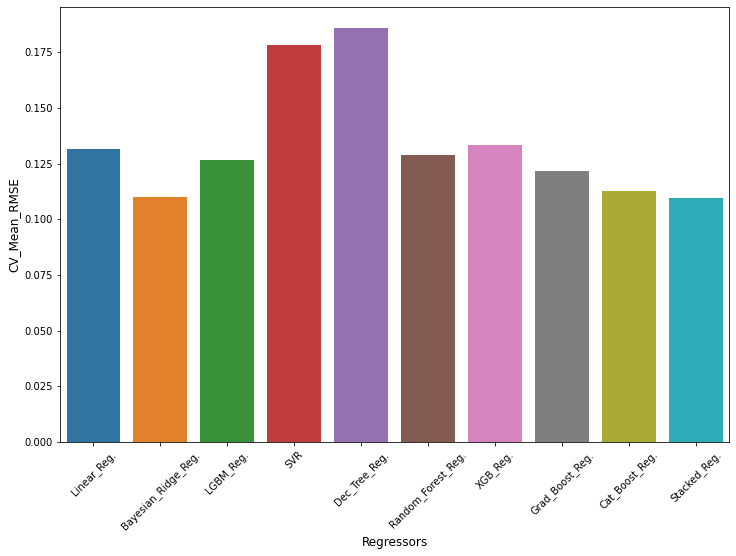

In [180]:
plt.figure(figsize = (12,8))
sns.barplot(x=final_cv_score['Regressors'], y=final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [181]:
X_train, X_val, y_train, y_val = train_test_split(train_data_df, target_log, test_size = 0.1, random_state=42)

In [182]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((934, 237), (104, 237), (934,), (104,))

In [183]:
stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

In [195]:
stack_gen.fit(X_train, y_train)
prediction = stack_gen.predict(X_val)
rmse(y_val, prediction)

Learning rate set to 0.038559
0:	learn: 0.3667410	total: 5.34ms	remaining: 5.33s
1:	learn: 0.3578212	total: 9ms	remaining: 4.49s
2:	learn: 0.3499610	total: 12.2ms	remaining: 4.05s
3:	learn: 0.3416405	total: 16.1ms	remaining: 4.02s
4:	learn: 0.3329124	total: 20.5ms	remaining: 4.07s
5:	learn: 0.3253764	total: 23.6ms	remaining: 3.92s
6:	learn: 0.3173233	total: 27.1ms	remaining: 3.84s
7:	learn: 0.3103355	total: 31.2ms	remaining: 3.87s
8:	learn: 0.3029150	total: 34.4ms	remaining: 3.79s
9:	learn: 0.2965893	total: 38.1ms	remaining: 3.77s
10:	learn: 0.2907340	total: 41.1ms	remaining: 3.69s
11:	learn: 0.2837918	total: 45ms	remaining: 3.71s
12:	learn: 0.2772749	total: 48.3ms	remaining: 3.66s
13:	learn: 0.2717567	total: 51.5ms	remaining: 3.63s
14:	learn: 0.2660900	total: 54.3ms	remaining: 3.56s
15:	learn: 0.2609347	total: 56.9ms	remaining: 3.5s
16:	learn: 0.2556064	total: 59.7ms	remaining: 3.45s
17:	learn: 0.2504708	total: 62.5ms	remaining: 3.41s
18:	learn: 0.2449296	total: 65.3ms	remaining: 3.37

173:	learn: 0.0908059	total: 557ms	remaining: 2.65s
174:	learn: 0.0906770	total: 561ms	remaining: 2.64s
175:	learn: 0.0905737	total: 563ms	remaining: 2.64s
176:	learn: 0.0902887	total: 567ms	remaining: 2.63s
177:	learn: 0.0901823	total: 570ms	remaining: 2.63s
178:	learn: 0.0901111	total: 575ms	remaining: 2.64s
179:	learn: 0.0900194	total: 578ms	remaining: 2.63s
180:	learn: 0.0898478	total: 582ms	remaining: 2.63s
181:	learn: 0.0896717	total: 586ms	remaining: 2.63s
182:	learn: 0.0894468	total: 590ms	remaining: 2.63s
183:	learn: 0.0893208	total: 593ms	remaining: 2.63s
184:	learn: 0.0891573	total: 597ms	remaining: 2.63s
185:	learn: 0.0890201	total: 600ms	remaining: 2.63s
186:	learn: 0.0888868	total: 603ms	remaining: 2.62s
187:	learn: 0.0886993	total: 607ms	remaining: 2.62s
188:	learn: 0.0885834	total: 609ms	remaining: 2.61s
189:	learn: 0.0883773	total: 613ms	remaining: 2.61s
190:	learn: 0.0880519	total: 615ms	remaining: 2.61s
191:	learn: 0.0879246	total: 618ms	remaining: 2.6s
192:	learn: 0

353:	learn: 0.0692106	total: 1.11s	remaining: 2.03s
354:	learn: 0.0690727	total: 1.12s	remaining: 2.03s
355:	learn: 0.0689875	total: 1.12s	remaining: 2.03s
356:	learn: 0.0688649	total: 1.12s	remaining: 2.02s
357:	learn: 0.0687810	total: 1.13s	remaining: 2.02s
358:	learn: 0.0687660	total: 1.13s	remaining: 2.02s
359:	learn: 0.0686546	total: 1.13s	remaining: 2.01s
360:	learn: 0.0685149	total: 1.14s	remaining: 2.01s
361:	learn: 0.0683577	total: 1.14s	remaining: 2.01s
362:	learn: 0.0683436	total: 1.14s	remaining: 2s
363:	learn: 0.0682580	total: 1.15s	remaining: 2s
364:	learn: 0.0682007	total: 1.15s	remaining: 2s
365:	learn: 0.0681002	total: 1.15s	remaining: 1.99s
366:	learn: 0.0679453	total: 1.15s	remaining: 1.99s
367:	learn: 0.0678256	total: 1.16s	remaining: 1.99s
368:	learn: 0.0677355	total: 1.16s	remaining: 1.98s
369:	learn: 0.0676280	total: 1.16s	remaining: 1.98s
370:	learn: 0.0674881	total: 1.17s	remaining: 1.98s
371:	learn: 0.0673898	total: 1.17s	remaining: 1.97s
372:	learn: 0.0673712

525:	learn: 0.0561703	total: 1.68s	remaining: 1.51s
526:	learn: 0.0560884	total: 1.68s	remaining: 1.51s
527:	learn: 0.0560217	total: 1.68s	remaining: 1.5s
528:	learn: 0.0559154	total: 1.69s	remaining: 1.5s
529:	learn: 0.0558065	total: 1.69s	remaining: 1.5s
530:	learn: 0.0557221	total: 1.69s	remaining: 1.5s
531:	learn: 0.0556295	total: 1.7s	remaining: 1.49s
532:	learn: 0.0555191	total: 1.7s	remaining: 1.49s
533:	learn: 0.0554326	total: 1.7s	remaining: 1.49s
534:	learn: 0.0553698	total: 1.71s	remaining: 1.48s
535:	learn: 0.0553437	total: 1.71s	remaining: 1.48s
536:	learn: 0.0552984	total: 1.71s	remaining: 1.48s
537:	learn: 0.0551740	total: 1.72s	remaining: 1.47s
538:	learn: 0.0550868	total: 1.72s	remaining: 1.47s
539:	learn: 0.0550629	total: 1.72s	remaining: 1.47s
540:	learn: 0.0549833	total: 1.73s	remaining: 1.47s
541:	learn: 0.0549622	total: 1.73s	remaining: 1.46s
542:	learn: 0.0548838	total: 1.73s	remaining: 1.46s
543:	learn: 0.0547695	total: 1.74s	remaining: 1.46s
544:	learn: 0.05469

705:	learn: 0.0450925	total: 2.23s	remaining: 930ms
706:	learn: 0.0449894	total: 2.24s	remaining: 927ms
707:	learn: 0.0449289	total: 2.24s	remaining: 924ms
708:	learn: 0.0449119	total: 2.24s	remaining: 920ms
709:	learn: 0.0449050	total: 2.25s	remaining: 918ms
710:	learn: 0.0448966	total: 2.25s	remaining: 915ms
711:	learn: 0.0448643	total: 2.25s	remaining: 912ms
712:	learn: 0.0448079	total: 2.26s	remaining: 909ms
713:	learn: 0.0447518	total: 2.26s	remaining: 905ms
714:	learn: 0.0447450	total: 2.26s	remaining: 903ms
715:	learn: 0.0446996	total: 2.27s	remaining: 900ms
716:	learn: 0.0446945	total: 2.27s	remaining: 896ms
717:	learn: 0.0445975	total: 2.27s	remaining: 893ms
718:	learn: 0.0445277	total: 2.28s	remaining: 890ms
719:	learn: 0.0445208	total: 2.28s	remaining: 887ms
720:	learn: 0.0445140	total: 2.28s	remaining: 884ms
721:	learn: 0.0444851	total: 2.29s	remaining: 881ms
722:	learn: 0.0444707	total: 2.29s	remaining: 878ms
723:	learn: 0.0444575	total: 2.29s	remaining: 875ms
724:	learn: 

890:	learn: 0.0368462	total: 2.79s	remaining: 342ms
891:	learn: 0.0367808	total: 2.79s	remaining: 338ms
892:	learn: 0.0367474	total: 2.8s	remaining: 335ms
893:	learn: 0.0367411	total: 2.8s	remaining: 332ms
894:	learn: 0.0367231	total: 2.81s	remaining: 329ms
895:	learn: 0.0367172	total: 2.81s	remaining: 326ms
896:	learn: 0.0366380	total: 2.81s	remaining: 323ms
897:	learn: 0.0365857	total: 2.81s	remaining: 320ms
898:	learn: 0.0365607	total: 2.82s	remaining: 317ms
899:	learn: 0.0365136	total: 2.82s	remaining: 314ms
900:	learn: 0.0364381	total: 2.83s	remaining: 311ms
901:	learn: 0.0363659	total: 2.83s	remaining: 307ms
902:	learn: 0.0363133	total: 2.83s	remaining: 304ms
903:	learn: 0.0362628	total: 2.83s	remaining: 301ms
904:	learn: 0.0361967	total: 2.84s	remaining: 298ms
905:	learn: 0.0361337	total: 2.84s	remaining: 295ms
906:	learn: 0.0361219	total: 2.85s	remaining: 292ms
907:	learn: 0.0360717	total: 2.85s	remaining: 289ms
908:	learn: 0.0360340	total: 2.85s	remaining: 286ms
909:	learn: 0.

57:	learn: 0.0913236	total: 186ms	remaining: 3.02s
58:	learn: 0.0899063	total: 189ms	remaining: 3.02s
59:	learn: 0.0885361	total: 192ms	remaining: 3s
60:	learn: 0.0871439	total: 194ms	remaining: 2.99s
61:	learn: 0.0857035	total: 197ms	remaining: 2.98s
62:	learn: 0.0844033	total: 200ms	remaining: 2.98s
63:	learn: 0.0830179	total: 204ms	remaining: 2.98s
64:	learn: 0.0816930	total: 207ms	remaining: 2.98s
65:	learn: 0.0805840	total: 210ms	remaining: 2.97s
66:	learn: 0.0795041	total: 213ms	remaining: 2.96s
67:	learn: 0.0782972	total: 216ms	remaining: 2.96s
68:	learn: 0.0774435	total: 220ms	remaining: 2.97s
69:	learn: 0.0765166	total: 223ms	remaining: 2.96s
70:	learn: 0.0756881	total: 226ms	remaining: 2.96s
71:	learn: 0.0747706	total: 229ms	remaining: 2.95s
72:	learn: 0.0740072	total: 232ms	remaining: 2.95s
73:	learn: 0.0730512	total: 235ms	remaining: 2.94s
74:	learn: 0.0722139	total: 237ms	remaining: 2.93s
75:	learn: 0.0714608	total: 240ms	remaining: 2.92s
76:	learn: 0.0707113	total: 243ms	

246:	learn: 0.0418569	total: 744ms	remaining: 2.27s
247:	learn: 0.0417313	total: 748ms	remaining: 2.27s
248:	learn: 0.0416380	total: 751ms	remaining: 2.27s
249:	learn: 0.0415089	total: 755ms	remaining: 2.26s
250:	learn: 0.0414016	total: 758ms	remaining: 2.26s
251:	learn: 0.0413485	total: 760ms	remaining: 2.26s
252:	learn: 0.0412292	total: 765ms	remaining: 2.26s
253:	learn: 0.0412117	total: 768ms	remaining: 2.26s
254:	learn: 0.0410993	total: 771ms	remaining: 2.25s
255:	learn: 0.0409629	total: 774ms	remaining: 2.25s
256:	learn: 0.0408829	total: 778ms	remaining: 2.25s
257:	learn: 0.0408371	total: 781ms	remaining: 2.25s
258:	learn: 0.0407327	total: 784ms	remaining: 2.24s
259:	learn: 0.0406822	total: 787ms	remaining: 2.24s
260:	learn: 0.0406178	total: 789ms	remaining: 2.23s
261:	learn: 0.0405016	total: 792ms	remaining: 2.23s
262:	learn: 0.0404070	total: 796ms	remaining: 2.23s
263:	learn: 0.0402539	total: 799ms	remaining: 2.23s
264:	learn: 0.0400847	total: 802ms	remaining: 2.22s
265:	learn: 

426:	learn: 0.0295514	total: 1.3s	remaining: 1.75s
427:	learn: 0.0294702	total: 1.31s	remaining: 1.75s
428:	learn: 0.0294137	total: 1.31s	remaining: 1.75s
429:	learn: 0.0293718	total: 1.31s	remaining: 1.74s
430:	learn: 0.0293349	total: 1.32s	remaining: 1.74s
431:	learn: 0.0292877	total: 1.32s	remaining: 1.74s
432:	learn: 0.0292714	total: 1.32s	remaining: 1.74s
433:	learn: 0.0292245	total: 1.33s	remaining: 1.73s
434:	learn: 0.0291739	total: 1.33s	remaining: 1.73s
435:	learn: 0.0291368	total: 1.33s	remaining: 1.73s
436:	learn: 0.0290994	total: 1.34s	remaining: 1.72s
437:	learn: 0.0290556	total: 1.34s	remaining: 1.72s
438:	learn: 0.0289862	total: 1.34s	remaining: 1.72s
439:	learn: 0.0289467	total: 1.35s	remaining: 1.72s
440:	learn: 0.0289000	total: 1.35s	remaining: 1.71s
441:	learn: 0.0288493	total: 1.35s	remaining: 1.71s
442:	learn: 0.0288002	total: 1.36s	remaining: 1.71s
443:	learn: 0.0287487	total: 1.36s	remaining: 1.71s
444:	learn: 0.0287005	total: 1.36s	remaining: 1.7s
445:	learn: 0.

611:	learn: 0.0229060	total: 1.86s	remaining: 1.18s
612:	learn: 0.0228760	total: 1.86s	remaining: 1.18s
613:	learn: 0.0228382	total: 1.87s	remaining: 1.17s
614:	learn: 0.0228138	total: 1.87s	remaining: 1.17s
615:	learn: 0.0227645	total: 1.88s	remaining: 1.17s
616:	learn: 0.0227185	total: 1.88s	remaining: 1.17s
617:	learn: 0.0226790	total: 1.88s	remaining: 1.16s
618:	learn: 0.0226522	total: 1.89s	remaining: 1.16s
619:	learn: 0.0226110	total: 1.89s	remaining: 1.16s
620:	learn: 0.0225700	total: 1.89s	remaining: 1.16s
621:	learn: 0.0225663	total: 1.9s	remaining: 1.15s
622:	learn: 0.0225355	total: 1.9s	remaining: 1.15s
623:	learn: 0.0225094	total: 1.9s	remaining: 1.15s
624:	learn: 0.0224710	total: 1.91s	remaining: 1.14s
625:	learn: 0.0224674	total: 1.91s	remaining: 1.14s
626:	learn: 0.0224377	total: 1.91s	remaining: 1.14s
627:	learn: 0.0224189	total: 1.92s	remaining: 1.13s
628:	learn: 0.0224002	total: 1.92s	remaining: 1.13s
629:	learn: 0.0223789	total: 1.92s	remaining: 1.13s
630:	learn: 0.0

799:	learn: 0.0184703	total: 2.42s	remaining: 605ms
800:	learn: 0.0184484	total: 2.42s	remaining: 602ms
801:	learn: 0.0184154	total: 2.43s	remaining: 599ms
802:	learn: 0.0183900	total: 2.43s	remaining: 596ms
803:	learn: 0.0183814	total: 2.43s	remaining: 593ms
804:	learn: 0.0183591	total: 2.44s	remaining: 590ms
805:	learn: 0.0183267	total: 2.44s	remaining: 587ms
806:	learn: 0.0183133	total: 2.44s	remaining: 584ms
807:	learn: 0.0182869	total: 2.45s	remaining: 582ms
808:	learn: 0.0182725	total: 2.45s	remaining: 579ms
809:	learn: 0.0182495	total: 2.45s	remaining: 576ms
810:	learn: 0.0182385	total: 2.46s	remaining: 573ms
811:	learn: 0.0182224	total: 2.46s	remaining: 570ms
812:	learn: 0.0181958	total: 2.46s	remaining: 567ms
813:	learn: 0.0181747	total: 2.47s	remaining: 564ms
814:	learn: 0.0181530	total: 2.47s	remaining: 561ms
815:	learn: 0.0181197	total: 2.47s	remaining: 558ms
816:	learn: 0.0181043	total: 2.48s	remaining: 555ms
817:	learn: 0.0180641	total: 2.48s	remaining: 552ms
818:	learn: 

982:	learn: 0.0151648	total: 2.98s	remaining: 51.5ms
983:	learn: 0.0151474	total: 2.98s	remaining: 48.5ms
984:	learn: 0.0151211	total: 2.98s	remaining: 45.5ms
985:	learn: 0.0151080	total: 2.99s	remaining: 42.5ms
986:	learn: 0.0151043	total: 2.99s	remaining: 39.4ms
987:	learn: 0.0150929	total: 3s	remaining: 36.4ms
988:	learn: 0.0150745	total: 3s	remaining: 33.4ms
989:	learn: 0.0150738	total: 3s	remaining: 30.3ms
990:	learn: 0.0150552	total: 3.01s	remaining: 27.3ms
991:	learn: 0.0150376	total: 3.01s	remaining: 24.3ms
992:	learn: 0.0150232	total: 3.01s	remaining: 21.3ms
993:	learn: 0.0150003	total: 3.02s	remaining: 18.2ms
994:	learn: 0.0149849	total: 3.02s	remaining: 15.2ms
995:	learn: 0.0149678	total: 3.02s	remaining: 12.1ms
996:	learn: 0.0149610	total: 3.03s	remaining: 9.11ms
997:	learn: 0.0149425	total: 3.03s	remaining: 6.08ms
998:	learn: 0.0149387	total: 3.04s	remaining: 3.04ms
999:	learn: 0.0149243	total: 3.04s	remaining: 0us


0.10184568839846277

In [192]:
cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [193]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

0.09712774601085152

In [196]:
brr = BayesianRidge(compute_score=True)
brr.fit(X_train, y_train)
prediction = brr.predict(X_val)
rmse(y_val, prediction)

0.0959063168377182

In [203]:
test_pred = brr.predict(test_data_df)

In [204]:
test_sales_price = np.exp(test_pred) - 1

In [205]:
test_sales_price

array([120918.61463499, 184975.68671949, 204432.82024524, ...,
        87548.98401672, 170903.99782298, 227693.17678954])